In [ ]:
import numpy as np
import pandas as pd

**Reasoning**:
Import the zipfile library and extract the contents of the two zip files.



Data Loading process

In [ ]:
df_test=pd.read_csv('/content/Test-1542969243754.csv')
df_train=pd.read_csv('/content/Train-1542865627584.csv')
df_train_outpatient=pd.read_csv('/content/Train_Outpatientdata-1542865627584.csv')
df_test_outpatient=pd.read_csv('/content/Test_Outpatientdata-1542969243754.csv')
df_train_inpatient=pd.read_csv('/content/Train_Inpatientdata-1542865627584.csv')
df_test_inpatient=pd.read_csv('/content/Test_Inpatientdata-1542969243754.csv')
df_train_bin=pd.read_csv('/content/Train_Beneficiarydata-1542865627584.csv')
df_test_bin=pd.read_csv('/content/Test_Beneficiarydata-1542969243754.csv')

Data Preprocessing

In [ ]:
print('shape of test inpatient data:', df_test_inpatient.shape)
print('shape of test outpatients data:', df_test_outpatient.shape)
print('shape of test Bineficiary data:', df_test_bin.shape)
print('shape of train inpatient data:', df_train_inpatient.shape)
print('shape of train outpatients data:', df_train_outpatient.shape)
print('shape of train Bineficiary data:', df_train_bin.shape)

shape of test inpatient data: (9551, 30)
shape of test outpatients data: (125841, 27)
shape of test Bineficiary data: (63968, 25)
shape of train inpatient data: (40474, 30)
shape of train outpatients data: (517737, 27)
shape of train Bineficiary data: (138556, 25)


EDA of BINN data

In [ ]:
df_train_bin.shape

(138556, 25)

In [ ]:
df_train_bin.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [ ]:
df_train_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

1.How many unique beneficiaries we have in out data set?

In [ ]:
df_train_bin.BeneID.nunique()

138556

2.Gender distribution in percentage ?

In [ ]:
df_train_bin.Gender.value_counts()/df_test_bin.shape[0]


Gender
2    1.236650
1    0.929371
Name: count, dtype: float64

3. Age of each beneficiaries

In [ ]:
df_train_bin['DOB']=pd.to_datetime(df_train_bin['DOB'])
df_train_bin['DOD']=pd.to_datetime(df_train_bin['DOD'])

4. adding a new feature -------yr_of_birth of beneficiaries

In [ ]:
df_train_bin['Pat_Age_yr']=df_train_bin['DOB'].dt.year
df_train_bin['Pat_Age_month'] =df_train_bin['DOB'].dt.month


5. Distribution of beneficiaries based on Pat_Age_yr

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
patient_age=df_train_bin.Pat_Age_yr.value_counts()/df_train_bin.shape[0]
patient_age.head()

Pat_Age_yr
1941    0.042604
1939    0.042517
1943    0.042012
1940    0.041918
1942    0.041904
Name: count, dtype: float64

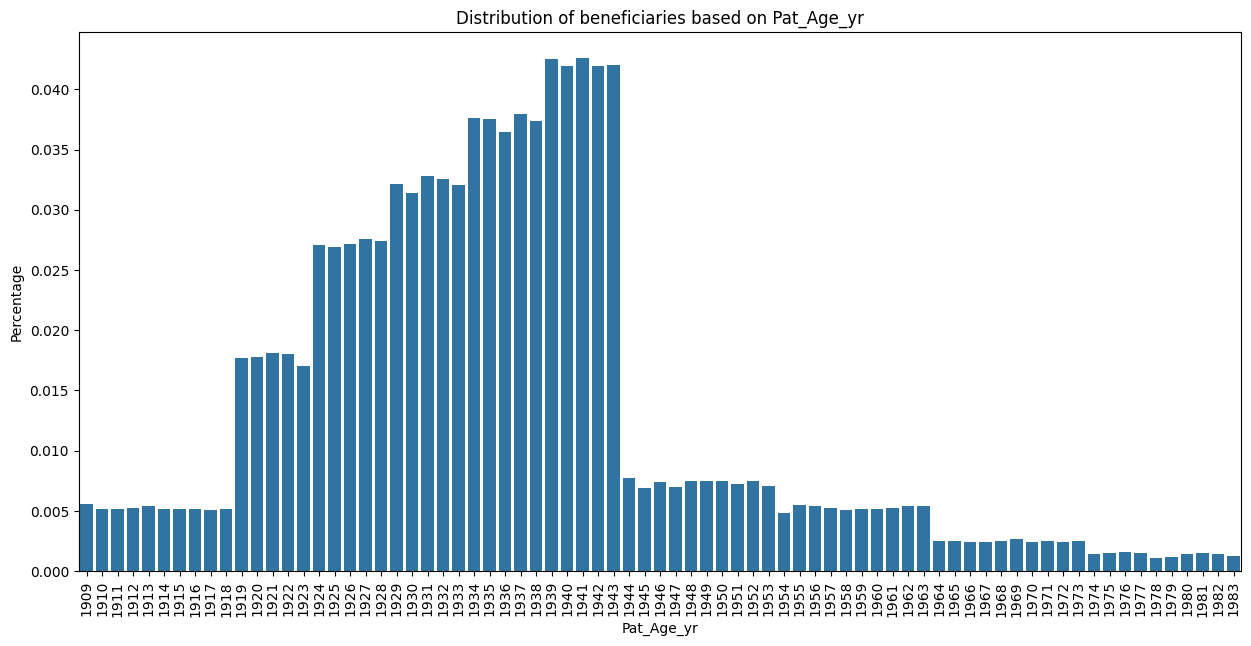

In [ ]:
plt.figure(figsize=(15, 7)) # Increase figure size
sns.barplot(x=patient_age.index, y=patient_age.values)
plt.title('Distribution of beneficiaries based on Pat_Age_yr')
plt.xlabel('Pat_Age_yr')
plt.ylabel('Percentage')
plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.show()

*Insights:*
1.  Majority of Beneficiaries age between 1919-1942
2. Highest patient birth year lies between 1938-1943
3. Lowest patinet birth year lies between 1978-1983

5. Adding new indicator :::::::::::::::::::::::: "Beneficiary Dead or Alive?"
This represent whether a patient is alive or not?
Here, the point to understand is that there can be ONE to MANY relationship b/w a BENEFICIARY and CLAIM filed, thus I'm making an assumption here is that beneficiaries with DOD as NA are alive, however this cannot be always true once we join it with CLAIMS data.
For example, A patient gets successfully operated for Kidney Failure on Sep 2012 and filed CLAIM-I. So, this claimed gets approved with DOD as NA.
Same patient gets operated after 4 months for Cardiac Failure but couldn't survived and filed CLAIM-II. Thus, for CLAIM-I this person shoud have DEAD_or_ALIVE indicator as FALSE whereas for CLAIM-II it should be TRUE.
REASONING
# My intention behind adding this feature is to see whether FRAUD claims are higher for DEAD patients or not?

In [ ]:
## 0 mean Alive and 1 means Dead
df_train_bin['Dead_or_Alive']=np.where(df_train_bin['DOD'].isna(), '1', '0')
df_train_bin['Dead_or_Alive'].value_counts()

Dead_or_Alive
1    137135
0      1421
Name: count, dtype: int64

In [ ]:
df_train_bin['Dead_or_Alive'].value_counts()/df_train_bin.shape[0]*100

Dead_or_Alive
1    98.974422
0     1.025578
Name: count, dtype: float64

***Insights:***
 The above graph tells us that almost 99% of the beneficiaries are ALIVE and very small percentage of patients are DEAD. It would be good to see how much this feature has impact on the actual label.

6. Adding new feature :::::::::::::::::::::Beneficiary age

In [ ]:
#Greatest date of dete of death in Train data set set for beneficiaries
max_bene_dod=max(df_train_bin['DOD'].unique()[1:])
max_bene_dod

Timestamp('2009-12-01 00:00:00')

In [ ]:
# for all NAN DODs filling the geatest Date of Death
df_train_bin['DOD'].fillna(value=max_bene_dod,inplace=True)

/tmp/ipython-input-3534339171.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_bin['DOD'].fillna(value=max_bene_dod,inplace=True)


In [ ]:
df_train_bin['age']=np.round(((df_train_bin['DOD']-df_train_bin['DOB']).dt.days)/365.0,1)
df_train_bin['age'].head()

0    67.0
1    73.3
2    73.4
3    87.5
4    74.3
Name: age, dtype: float64

In [ ]:
df_train_bin['age'].describe()

count    138556.000000
mean         73.632756
std          12.736605
min          26.000000
25%          68.000000
50%          74.300000
75%          82.000000
max         101.000000
Name: age, dtype: float64

6. Age distribution

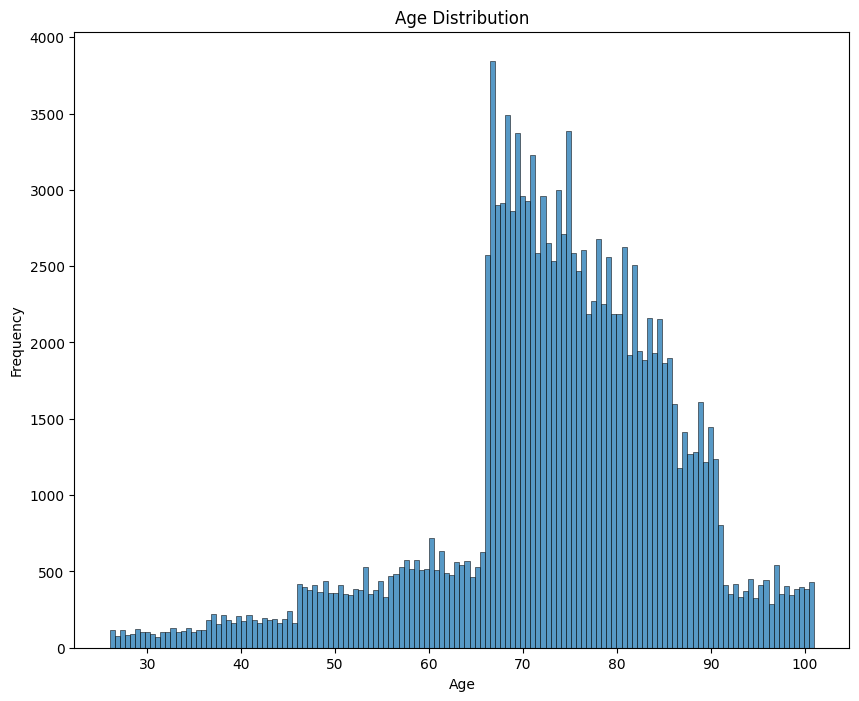

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df_train_bin['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

*Insights:*
From above graph majority of beneficiary are b/w 65-85

7. Adding new column :::::::::::::::: Beneficiaries Age brakets

* a. 1-35---> Young
* b. 35-55--> Mid aged
* c. 55-80 --> Old
* d. 80 or more --> Very old

In [ ]:
def bene_age_brackets(val):
  if val >=1 and val <=35:
    return 'Young'
  elif val > 35 and val <=55:
    return 'Mid'
  elif val > 55 and val <= 80:
    return 'Old'
  else:
    return 'Very Old'

In [ ]:
df_train_bin['age_group']=df_train_bin['age'].apply(bene_age_brackets)
df_train_bin['age_group'].value_counts()

age_group
Old         83721
Very Old    42819
Mid         10267
Young        1749
Name: count, dtype: int64

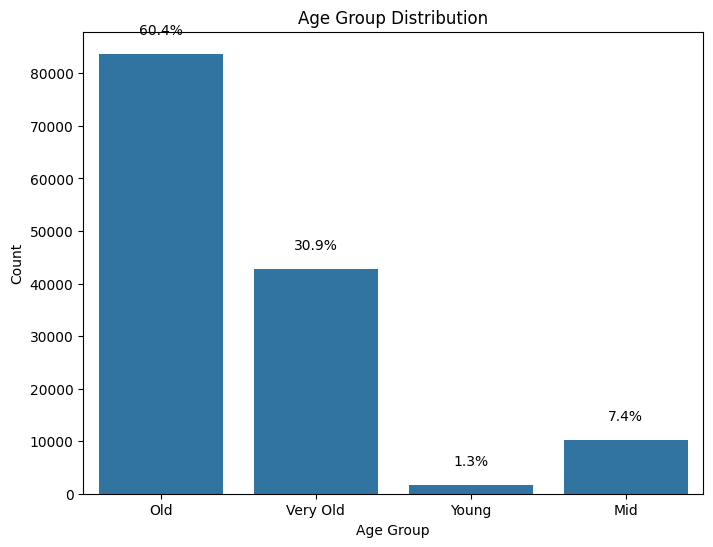

In [ ]:
#distribution graph
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='age_group',data=df_train_bin)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

total = len(df_train_bin)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

8. Lets see the GENDER ratio across various HUMAN races
* Whitw/caucasian
* Mongoloid/Asian
* Negroid/Black
* Australoid

In [ ]:
df_train_bin.Race.value_counts()/df_train_bin.shape[0]*100

Race
1    84.483530
2     9.770779
3     3.651231
5     2.094460
Name: count, dtype: float64

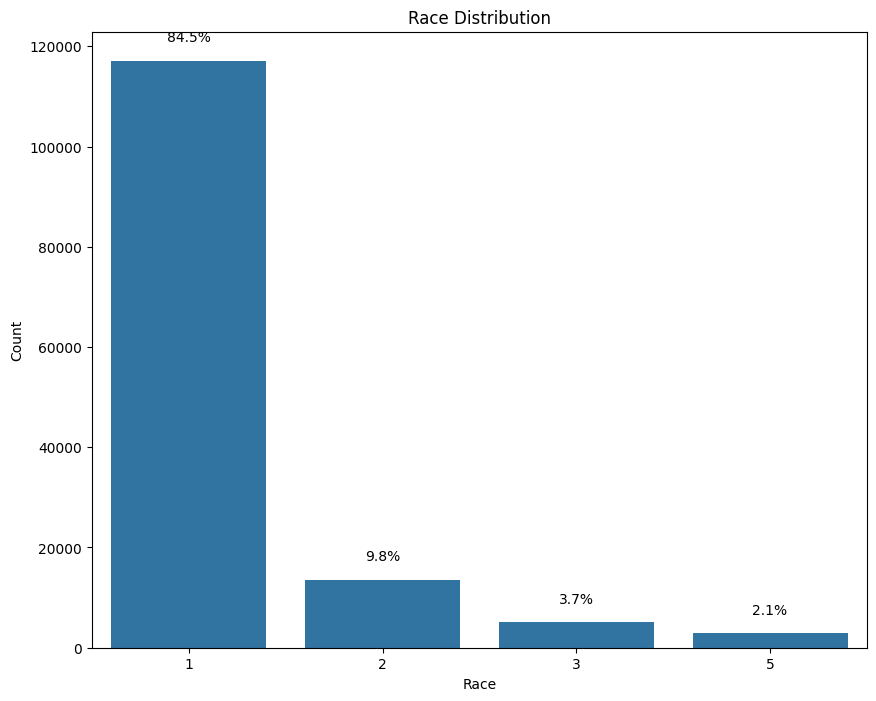

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Race',data=df_train_bin)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')

total = len(df_train_bin)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

*Insights:*
The indicates that there is very serious DATA IMBALANCE issue in race categories

/tmp/ipython-input-2470303929.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  ax = sns.countplot(x='Race', hue='Gender', data=df_train_bin, color='red')


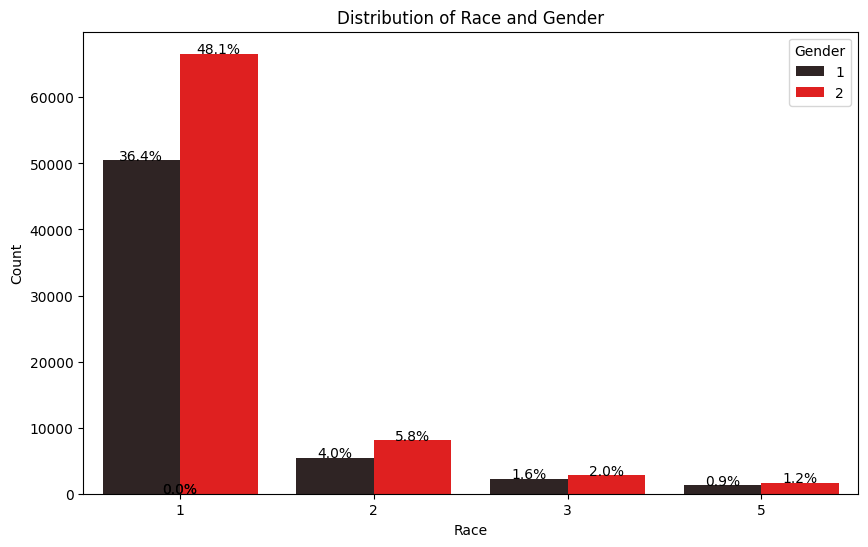

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Race', hue='Gender', data=df_train_bin, color='red')
plt.title('Distribution of Race and Gender')
plt.xlabel('Race')
plt.ylabel('Count')

# Add percentages on top of the bars
total = len(df_train_bin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.1f}%'.format(100*height/total),
            ha="center")

plt.show()

*Insights*
From above graph no data imbalance Race and geneder ratio.

7. Renal disease in Beneficiaries
* 0---> No
* Y---> Yes

In [ ]:
df_train_bin.RenalDiseaseIndicator.value_counts()/df_train_bin.shape[0]*100

RenalDiseaseIndicator
0    85.869973
Y    14.130027
Name: count, dtype: float64

/tmp/ipython-input-1302419786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='RenalDiseaseIndicator', data=df_train_bin, palette='viridis')


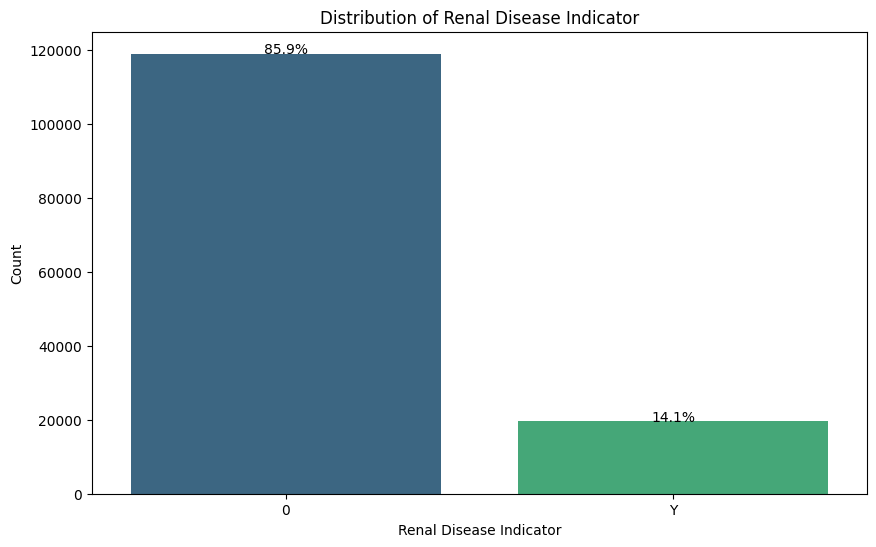

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='RenalDiseaseIndicator', data=df_train_bin, palette='viridis')
plt.title('Distribution of Renal Disease Indicator')
plt.xlabel('Renal Disease Indicator')
plt.ylabel('Count')

# Add percentages on top of the bars
total = len(df_train_bin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.1f}%'.format(100*height/total),
            ha="center")

plt.show()

*Insights:*
* From above graph  16.5% Beneficiaries have renal disease

In [ ]:
df_train_bin.ChronicCond_KidneyDisease.value_counts()/df_train_bin.shape[0]*100

ChronicCond_KidneyDisease
2    68.764254
1    31.235746
Name: count, dtype: float64

Chronic Kidney diasese
* 1----> YES
* 2----> NO

/tmp/ipython-input-4081783997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='ChronicCond_KidneyDisease', data=df_train_bin, palette='viridis')


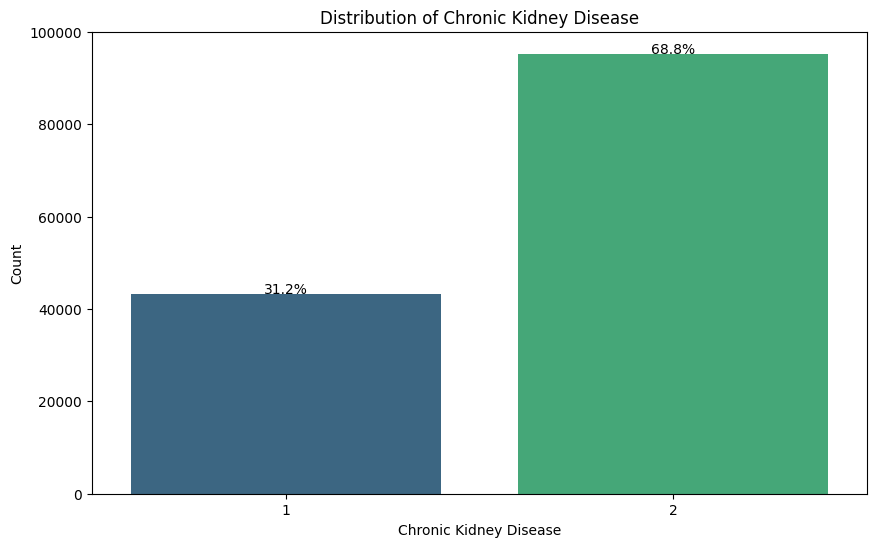

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ChronicCond_KidneyDisease', data=df_train_bin, palette='viridis')
plt.title('Distribution of Chronic Kidney Disease')
plt.xlabel('Chronic Kidney Disease')
plt.ylabel('Count')

# Add percentages on top of the bars
total = len(df_train_bin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.1f}%'.format(100*height/total),
            ha="center")

plt.show()

Insights:
* From above graph 36% of Beneficiaries have CKD (chronic kidney disease)

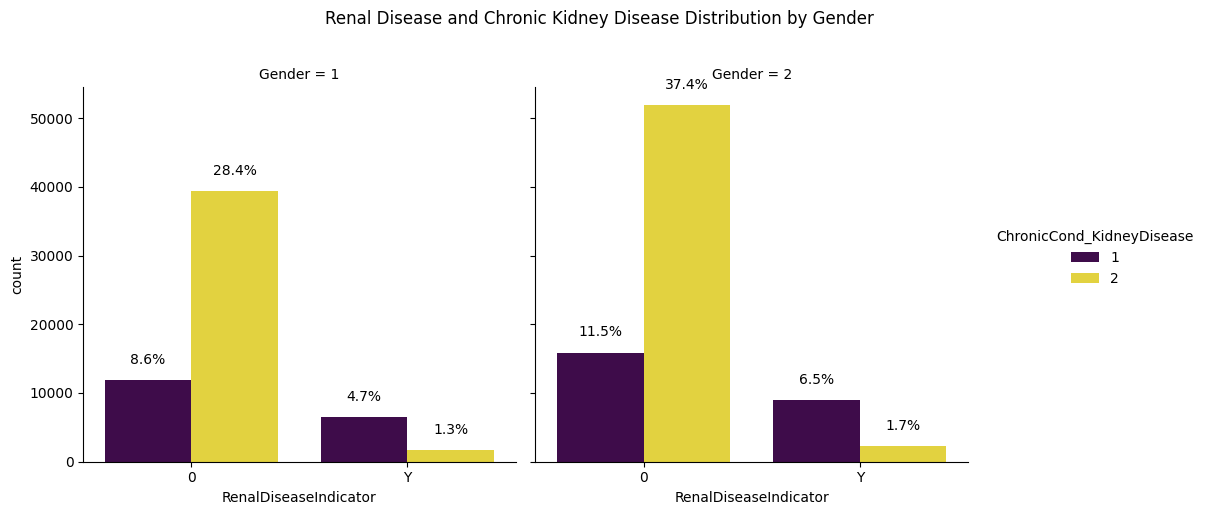

In [ ]:
g = sns.catplot(x='RenalDiseaseIndicator', hue='ChronicCond_KidneyDisease',
                col='Gender', data=df_train_bin, kind='count', palette='viridis')
g.fig.suptitle('Renal Disease and Chronic Kidney Disease Distribution by Gender', y=1.02)

for ax in g.axes.flat:
    total = len(ax.patches)  # Use number of patches for total count per facet
    for p in ax.patches:
        height = p.get_height()
        if height > 0: # Only annotate bars with height > 0
            percentage = f'{100 * height / len(df_train_bin):.1f}%\n' # Calculate percentage of total dataframe
            ax.text(p.get_x() + p.get_width() / 2., height + 3,
                    percentage,
                    ha="center")

g.tight_layout()
plt.show()

/tmp/ipython-input-1000440073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='State', data=df_train_bin, palette='viridis', order=state_order)


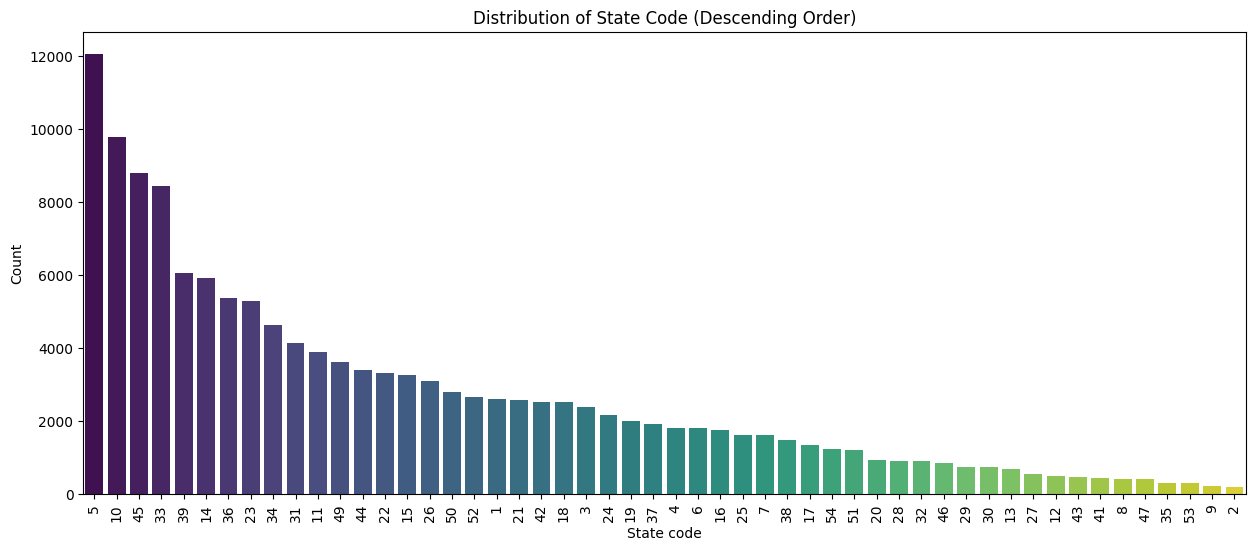

In [ ]:
plt.figure(figsize=(15, 6))
state_order = df_train_bin['State'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(x='State', data=df_train_bin, palette='viridis', order=state_order)
plt.title('Distribution of State Code (Descending Order)')
plt.xlabel('State code')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

In [ ]:
df_train_bin.NoOfMonths_PartACov.value_counts()/df_train_bin.shape[0]*100



NoOfMonths_PartACov
12    99.157741
0      0.721730
6      0.027426
11     0.020208
8      0.018765
10     0.012991
7      0.011548
4      0.009382
5      0.005774
9      0.005052
3      0.003609
2      0.003609
1      0.002165
Name: count, dtype: float64

*Insights*
* 99% beneficiaries belongs to 12 months PartA coverage
*

9. No. of beneficiries of ChronicOnd alzheimer and Annual ip (inpatient) and OP (outpatients) expenditure

In [ ]:
df_train_bin.ChronicCond_Alzheimer.value_counts()

ChronicCond_Alzheimer
2    92530
1    46026
Name: count, dtype: int64

* 2----> NO
* 1---->YES

/tmp/ipython-input-2229907177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='ChronicCond_Alzheimer', data=df_train_bin, palette='viridis')


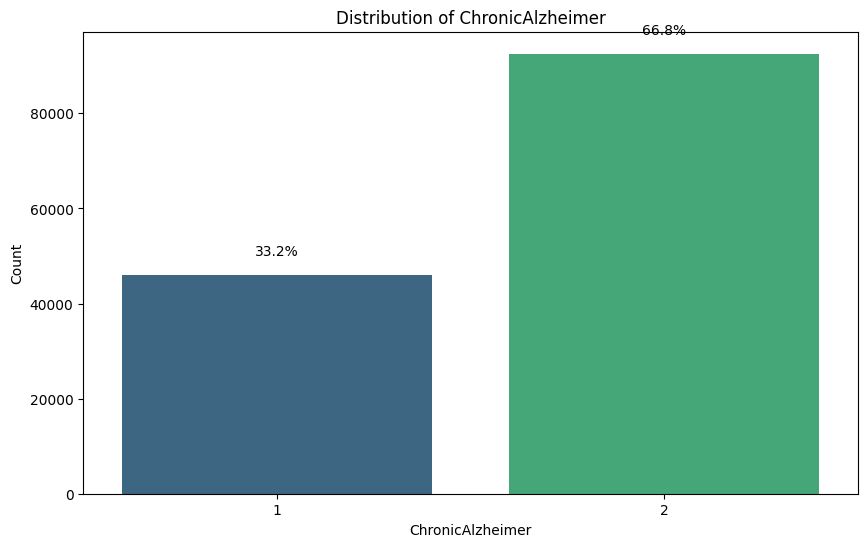

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ChronicCond_Alzheimer', data=df_train_bin, palette='viridis')
plt.title('Distribution of ChronicAlzheimer')
plt.xlabel('ChronicAlzheimer')
plt.ylabel('Count')

#add percentage
total = len(df_train_bin)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [ ]:
df_train_bin.groupby('ChronicCond_Alzheimer').IPAnnualReimbursementAmt.sum()

ChronicCond_Alzheimer
1    247213280
2    259949690
Name: IPAnnualReimbursementAmt, dtype: int64

/tmp/ipython-input-2600892850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ChronicCond_Alzheimer', y='IPAnnualReimbursementAmt', data=alzheimer_ip_reimbursement, palette='viridis')


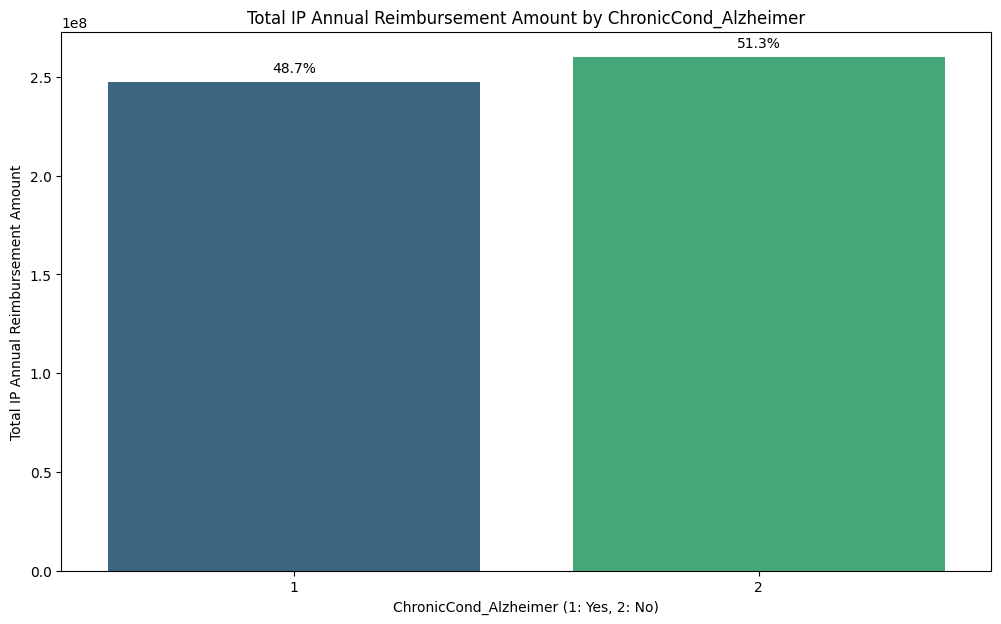

In [ ]:
alzheimer_ip_reimbursement = df_train_bin.groupby('ChronicCond_Alzheimer')['IPAnnualReimbursementAmt'].sum().reset_index()

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='ChronicCond_Alzheimer', y='IPAnnualReimbursementAmt', data=alzheimer_ip_reimbursement, palette='viridis')
plt.title('Total IP Annual Reimbursement Amount by ChronicCond_Alzheimer')
plt.xlabel('ChronicCond_Alzheimer (1: Yes, 2: No)')
plt.ylabel('Total IP Annual Reimbursement Amount')

total_reimbursement = alzheimer_ip_reimbursement['IPAnnualReimbursementAmt'].sum()

# Add percentages on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_reimbursement:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., height + 5000000,  # Adjust vertical position for better visibility
            percentage,
            ha="center")

plt.show()

*Insights:*
* From Above graph indicate that non-ALZH beneficiries are double in counts as compared to ALZH, however the Annual sum of IP Reimbursement is almost same for both groups.
* This mean beneficiaries with or without chronic ALZH get admitted the annual reimbursement paid is approx same (difference 2.5%, 13M$)

OutpatientsAnnual Reimbursement amount

In [ ]:
df_train_bin.groupby('ChronicCond_Alzheimer').OPAnnualReimbursementAmt.sum()

ChronicCond_Alzheimer
1     74721530
2    105154550
Name: OPAnnualReimbursementAmt, dtype: int64

/tmp/ipython-input-2672804776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ChronicCond_Alzheimer', y='OPAnnualReimbursementAmt', data=alzheimer_op_reimbursement, palette='viridis')


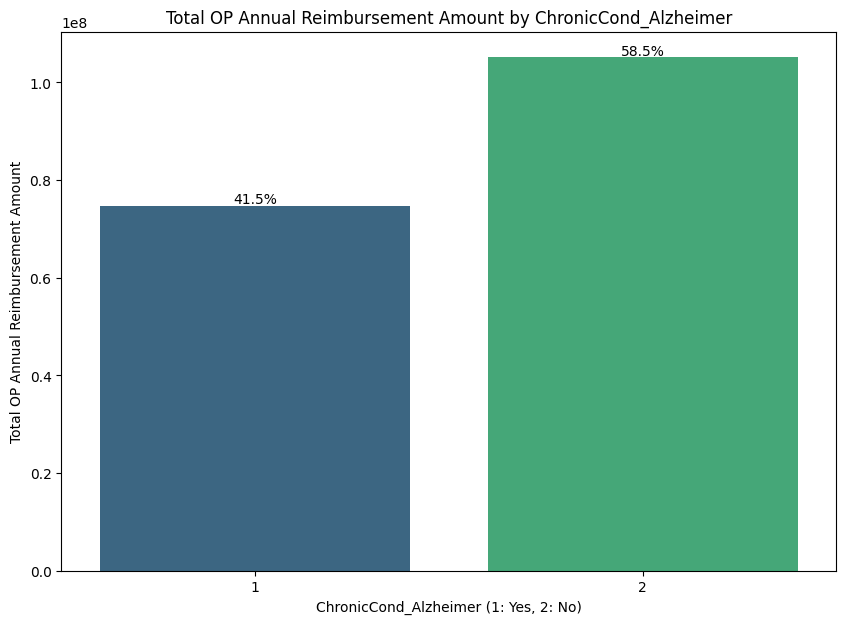

In [ ]:
alzheimer_op_reimbursement = df_train_bin.groupby('ChronicCond_Alzheimer')['OPAnnualReimbursementAmt'].sum().reset_index()

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='ChronicCond_Alzheimer', y='OPAnnualReimbursementAmt', data=alzheimer_op_reimbursement, palette='viridis')
plt.title('Total OP Annual Reimbursement Amount by ChronicCond_Alzheimer')
plt.xlabel('ChronicCond_Alzheimer (1: Yes, 2: No)')
plt.ylabel('Total OP Annual Reimbursement Amount')

total_reimbursement = alzheimer_op_reimbursement['OPAnnualReimbursementAmt'].sum()

# Add percentages on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_reimbursement:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., height + 500000,  # Adjust vertical position for better visibility
            percentage,
            ha="center")

plt.show()

Insights:
* From above graph Annual sum of OP Reimbursement for non-ALZH disease beneficiries is more then 16% (30M$).

Inpatients Annual Deductible amounts

In [ ]:
df_train_bin.groupby('ChronicCond_Alzheimer').IPAnnualDeductibleAmt.sum()

ChronicCond_Alzheimer
1    28200854
2    27200388
Name: IPAnnualDeductibleAmt, dtype: int64

/tmp/ipython-input-330407751.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ChronicCond_Alzheimer', y='IPAnnualDeductibleAmt', data=alzheimer_ip_deductible, palette='viridis')


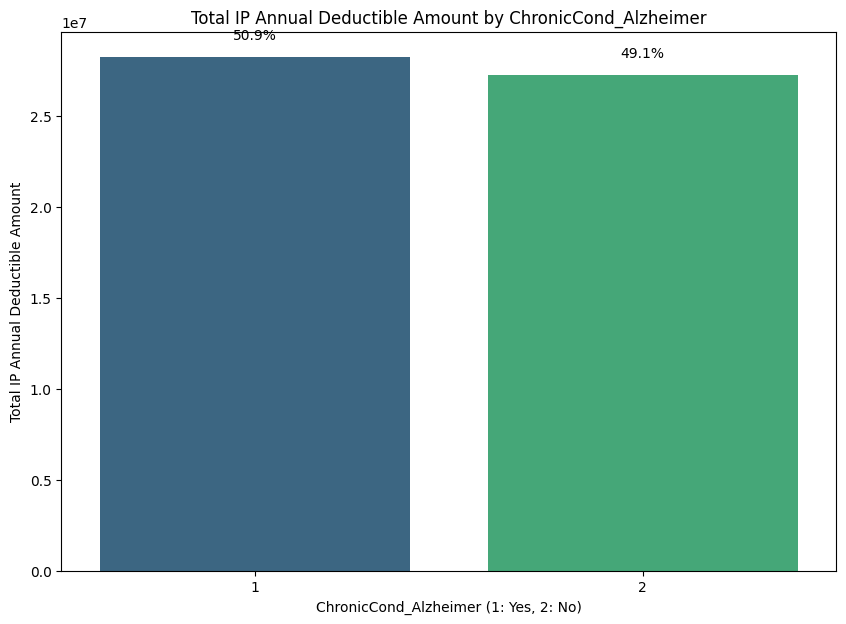

In [ ]:
alzheimer_ip_deductible = df_train_bin.groupby('ChronicCond_Alzheimer')['IPAnnualDeductibleAmt'].sum().reset_index()

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='ChronicCond_Alzheimer', y='IPAnnualDeductibleAmt', data=alzheimer_ip_deductible, palette='viridis')
plt.title('Total IP Annual Deductible Amount by ChronicCond_Alzheimer')
plt.xlabel('ChronicCond_Alzheimer (1: Yes, 2: No)')
plt.ylabel('Total IP Annual Deductible Amount')

total_deductible = alzheimer_ip_deductible['IPAnnualDeductibleAmt'].sum()

# Add percentages on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_deductible:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., height + 1000000,  # Adjust vertical position for better visibility
            percentage,
            ha="center")

plt.show()

Insights
* from above graph Annual sum of In co-payment by patients of chronic disease and non-chronic diasease alimost same (only difference 1.8%, or 10M$)
* Re-imbursement and co-payment amounts are same for with or without chronic patients if they get admitted.

In [ ]:
#No. of beneficiares with or without chronic disease conditions
df_train_bin.groupby(['ChronicCond_Alzheimer'])['BeneID'].count()

ChronicCond_Alzheimer
1    46026
2    92530
Name: BeneID, dtype: int64

8. Avg IP Reimbursement amount

In [ ]:
alzh_ip_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_Alzheimer')['IPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_Alzheimer')['BeneID'].count())
alzh_ip_r.columns=['Avg IP Reimbursement Amt']
alzh_ip_r

Avg IP Reimbursement Amt
ChronicCond_Alzheimer                          
1                                   5371.165863
2                                   2809.355777

8. Avg Out patients Reimbursement amounts

In [ ]:
alzh_op_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_Alzheimer')['OPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_Alzheimer')['BeneID'].count())
alzh_op_r.columns=['Avg OP Reimbursement Amt']
alzh_op_r

Avg OP Reimbursement Amt
ChronicCond_Alzheimer                          
1                                   1623.463477
2                                   1136.437372

Avg in-patients Deductible amounts

In [ ]:
alzh_ip_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_Alzheimer')['IPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_Alzheimer')['BeneID'].count())
alzh_ip_d.columns=['Avg IP (co-payment)Deductible Amt']
alzh_ip_d

Avg IP (co-payment)Deductible Amt
ChronicCond_Alzheimer                                   
1                                             612.715726
2                                             293.962909

9. Avg Out-Patients Deductible amounts

In [ ]:
alzh_op_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_Alzheimer')['OPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_Alzheimer')['BeneID'].count())
alzh_op_d.columns=['Avg OP (co-payment)Deductible Amt']
alzh_op_d

Avg OP (co-payment)Deductible Amt
ChronicCond_Alzheimer                                   
1                                             467.192044
2                                             333.212472

In [ ]:
alzh_all_amt=pd.concat([alzh_ip_r,alzh_op_r,alzh_ip_d,alzh_op_d],axis=1)
alzh_all_amt

Avg IP Reimbursement Amt  Avg OP Reimbursement Amt  \
ChronicCond_Alzheimer                                                       
1                                   5371.165863               1623.463477   
2                                   2809.355777               1136.437372   

                       Avg IP (co-payment)Deductible Amt  \
ChronicCond_Alzheimer                                      
1                                             612.715726   
2                                             293.962909   

                       Avg OP (co-payment)Deductible Amt  
ChronicCond_Alzheimer                                     
1                                             467.192044  
2                                             333.212472

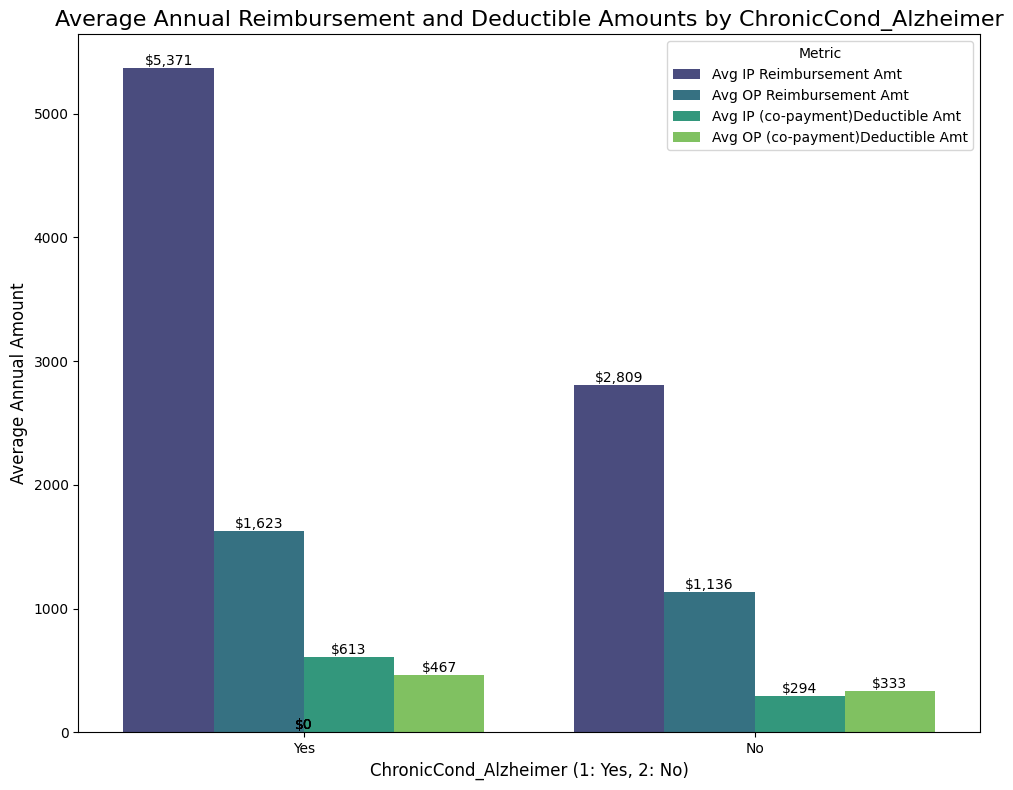

In [ ]:
alzh_all_amt_melted = alzh_all_amt.reset_index().melt(
    id_vars='ChronicCond_Alzheimer',
    var_name='Metric',
    value_name='Amount'
)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='ChronicCond_Alzheimer', y='Amount', hue='Metric', data=alzh_all_amt_melted, palette='viridis')

plt.title('Average Annual Reimbursement and Deductible Amounts by ChronicCond_Alzheimer', fontsize=16)
plt.xlabel('ChronicCond_Alzheimer (1: Yes, 2: No)', fontsize=12)
plt.ylabel('Average Annual Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No']) # Set custom x-axis labels

# Improve legend
plt.legend(title='Metric', loc='upper right')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Insights:
* from above graph Payer pays well when beneficiaries get admitted with or without chronic alzheimer, to be precise more then 50% in +ve cases.
* Other cases the not so much difference.

10. No. of beneficiaries on the basis of 'ChronicCond_KidneyDisease'. And, the Annual IP & OP expenditures for such patients.

In [ ]:
# no of beneficiaries with chronic or with out chronic conditiona (CKD)
df_train_bin.groupby('ChronicCond_KidneyDisease')['BeneID'].count()

ChronicCond_KidneyDisease
1    43279
2    95277
Name: BeneID, dtype: int64

In [ ]:

ckd_ip_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_KidneyDisease')['IPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_KidneyDisease')['BeneID'].count())
ckd_ip_r.columns=['Avg IP Reimbursement Amt']
ckd_ip_r

Avg IP Reimbursement Amt
ChronicCond_KidneyDisease                          
1                                       7500.768040
2                                       1915.858287

In [ ]:
ckd_op_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_KidneyDisease')['OPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_KidneyDisease')['BeneID'].count())
ckd_op_r.columns=['Avg OP Reimbursement Amt']
ckd_op_r

Avg OP Reimbursement Amt
ChronicCond_KidneyDisease                          
1                                       2061.602625
2                                        951.457120

In [ ]:
ckd_ip_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_KidneyDisease')['IPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_KidneyDisease')['BeneID'].count())
ckd_ip_d.columns=['Avg IP (co-payment)Deductible Amt']
ckd_ip_d

Avg IP (co-payment)Deductible Amt
ChronicCond_KidneyDisease                                   
1                                                 785.385707
2                                                 224.718809

In [ ]:
ckd_op_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_KidneyDisease')['OPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_KidneyDisease')['BeneID'].count())
ckd_op_d.columns=['Avg OP (co-payment)Deductible Amt']
ckd_op_d

Avg OP (co-payment)Deductible Amt
ChronicCond_KidneyDisease                                   
1                                                 582.706417
2                                                 284.603629

In [ ]:
ckd_all_amt=pd.concat([ckd_ip_r,ckd_op_r,ckd_ip_d,ckd_op_d],axis=1)
ckd_all_amt

Avg IP Reimbursement Amt  Avg OP Reimbursement Amt  \
ChronicCond_KidneyDisease                                                       
1                                       7500.768040               2061.602625   
2                                       1915.858287                951.457120   

                           Avg IP (co-payment)Deductible Amt  \
ChronicCond_KidneyDisease                                      
1                                                 785.385707   
2                                                 224.718809   

                           Avg OP (co-payment)Deductible Amt  
ChronicCond_KidneyDisease                                     
1                                                 582.706417  
2                                                 284.603629

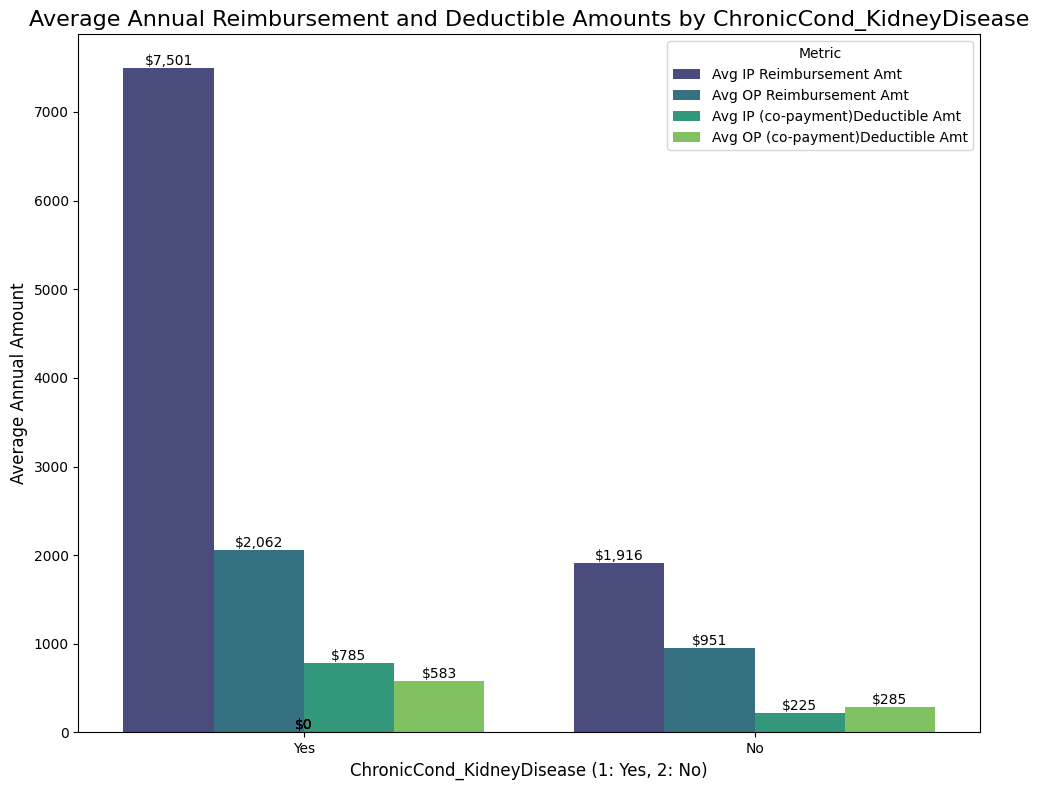

In [ ]:
ckd_all_amt_melted = ckd_all_amt.reset_index().melt(
    id_vars='ChronicCond_KidneyDisease',
    var_name='Metric',
    value_name='Amount'
)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='ChronicCond_KidneyDisease', y='Amount', hue='Metric', data=ckd_all_amt_melted, palette='viridis')

plt.title('Average Annual Reimbursement and Deductible Amounts by ChronicCond_KidneyDisease', fontsize=16)
plt.xlabel('ChronicCond_KidneyDisease (1: Yes, 2: No)', fontsize=12)
plt.ylabel('Average Annual Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No']) # Set custom x-axis labels

# Improve legend
plt.legend(title='Metric', loc='upper right')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Insights:
* from above graph Payer pays well when beneficiaries get admitted with or without chronic kidney disease, to be precise more then 50% in +ve cases.
* Other cases the not so much difference.

11. No of beneficiaries on the basis of 'ChronicCond_Cancer'. And, the Annual IP & OP expenditures for such patients

In [ ]:
# no of beneficiries with or without chronic cancer conditions
df_train_bin.groupby('ChronicCond_Cancer')['BeneID'].count()

ChronicCond_Cancer
1     16621
2    121935
Name: BeneID, dtype: int64

In [ ]:
cancer_ip_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_Cancer')['IPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_Cancer')['BeneID'].count())
cancer_ip_r.columns=['Avg IP Reimbursement Amt']
cancer_ip_r

Avg IP Reimbursement Amt
ChronicCond_Cancer                          
1                                6067.532038
2                                3332.222250

In [ ]:
cancer_op_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_Cancer')['OPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_Cancer')['BeneID'].count())
cancer_op_r.columns=['Avg OP Reimbursement Amt']
cancer_op_r

Avg OP Reimbursement Amt
ChronicCond_Cancer                          
1                                1788.427291
2                                1231.398942

In [ ]:
cancer_ip_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_Cancer')['IPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_Cancer')['BeneID'].count())
cancer_ip_d.columns=['Avg IP (co-payment)Deductible Amt']
cancer_ip_d

Avg IP (co-payment)Deductible Amt
ChronicCond_Cancer                                   
1                                          636.339811
2                                          367.610924

In [ ]:
cancer_op_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_Cancer')['OPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_Cancer')['BeneID'].count())
cancer_op_d.columns=['Avg OP (co-payment)Deductible Amt']
cancer_op_d

Avg OP (co-payment)Deductible Amt
ChronicCond_Cancer                                   
1                                          520.832682
2                                          358.210284

In [ ]:
cancer_all_amt=pd.concat([cancer_ip_r,cancer_op_r,cancer_ip_d,cancer_op_d],axis=1)
cancer_all_amt

Avg IP Reimbursement Amt  Avg OP Reimbursement Amt  \
ChronicCond_Cancer                                                       
1                                6067.532038               1788.427291   
2                                3332.222250               1231.398942   

                    Avg IP (co-payment)Deductible Amt  \
ChronicCond_Cancer                                      
1                                          636.339811   
2                                          367.610924   

                    Avg OP (co-payment)Deductible Amt  
ChronicCond_Cancer                                     
1                                          520.832682  
2                                          358.210284

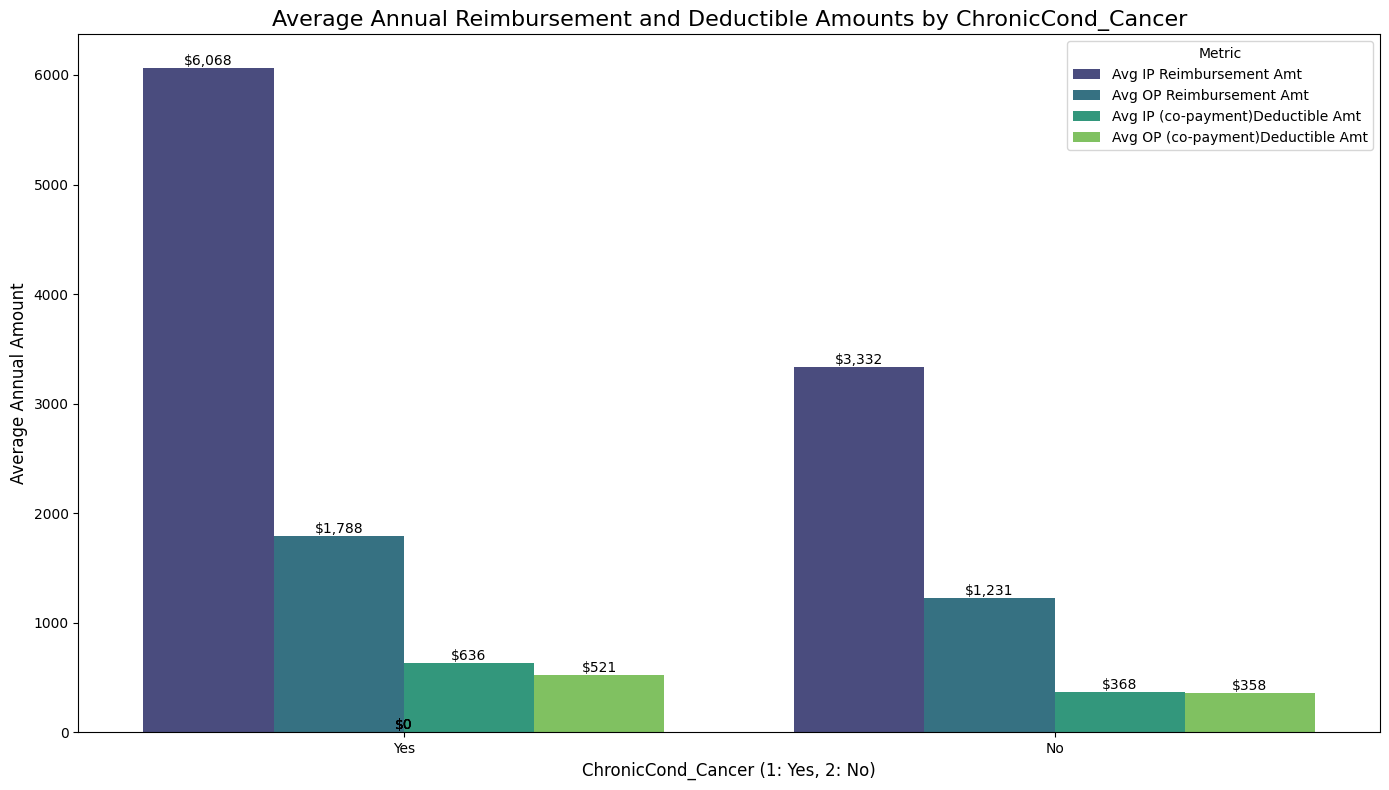

In [ ]:
cancer_all_amt_melted = cancer_all_amt.reset_index().melt(
    id_vars='ChronicCond_Cancer',
    var_name='Metric',
    value_name='Amount'
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='ChronicCond_Cancer', y='Amount', hue='Metric', data=cancer_all_amt_melted, palette='viridis')

plt.title('Average Annual Reimbursement and Deductible Amounts by ChronicCond_Cancer', fontsize=16)
plt.xlabel('ChronicCond_Cancer (1: Yes, 2: No)', fontsize=12)
plt.ylabel('Average Annual Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No']) # Set custom x-axis labels

# Improve legend
plt.legend(title='Metric', loc='upper right')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Insights:
* from above graph Payer pays well when beneficiaries get admitted with or without chronic Cancer, to be precise more then 50% in +ve cases.
Other cases the not so much difference.

12. No of beneficiaries on the basis of 'ChronicCond_ObstrPulmonary'. And, the Annual IP & OP expenditures for such patients.

In [ ]:
#No. of beneficireas with or without ObstrPulmonary disease
pd.DataFrame(df_train_bin.groupby('ChronicCond_ObstrPulmonary')['BeneID'].count())

BeneID
ChronicCond_ObstrPulmonary        
1                            32859
2                           105697

In [ ]:
pl_ip_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_ObstrPulmonary')['IPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_ObstrPulmonary')['BeneID'].count())
pl_ip_r.columns=['Avg IP Reimbursement Amt']
pl_ip_r

Avg IP Reimbursement Amt
ChronicCond_ObstrPulmonary                          
1                                        7361.772422
2                                        2509.650132

In [ ]:
pl_op_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_ObstrPulmonary')['OPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_ObstrPulmonary')['BeneID'].count())
pl_op_r.columns=['Avg OP Reimbursement Amt']
pl_op_r

Avg OP Reimbursement Amt
ChronicCond_ObstrPulmonary                          
1                                        1810.864908
2                                        1138.848501

In [ ]:
pl_ip_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_ObstrPulmonary')['IPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_ObstrPulmonary')['BeneID'].count())
pl_ip_d.columns=['Avg IP (co-payment)Deductible Amt']
pl_ip_d

Avg IP (co-payment)Deductible Amt
ChronicCond_ObstrPulmonary                                   
1                                                  818.228917
2                                                  269.781148

In [ ]:
pl_op_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_ObstrPulmonary')['OPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_ObstrPulmonary')['BeneID'].count())
pl_op_d.columns=['Avg OP (co-payment)Deductible Amt']
pl_op_d

Avg OP (co-payment)Deductible Amt
ChronicCond_ObstrPulmonary                                   
1                                                   519.44767
2                                                   333.65753

In [ ]:
pl_all_amt=pd.concat([pl_ip_r,pl_op_r,pl_ip_d,pl_op_d],axis=1)
pl_all_amt

Avg IP Reimbursement Amt  \
ChronicCond_ObstrPulmonary                             
1                                        7361.772422   
2                                        2509.650132   

                            Avg OP Reimbursement Amt  \
ChronicCond_ObstrPulmonary                             
1                                        1810.864908   
2                                        1138.848501   

                            Avg IP (co-payment)Deductible Amt  \
ChronicCond_ObstrPulmonary                                      
1                                                  818.228917   
2                                                  269.781148   

                            Avg OP (co-payment)Deductible Amt  
ChronicCond_ObstrPulmonary                                     
1                                                   519.44767  
2                                                   333.65753

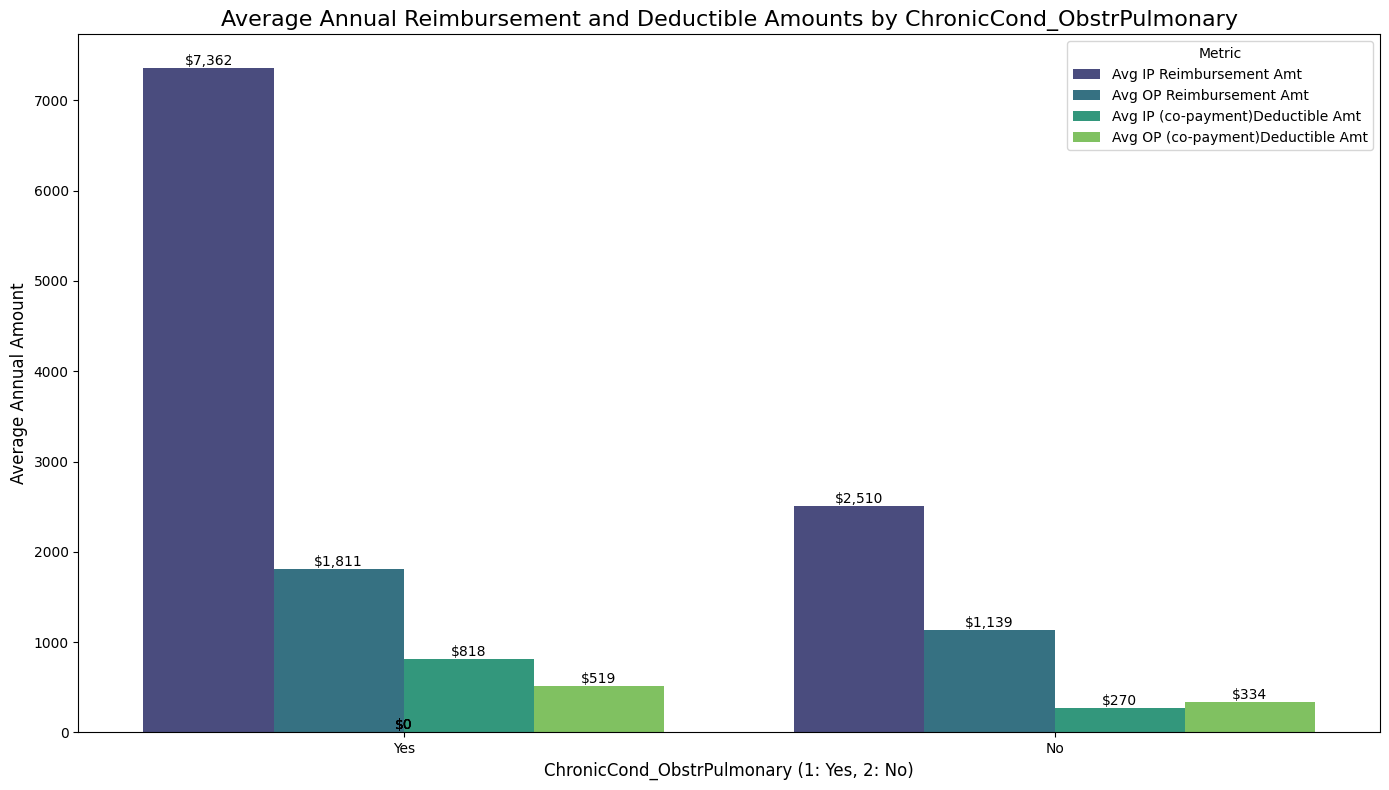

In [ ]:
pl_all_amt_melted = pl_all_amt.reset_index().melt(
    id_vars='ChronicCond_ObstrPulmonary',
    var_name='Metric',
    value_name='Amount'
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='ChronicCond_ObstrPulmonary', y='Amount', hue='Metric', data=pl_all_amt_melted, palette='viridis')

plt.title('Average Annual Reimbursement and Deductible Amounts by ChronicCond_ObstrPulmonary', fontsize=16)
plt.xlabel('ChronicCond_ObstrPulmonary (1: Yes, 2: No)', fontsize=12)
plt.ylabel('Average Annual Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No']) # Set custom x-axis labels

# Improve legend
plt.legend(title='Metric', loc='upper right')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Insights:
* Payer pays huge chunk of expenses specially when a beneficiary gets admitted with or without chronic HF disease. To be more precise, in case of +ve it is more than 50%.

13. No. of beneficiaries on the basis of 'ChronicCond_Depression'. And, the Annual IP & OP expenditures for such patients.

In [ ]:
# no of beneficiriea with or wothout chronic condition Depressionpd.
pd.DataFrame(df_train_bin.groupby('ChronicCond_Depression')['BeneID'].count())


BeneID
ChronicCond_Depression        
1                        49260
2                        89296

In [ ]:
dp_ip_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_Depression')['IPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_Depression')['BeneID'].count())
dp_ip_r.columns=['Avg IP Reimbursement Amt']
dp_ip_r

Avg IP Reimbursement Amt
ChronicCond_Depression                          
1                                    5022.162810
2                                    2909.102647

In [ ]:
dp_op_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_Depression')['OPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_Depression')['BeneID'].count())
dp_op_r.columns=['Avg OP Reimbursement Amt']
dp_op_r

Avg OP Reimbursement Amt
ChronicCond_Depression                          
1                                    1603.871701
2                                    1129.606701

In [ ]:
dp_ip_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_Depression')['IPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_Depression')['BeneID'].count())
dp_ip_d.columns=['Avg IP (co-payment)Deductible Amt']
dp_ip_d

Avg IP (co-payment)Deductible Amt
ChronicCond_Depression                                   
1                                              570.054771
2                                              305.952607

In [ ]:
dp_op_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_Depression')['OPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_Depression')['BeneID'].count())
dp_op_d.columns=['Avg OP (co-payment)Deductible Amt']
dp_op_d

Avg OP (co-payment)Deductible Amt
ChronicCond_Depression                                   
1                                              464.285708
2                                              329.963459

In [ ]:
dp_all_amt=pd.concat([dp_ip_r,dp_op_r,dp_ip_d,dp_op_d],axis=1)
dp_all_amt

Avg IP Reimbursement Amt  Avg OP Reimbursement Amt  \
ChronicCond_Depression                                                       
1                                    5022.162810               1603.871701   
2                                    2909.102647               1129.606701   

                        Avg IP (co-payment)Deductible Amt  \
ChronicCond_Depression                                      
1                                              570.054771   
2                                              305.952607   

                        Avg OP (co-payment)Deductible Amt  
ChronicCond_Depression                                     
1                                              464.285708  
2                                              329.963459

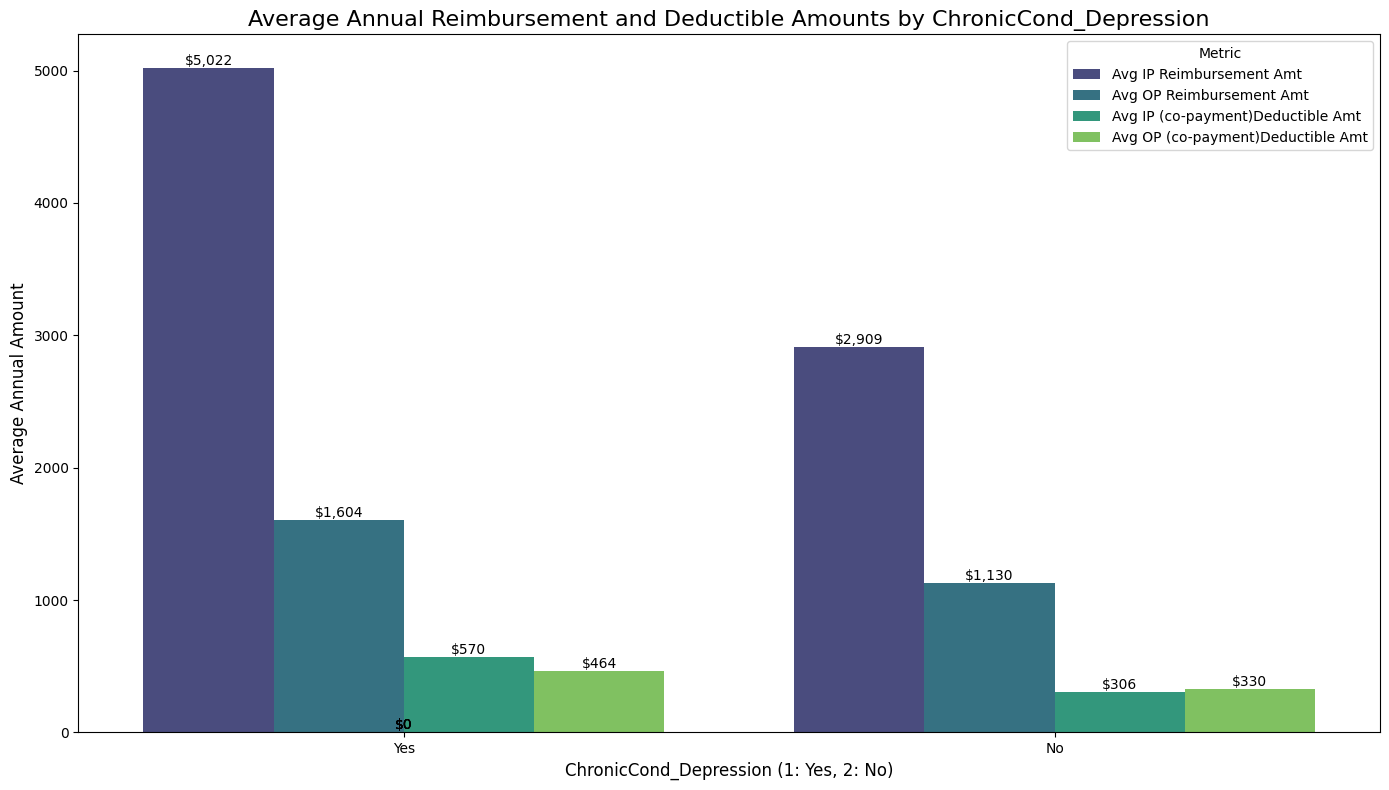

In [ ]:
dp_all_amt_melted = dp_all_amt.reset_index().melt(
    id_vars='ChronicCond_Depression',
    var_name='Metric',
    value_name='Amount'
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='ChronicCond_Depression', y='Amount', hue='Metric', data=dp_all_amt_melted, palette='viridis')

plt.title('Average Annual Reimbursement and Deductible Amounts by ChronicCond_Depression', fontsize=16)
plt.xlabel('ChronicCond_Depression (1: Yes, 2: No)', fontsize=12)
plt.ylabel('Average Annual Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No']) # Set custom x-axis labels

# Improve legend
plt.legend(title='Metric', loc='upper right')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Insights:
* Payer pays huge chunk of expenses specially when a beneficiary gets admitted with or without chronic depression disease. To be more precise, in case of +ve it is around 42%.

14. No. of beneficiaries on the basis of 'ChronicCond_Diabetes'. And, the Annual IP & OP expenditures for such patients.

In [ ]:
# no of beneficiriea with or without chronic diabetes diasease
pd.DataFrame(df_train_bin.groupby('ChronicCond_Diabetes')['BeneID'].count())

BeneID
ChronicCond_Diabetes        
1                      83391
2                      55165

In [ ]:
db_ip_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_Diabetes')['IPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_Diabetes')['BeneID'].count())
db_ip_r.columns=['Avg IP Reimbursement Amt']
db_ip_r

Avg IP Reimbursement Amt
ChronicCond_Diabetes                          
1                                  4870.622010
2                                  1830.815372

In [ ]:
db_op_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_Diabetes')['OPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_Diabetes')['BeneID'].count())
db_op_r.colimns=['Avg OP Reimbursement Amt']
db_op_r

/tmp/ipython-input-3031907017.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  db_op_r.colimns=['Avg OP Reimbursement Amt']


0
ChronicCond_Diabetes             
1                     1607.259536
2                      831.054110

In [ ]:
db_ip_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_Diabetes')['IPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_Diabetes')['BeneID'].count())
db_ip_d.columns=['Avg IP (co-payment)Deductible Amt']
db_ip_d

Avg IP (co-payment)Deductible Amt
ChronicCond_Diabetes                                   
1                                            534.254680
2                                            196.668359

In [ ]:
db_op_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_Diabetes')['OPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_Diabetes')['BeneID'].count())
db_op_d.columns=['Avg OP (co-payment)Deductible Amt']
db_op_d

Avg OP (co-payment)Deductible Amt
ChronicCond_Diabetes                                   
1                                            464.345421
2                                            246.767008

In [ ]:
db_all_amt=pd.concat([db_ip_r,db_op_r,db_ip_d,db_op_d],axis=1)
db_all_amt

Avg IP Reimbursement Amt            0  \
ChronicCond_Diabetes                                          
1                                  4870.622010  1607.259536   
2                                  1830.815372   831.054110   

                      Avg IP (co-payment)Deductible Amt  \
ChronicCond_Diabetes                                      
1                                            534.254680   
2                                            196.668359   

                      Avg OP (co-payment)Deductible Amt  
ChronicCond_Diabetes                                     
1                                            464.345421  
2                                            246.767008

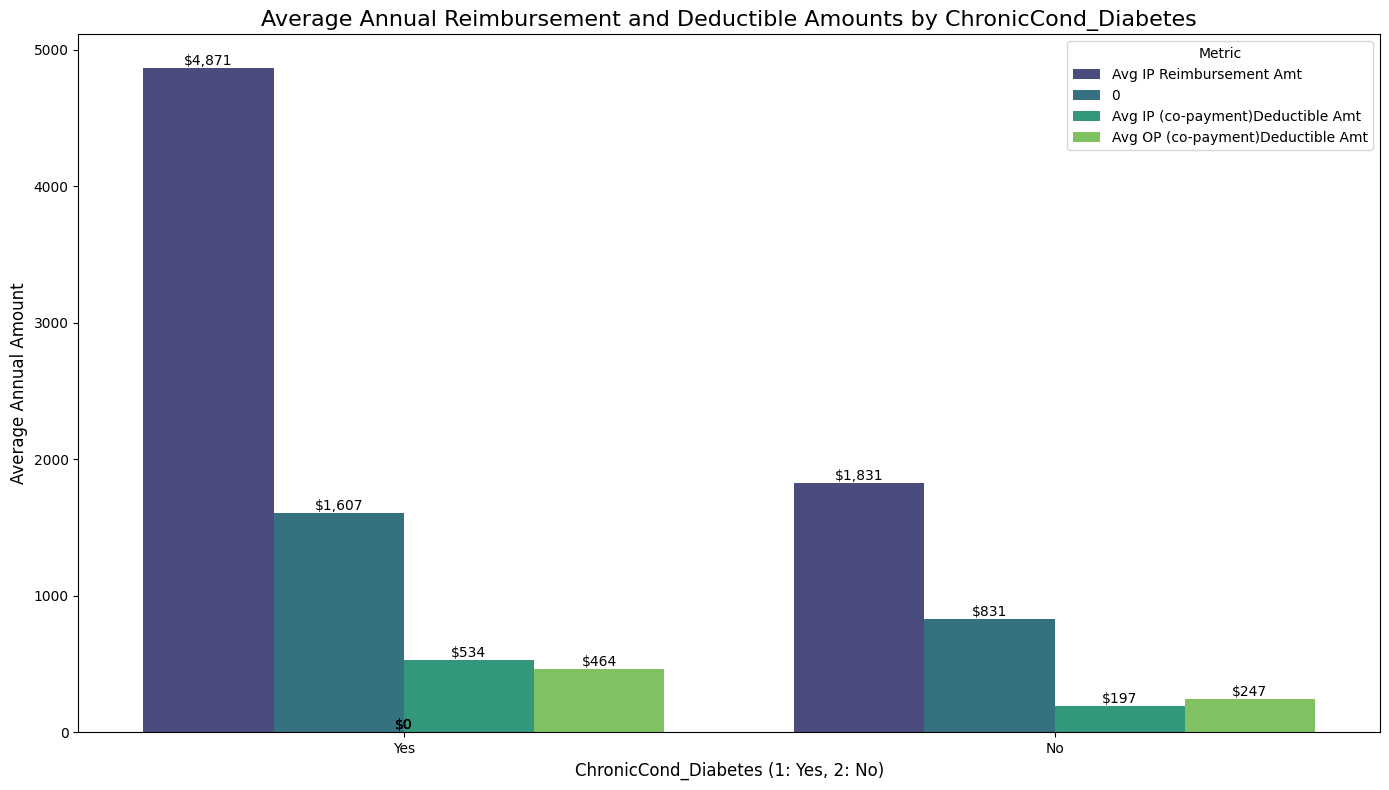

In [ ]:
db_all_amt_melted = db_all_amt.reset_index().melt(
    id_vars='ChronicCond_Diabetes',
    var_name='Metric',
    value_name='Amount'
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='ChronicCond_Diabetes', y='Amount', hue='Metric', data=db_all_amt_melted, palette='viridis')

plt.title('Average Annual Reimbursement and Deductible Amounts by ChronicCond_Diabetes', fontsize=16)
plt.xlabel('ChronicCond_Diabetes (1: Yes, 2: No)', fontsize=12)
plt.ylabel('Average Annual Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No']) # Set custom x-axis labels

# Improve legend
plt.legend(title='Metric', loc='upper right')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Insights
* Payer pays huge chunk of expenses specially when a beneficiary gets admitted with or without chronic diabetes disease. To be more precise, in case of +ve it is more than 50%.

15. No. of beneficiaries on the basis of 'ChronicCond_IschemicHeart'. And, the Annual IP & OP expenditures for such patients.

In [ ]:
#no of beneficiries with or without chroniccond IschemicHeart diaseas
pd.DataFrame(df_train_bin.groupby('ChronicCond_IschemicHeart')['BeneID'].count())

BeneID
ChronicCond_IschemicHeart        
1                           93644
2                           44912

In [ ]:
ih_ip_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_IschemicHeart')['IPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_IschemicHeart')['BeneID'].count())
ih_ip_r.columns=['Avg IP Reimbursement Amt']
ih_ip_r

Avg IP Reimbursement Amt
ChronicCond_IschemicHeart                          
1                                       4697.683034
2                                       1497.442554

In [ ]:
ih_op_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_IschemicHeart')['OPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_IschemicHeart')['BeneID'].count())
ih_op_r.columns=['Avg OP Reimbursement Amt']
ih_op_r

Avg OP Reimbursement Amt
ChronicCond_IschemicHeart                          
1                                       1521.077485
2                                        833.547827

In [ ]:
ih_ip_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_IschemicHeart')['IPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_IschemicHeart')['BeneID'].count())
ih_ip_d.columns=['Avg IP (co-payment)Deductible Amt']
ih_ip_d

Avg IP (co-payment)Deductible Amt
ChronicCond_IschemicHeart                                   
1                                                 506.661676
2                                                 177.133416

In [ ]:
ih_op_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_IschemicHeart')['OPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_IschemicHeart')['BeneID'].count())
ih_op_d.columns=['Avg OP (co-payment)Deductible Amt']
ih_op_d

Avg OP (co-payment)Deductible Amt
ChronicCond_IschemicHeart                                   
1                                                 441.447535
2                                                 244.839197

In [ ]:
ih_all_amt=pd.concat([ih_ip_r,ih_op_r,ih_ip_d,ih_op_d],axis=1)
ih_all_amt

Avg IP Reimbursement Amt  Avg OP Reimbursement Amt  \
ChronicCond_IschemicHeart                                                       
1                                       4697.683034               1521.077485   
2                                       1497.442554                833.547827   

                           Avg IP (co-payment)Deductible Amt  \
ChronicCond_IschemicHeart                                      
1                                                 506.661676   
2                                                 177.133416   

                           Avg OP (co-payment)Deductible Amt  
ChronicCond_IschemicHeart                                     
1                                                 441.447535  
2                                                 244.839197

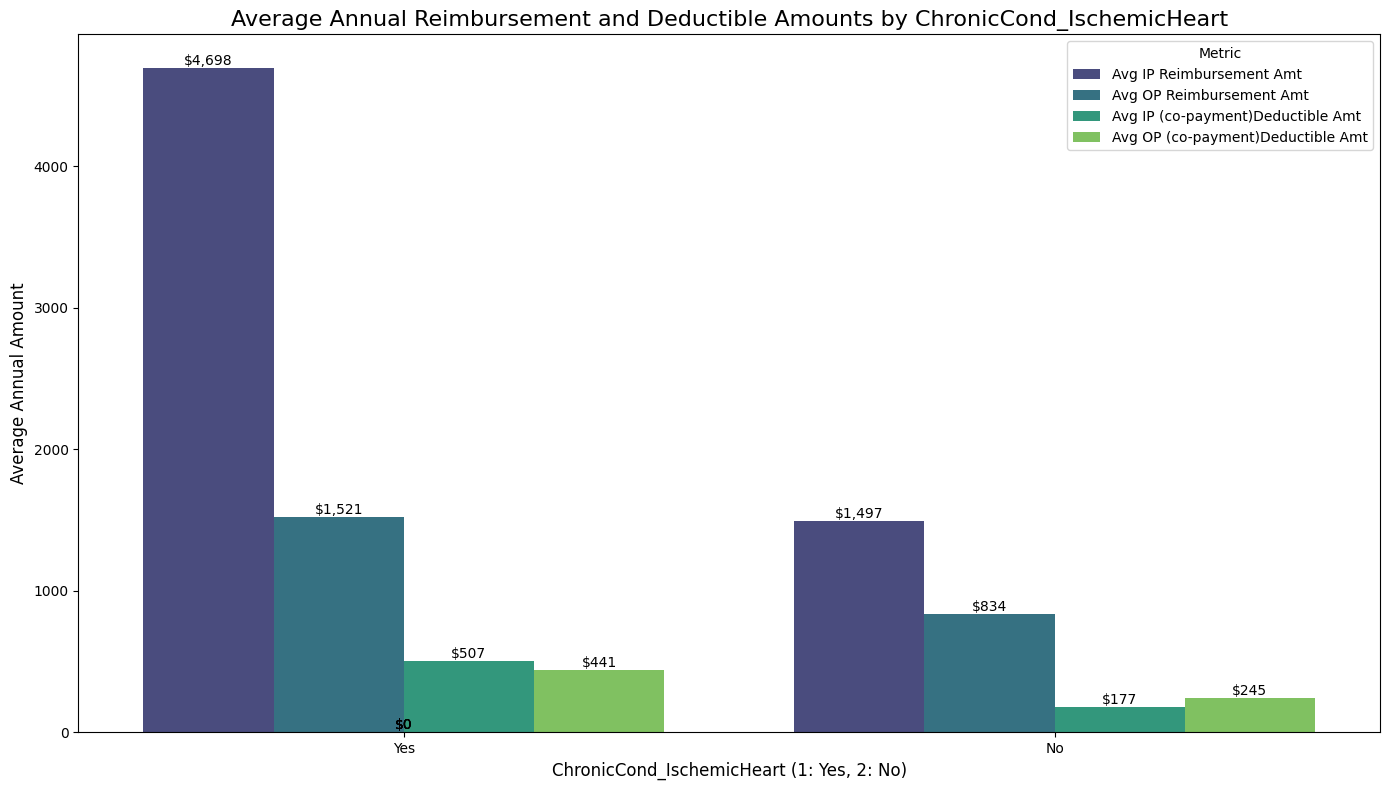

In [ ]:
ih_all_amt_melted = ih_all_amt.reset_index().melt(
    id_vars='ChronicCond_IschemicHeart',
    var_name='Metric',
    value_name='Amount'
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='ChronicCond_IschemicHeart', y='Amount', hue='Metric', data=ih_all_amt_melted, palette='viridis')

plt.title('Average Annual Reimbursement and Deductible Amounts by ChronicCond_IschemicHeart', fontsize=16)
plt.xlabel('ChronicCond_IschemicHeart (1: Yes, 2: No)', fontsize=12)
plt.ylabel('Average Annual Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No']) # Set custom x-axis labels

# Improve legend
plt.legend(title='Metric', loc='upper right')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Insights:
* Payer pays huge chunk of expenses specially when a beneficiary gets admitted with or without chronic IH disease. To be more precise, in case of +ve it is more than 50%.

16. No. of beneficiaries on the basis of 'ChronicCond_Osteoporasis'. And, the Annual IP & OP expenditures for such patients.

In [ ]:
# no. of beneficiries with or without chronic Osteoporaisi disease
pd.DataFrame(df_train_bin.groupby('ChronicCond_Osteoporasis')['BeneID'].count())


BeneID
ChronicCond_Osteoporasis        
1                          38059
2                         100497

In [ ]:
os_ip_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_Osteoporasis')['IPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_Osteoporasis')['BeneID'].count())
os_ip_r.columns=['Avg IP Reimbursement Amt']
os_ip_r

Avg IP Reimbursement Amt
ChronicCond_Osteoporasis                          
1                                      4608.419822
2                                      3301.303721

In [ ]:
os_op_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_Osteoporasis')['OPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_Osteoporasis')['BeneID'].count())
os_op_r.columns=['Avg OP Reimbursement Amt']
os_op_r

Avg OP Reimbursement Amt
ChronicCond_Osteoporasis                          
1                                      1494.709004
2                                      1223.807178

In [ ]:
os_ip_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_Osteoporasis')['IPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_Osteoporasis')['BeneID'].count())
os_ip_d.columns=['Avg IP (co-payment)Deductible Amt']
os_ip_d

Avg IP (co-payment)Deductible Amt
ChronicCond_Osteoporasis                                   
1                                                512.038204
2                                                357.359722

In [ ]:
os_op_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_Osteoporasis')['OPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_Osteoporasis')['BeneID'].count())
os_op_d.columns=['Avg OP (co-payment)Deductible Amt']
os_op_d

Avg OP (co-payment)Deductible Amt
ChronicCond_Osteoporasis                                   
1                                                436.249271
2                                                355.552106

In [ ]:
os_all_amt=pd.concat([os_ip_r,os_op_r,os_ip_d,os_op_d],axis=1)
os_all_amt

Avg IP Reimbursement Amt  Avg OP Reimbursement Amt  \
ChronicCond_Osteoporasis                                                       
1                                      4608.419822               1494.709004   
2                                      3301.303721               1223.807178   

                          Avg IP (co-payment)Deductible Amt  \
ChronicCond_Osteoporasis                                      
1                                                512.038204   
2                                                357.359722   

                          Avg OP (co-payment)Deductible Amt  
ChronicCond_Osteoporasis                                     
1                                                436.249271  
2                                                355.552106

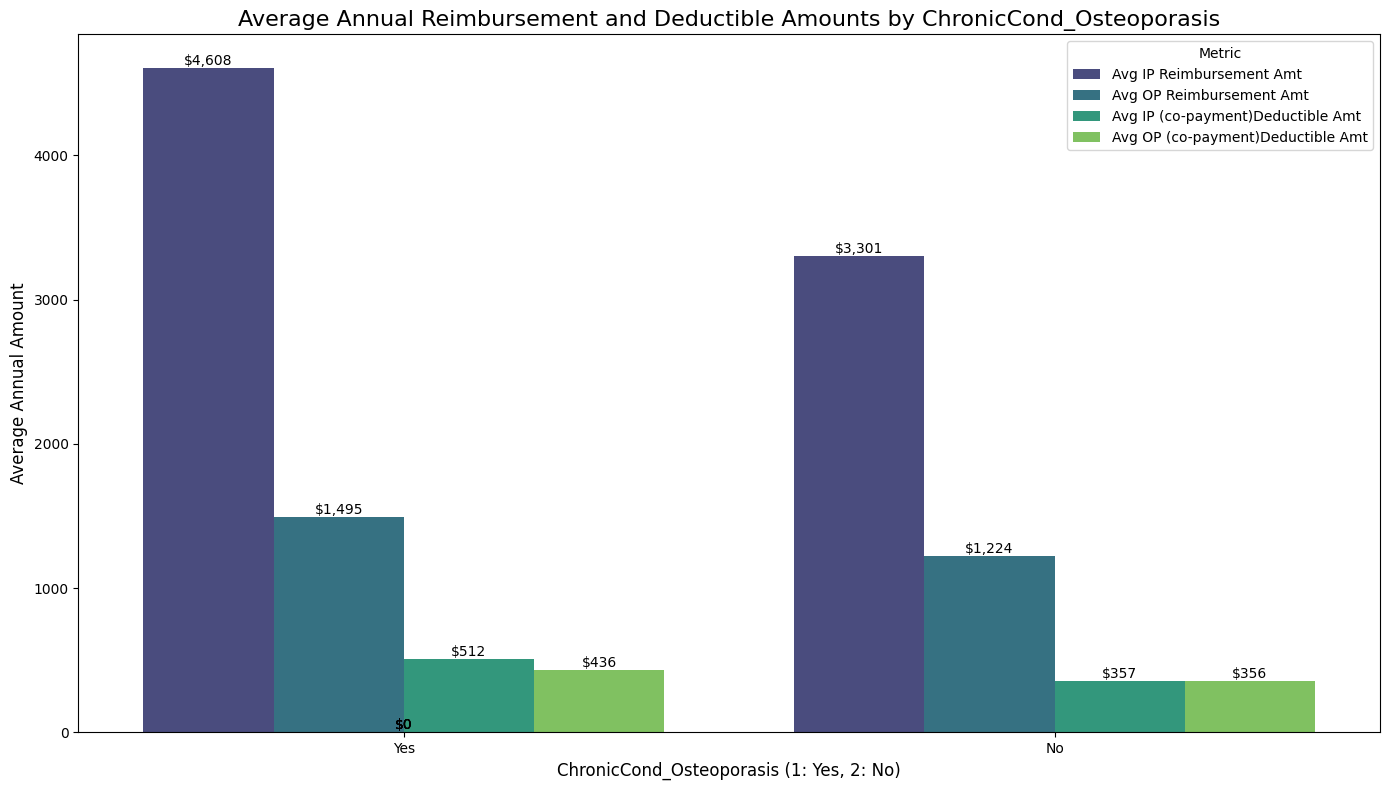

In [ ]:
os_all_amt_melted = os_all_amt.reset_index().melt(
    id_vars='ChronicCond_Osteoporasis',
    var_name='Metric',
    value_name='Amount'
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='ChronicCond_Osteoporasis', y='Amount', hue='Metric', data=os_all_amt_melted, palette='viridis')

plt.title('Average Annual Reimbursement and Deductible Amounts by ChronicCond_Osteoporasis', fontsize=16)
plt.xlabel('ChronicCond_Osteoporasis (1: Yes, 2: No)', fontsize=12)
plt.ylabel('Average Annual Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No']) # Set custom x-axis labels

# Improve legend
plt.legend(title='Metric', loc='upper right')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

insights
* Payer pays huge chunk of expenses specially when a beneficiary gets admitted with or without chronic Osteoporasisi disease. To be more precise, in case of +ve the difference is not that high.

17. No. of beneficiaries on the basis of 'ChronicCond_rheumatoidarthritis'. And, the Annual IP & OP expenditures for such patients.

In [ ]:
# no of beneficirieas with or without chronic rheumatoidarthritis disease
pd.DataFrame(df_train_bin.groupby('ChronicCond_rheumatoidarthritis')['BeneID'].count())


BeneID
ChronicCond_rheumatoidarthritis        
1                                 35584
2                                102972

In [ ]:
rh_ip_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_rheumatoidarthritis')['IPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_rheumatoidarthritis')['BeneID'].count())
rh_ip_r.columns=['Avg IP Reimbursement Amt']
rh_ip_r

Avg IP Reimbursement Amt
ChronicCond_rheumatoidarthritis                          
1                                             5102.027597
2                                             3162.145243

In [ ]:
rh_op_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_rheumatoidarthritis')['OPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_rheumatoidarthritis')['BeneID'].count())
rh_op_r.columns=['Avg OP Reimbursement Amt']
rh_op_r

Avg OP Reimbursement Amt
ChronicCond_rheumatoidarthritis                          
1                                             1548.057835
2                                             1211.882745

In [ ]:
rh_ip_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_rheumatoidarthritis')['IPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_rheumatoidarthritis')['BeneID'].count())
rh_ip_d.columns=['Avg IP (co-payment)Deductible Amt']
rh_ip_d

Avg IP (co-payment)Deductible Amt
ChronicCond_rheumatoidarthritis                                   
1                                                       562.630789
2                                                       343.594259

In [ ]:
rh_op_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_rheumatoidarthritis')['OPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_rheumatoidarthritis')['BeneID'].count())
rh_op_d.columns=['Avg OP (co-payment)Deductible Amt']
rh_op_d

Avg OP (co-payment)Deductible Amt
ChronicCond_rheumatoidarthritis                                   
1                                                       453.423196
2                                                       351.556928

In [ ]:
rh_all_amt=pd.concat([rh_ip_r,rh_op_r,rh_ip_d,rh_op_d],axis=1)
rh_all_amt

Avg IP Reimbursement Amt  \
ChronicCond_rheumatoidarthritis                             
1                                             5102.027597   
2                                             3162.145243   

                                 Avg OP Reimbursement Amt  \
ChronicCond_rheumatoidarthritis                             
1                                             1548.057835   
2                                             1211.882745   

                                 Avg IP (co-payment)Deductible Amt  \
ChronicCond_rheumatoidarthritis                                      
1                                                       562.630789   
2                                                       343.594259   

                                 Avg OP (co-payment)Deductible Amt  
ChronicCond_rheumatoidarthritis                                     
1                                                       453.423196  
2                                                       351.556928

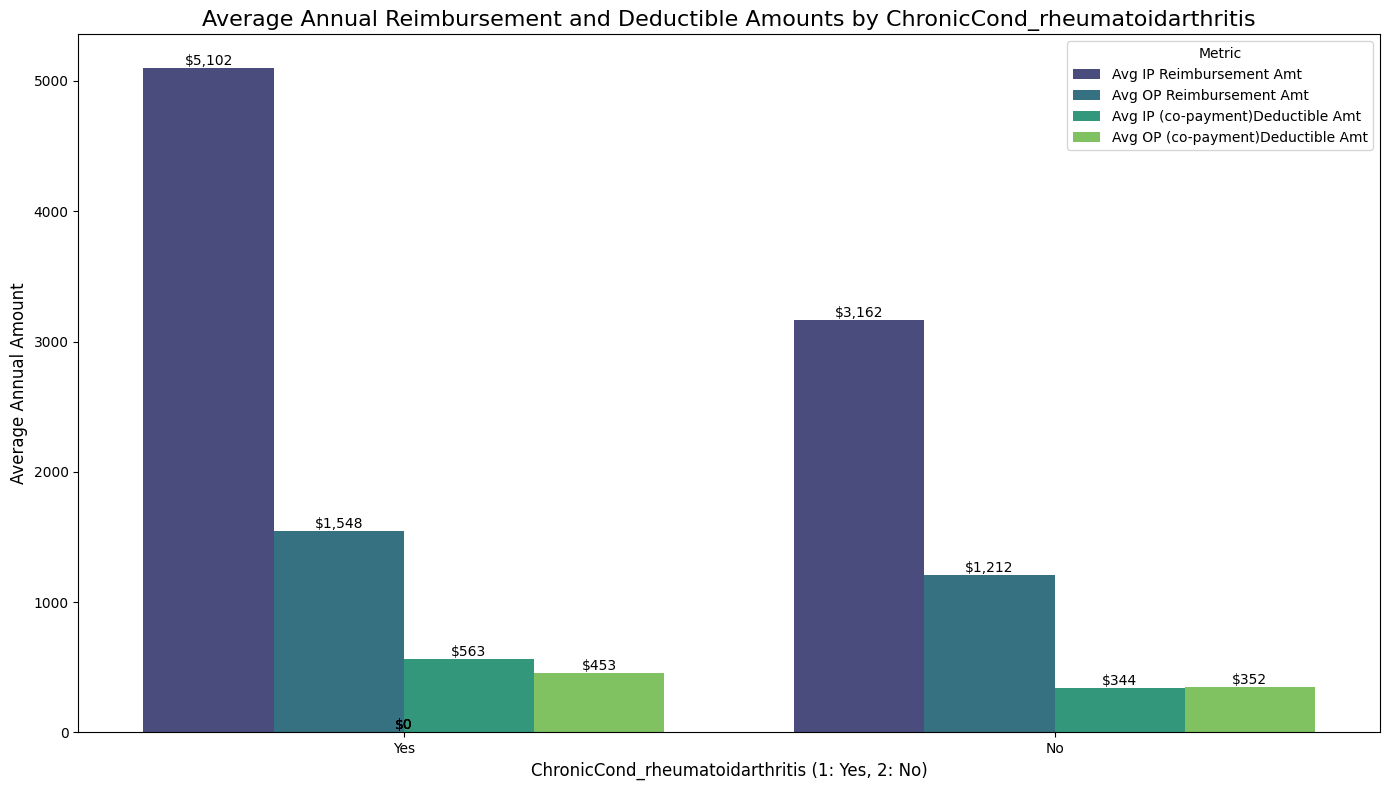

In [ ]:
rh_all_amt_melted = rh_all_amt.reset_index().melt(
    id_vars='ChronicCond_rheumatoidarthritis',
    var_name='Metric',
    value_name='Amount'
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='ChronicCond_rheumatoidarthritis', y='Amount', hue='Metric', data=rh_all_amt_melted, palette='viridis')

plt.title('Average Annual Reimbursement and Deductible Amounts by ChronicCond_rheumatoidarthritis', fontsize=16)
plt.xlabel('ChronicCond_rheumatoidarthritis (1: Yes, 2: No)', fontsize=12)
plt.ylabel('Average Annual Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No']) # Set custom x-axis labels

# Improve legend
plt.legend(title='Metric', loc='upper right')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

insights
* Payer pays huge chunk of expenses specially when a beneficiary gets admitted with or without chronic RH disease. To be more precise, in case of +ve the difference is not that high.

18. NO. of beneficiaries on the basis of 'ChronicCond_stroke'. And, the Annual IP & OP expenditures for such patients.

In [ ]:
# no . of beneficiries with or without chronic stroke disease
pd.DataFrame(df_train_bin.groupby('ChronicCond_stroke')['BeneID'].count())

BeneID
ChronicCond_stroke        
1                    10954
2                   127602

In [ ]:
st_ip_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_stroke')['IPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_stroke')['BeneID'].count())
st_ip_r.columns=['Avg IP Reimbursement Amt']
st_ip_r

Avg IP Reimbursement Amt
ChronicCond_stroke                          
1                                8111.475260
2                                3278.239134

In [ ]:
st_op_r=pd.DataFrame(df_train_bin.groupby('ChronicCond_stroke')['OPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('ChronicCond_stroke')['BeneID'].count())
st_op_r.columns=['Avg OP Reimbursement Amt']
st_op_r

Avg OP Reimbursement Amt
ChronicCond_stroke                          
1                                1925.197188
2                                1244.396404

In [ ]:
st_ip_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_stroke')['IPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_stroke')['BeneID'].count())
st_ip_d.columns=['Avg IP (co-payment)Deductible Amt']
st_ip_d

Avg IP (co-payment)Deductible Amt
ChronicCond_stroke                                   
1                                          861.399489
2                                          360.225326

In [ ]:
st_op_d=pd.DataFrame(df_train_bin.groupby('ChronicCond_stroke')['OPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('ChronicCond_stroke')['BeneID'].count())
st_op_d.columns=['Avg OP (co-payment)Deductible Amt']
st_op_d

Avg OP (co-payment)Deductible Amt
ChronicCond_stroke                                   
1                                          535.947508
2                                          364.135061

In [ ]:
st_all_amt=pd.concat([st_ip_r,st_op_r,st_ip_d,st_op_d],axis=1)
st_all_amt

Avg IP Reimbursement Amt  Avg OP Reimbursement Amt  \
ChronicCond_stroke                                                       
1                                8111.475260               1925.197188   
2                                3278.239134               1244.396404   

                    Avg IP (co-payment)Deductible Amt  \
ChronicCond_stroke                                      
1                                          861.399489   
2                                          360.225326   

                    Avg OP (co-payment)Deductible Amt  
ChronicCond_stroke                                     
1                                          535.947508  
2                                          364.135061

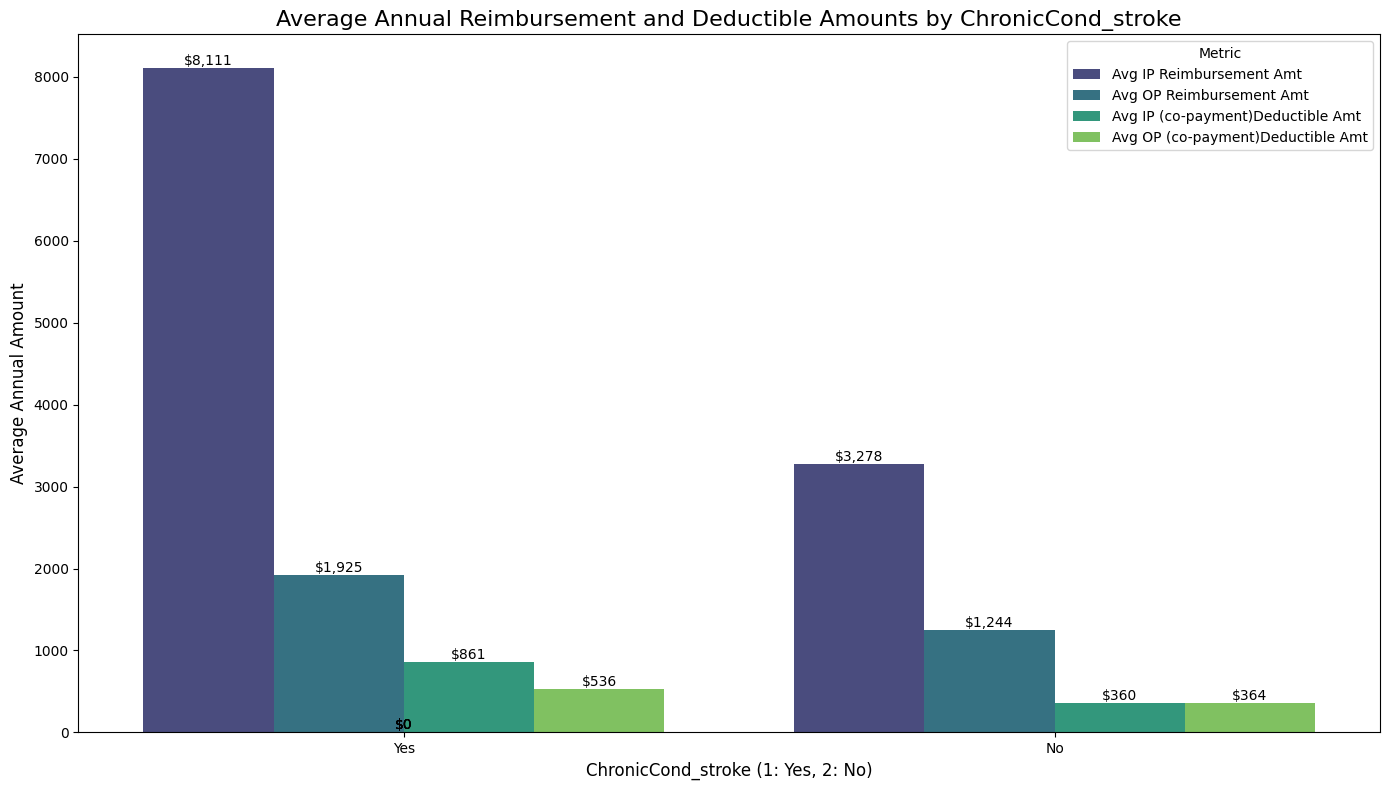

In [ ]:
st_all_amt_melted = st_all_amt.reset_index().melt(
    id_vars='ChronicCond_stroke',
    var_name='Metric',
    value_name='Amount'
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='ChronicCond_stroke', y='Amount', hue='Metric', data=st_all_amt_melted, palette='viridis')

plt.title('Average Annual Reimbursement and Deductible Amounts by ChronicCond_stroke', fontsize=16)
plt.xlabel('ChronicCond_stroke (1: Yes, 2: No)', fontsize=12)
plt.ylabel('Average Annual Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No']) # Set custom x-axis labels

# Improve legend
plt.legend(title='Metric', loc='upper right')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Insights
* Payer pays huge chunk of expenses specially when a beneficiary gets admitted with or without chronic Stroke disease. To be more precise, in case of +ve the difference is more than 50%.

19. No. of beneficiaries on the basis of 'RenalDiseaseIndicator'. And, the Annual IP & OP expenditures for such patients.¶

In [ ]:
#no of beneficiriea with or without chronic Renal disease
pd.DataFrame(df_train_bin.groupby('RenalDiseaseIndicator')['BeneID'].count())

BeneID
RenalDiseaseIndicator        
0                      118978
Y                       19578

In [ ]:
rd_ip_r=pd.DataFrame(df_train_bin.groupby('RenalDiseaseIndicator')['IPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('RenalDiseaseIndicator')['BeneID'].count())
rd_ip_r.columns=['Avg IP Reimbursement Amt']
rd_ip_r

Avg IP Reimbursement Amt
RenalDiseaseIndicator                          
0                                   3051.430264
Y                                   7360.808050

In [ ]:
rd_op_r=pd.DataFrame(df_train_bin.groupby('RenalDiseaseIndicator')['OPAnnualReimbursementAmt'].sum()/df_train_bin.groupby('RenalDiseaseIndicator')['BeneID'].count())
rd_op_r.columns=['Avg OP Reimbursement Amt']
rd_op_r

Avg OP Reimbursement Amt
RenalDiseaseIndicator                          
0                                   1047.351611
Y                                   2822.774543

In [ ]:
rd_ip_d=pd.DataFrame(df_train_bin.groupby('RenalDiseaseIndicator')['IPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('RenalDiseaseIndicator')['BeneID'].count())
rd_ip_d.columns=['Avg IP (co-payment)Deductible Amt']
rd_ip_d

Avg IP (co-payment)Deductible Amt
RenalDiseaseIndicator                                   
0                                             342.384239
Y                                             749.057616

In [ ]:
rd_op_d=pd.DataFrame(df_train_bin.groupby('RenalDiseaseIndicator')['OPAnnualDeductibleAmt'].sum()/df_train_bin.groupby('RenalDiseaseIndicator')['BeneID'].count())
rd_op_d.columns=['Avg OP (co-payment)Deductible Amt']
rd_op_d

Avg OP (co-payment)Deductible Amt
RenalDiseaseIndicator                                   
0                                             311.659139
Y                                             779.167944

In [ ]:
rd_all_amt=pd.concat([rd_ip_r,rd_op_r,rd_ip_d,rd_op_d],axis=1)
rd_all_amt

Avg IP Reimbursement Amt  Avg OP Reimbursement Amt  \
RenalDiseaseIndicator                                                       
0                                   3051.430264               1047.351611   
Y                                   7360.808050               2822.774543   

                       Avg IP (co-payment)Deductible Amt  \
RenalDiseaseIndicator                                      
0                                             342.384239   
Y                                             749.057616   

                       Avg OP (co-payment)Deductible Amt  
RenalDiseaseIndicator                                     
0                                             311.659139  
Y                                             779.167944

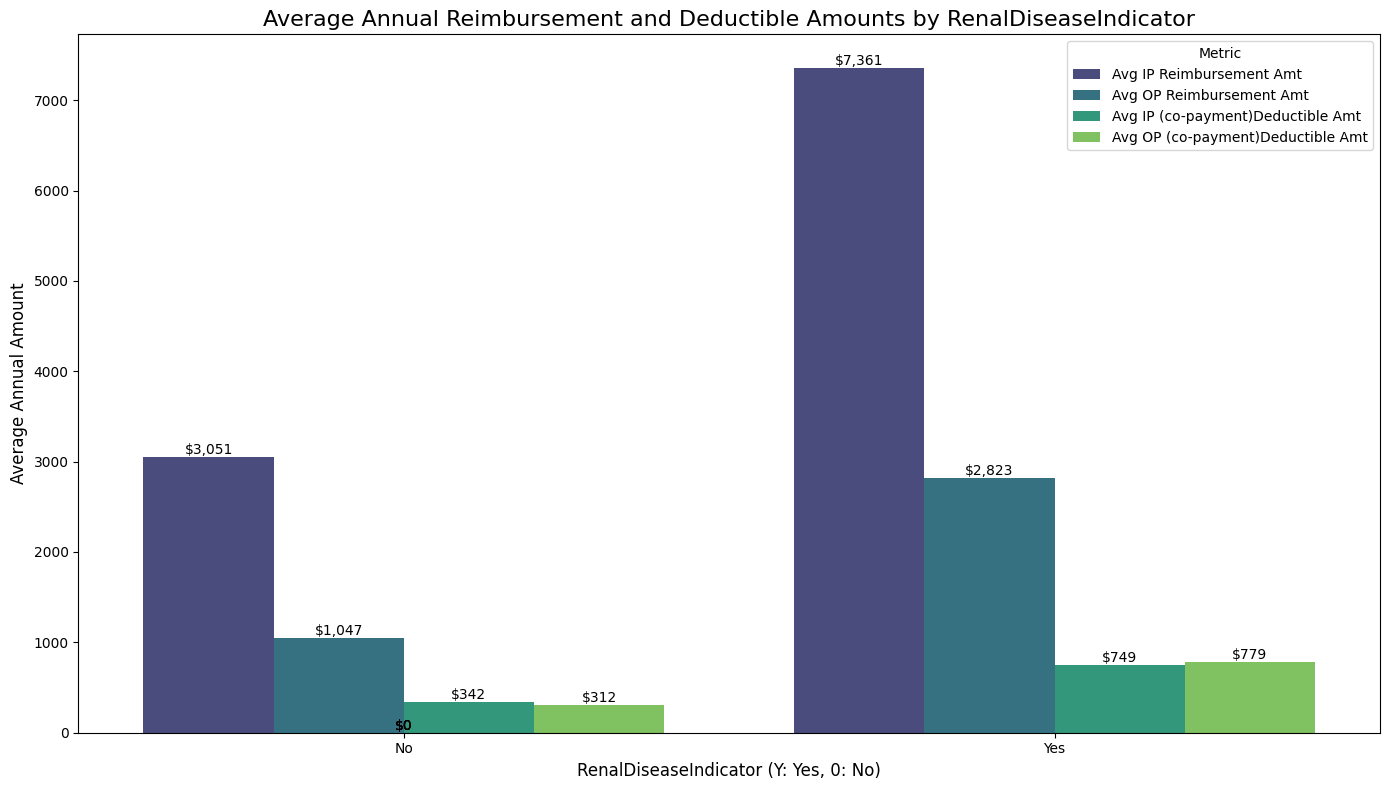

In [ ]:
rd_all_amt_melted = rd_all_amt.reset_index().melt(
    id_vars='RenalDiseaseIndicator',
    var_name='Metric',
    value_name='Amount'
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='RenalDiseaseIndicator', y='Amount', hue='Metric', data=rd_all_amt_melted, palette='viridis')

plt.title('Average Annual Reimbursement and Deductible Amounts by RenalDiseaseIndicator', fontsize=16)
plt.xlabel('RenalDiseaseIndicator (Y: Yes, 0: No)', fontsize=12)
plt.ylabel('Average Annual Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes']) # Set custom x-axis labels

# Improve legend
plt.legend(title='Metric', loc='upper right')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Insights:
* Payer pays huge chunk of expenses specially when a beneficiary gets admitted with or without Renal Kidney Disease. To be more precise, in case of +ve the difference is more than 50%.

20. Lets check the of the pre-disease indicators for the Annual IP expenditures for such patients across male and female

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

def plot_strip_plots(x_col, hue_col, y_col, lgd_title):
    """
    Description : This function is created for plotting the spread of data points of pre-disease indicators for the Annual IP and OP expenditures
    across males and females.

    Input: It accepts below parameters:
        1. x_col : Gender feature.
        2. hue_Col : Pre-Disease indicator
        3. y_col : Feature like re-imbursement or deductible amount whose percentiles you want to generate.
        4. lgd_title : Category code for which you want to generate the data spread.

    Output: It displays the stipplot graph of the same.
    """
    # Removed the problematic style context
    plt.figure(figsize=(10,7))
    # Corrected the DataFrame name to df_train_bin
    sns.stripplot(data=df_train_bin, x=x_col, y=y_col, hue=hue_col, palette='plasma')
    # Providing the labels and title to the graph
    # Assuming label_font_dict and title_font_dict are defined elsewhere or can be removed
    plt.xlabel("\n{}".format(x_col)) # Removed fontdict
    plt.xticks(rotation=90, size=12)
    plt.ylabel("{}\n".format(y_col)) # Removed fontdict
    plt.grid(which='major', linestyle="-.", color='lightpink')
    plt.minorticks_on()
    plt.title("Spread of payment paid by payer\n") # Removed fontdict
    plt.legend(loc='upper center',title=lgd_title)
    plt.show()

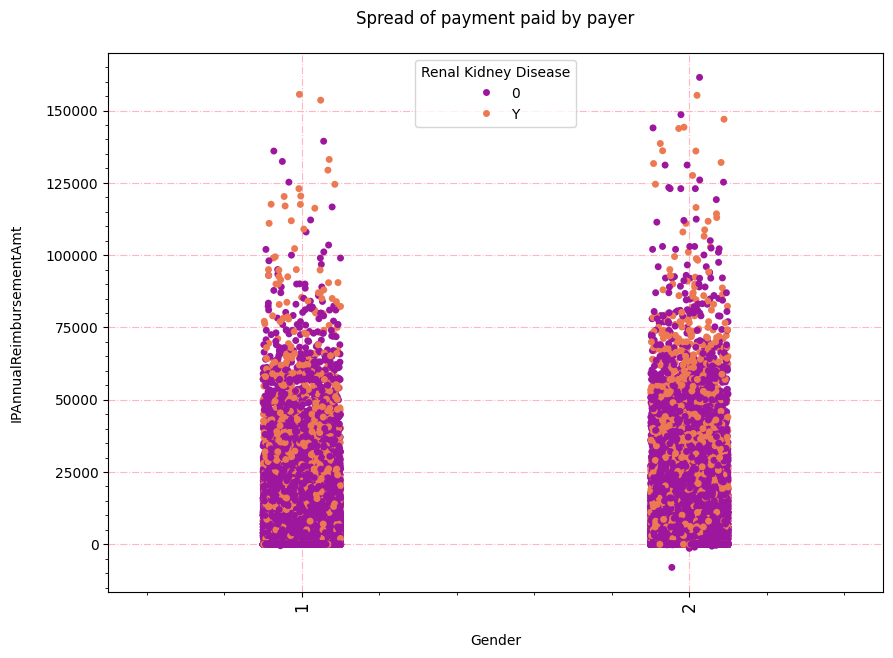

In [ ]:
plot_strip_plots(x_col='Gender', hue_col="RenalDiseaseIndicator", y_col='IPAnnualReimbursementAmt', lgd_title="Renal Kidney Disease")

Insights
* Graph indicate us the complete overlapping of data points with some potential outliers
* Here, another thing that I found is that few of the points lying in the negative range(this is quite strange may be error).

In [ ]:
df_train_bin['OPAnnualDeductibleAmt'].min(),df_train_bin['IPAnnualDeductibleAmt'].min()

(0, 0)

In [ ]:
df_train_bin['OPAnnualReimbursementAmt'].min(),df_train_bin['IPAnnualReimbursementAmt'].min()

(-70, -8000)

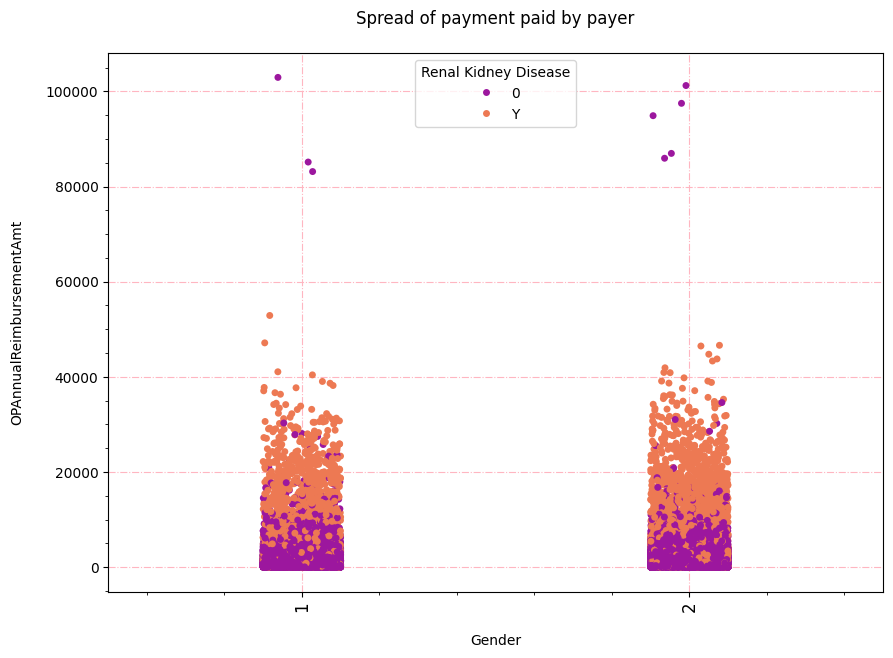

In [ ]:
plot_strip_plots(x_col='Gender', hue_col="RenalDiseaseIndicator", y_col='OPAnnualReimbursementAmt', lgd_title="Renal Kidney Disease")

Insights:
* from above graph shows us the complete overlapping of data points with some potential outliers.


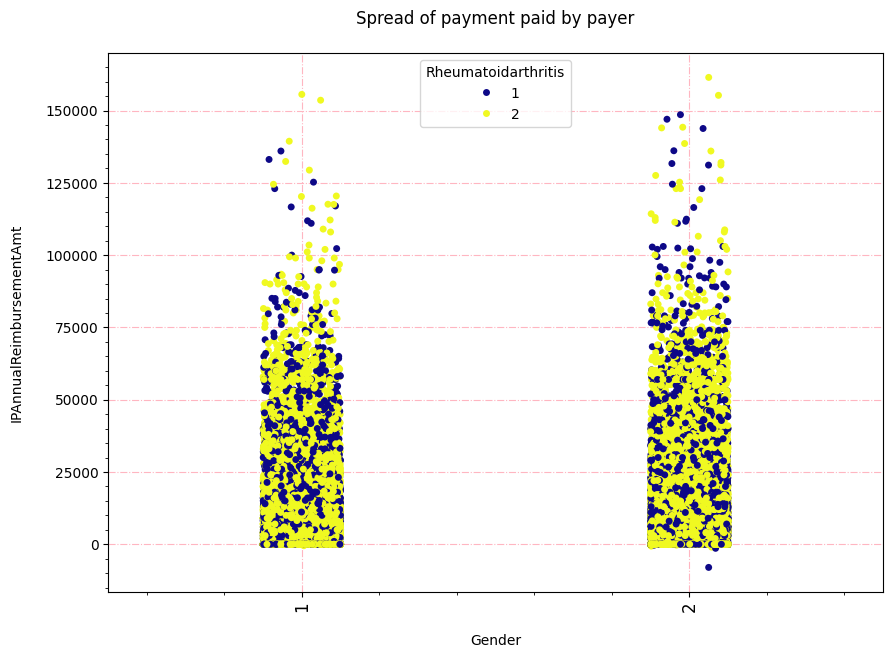

In [ ]:
plot_strip_plots(x_col='Gender', hue_col="ChronicCond_rheumatoidarthritis", y_col='IPAnnualReimbursementAmt', lgd_title="Rheumatoidarthritis")

Insight:
 * From above graph shows us the complete overlapping of data points with some potential outliers(may be fraud)
 * Here, another thing taht I found is that few of the points lying in the negative range

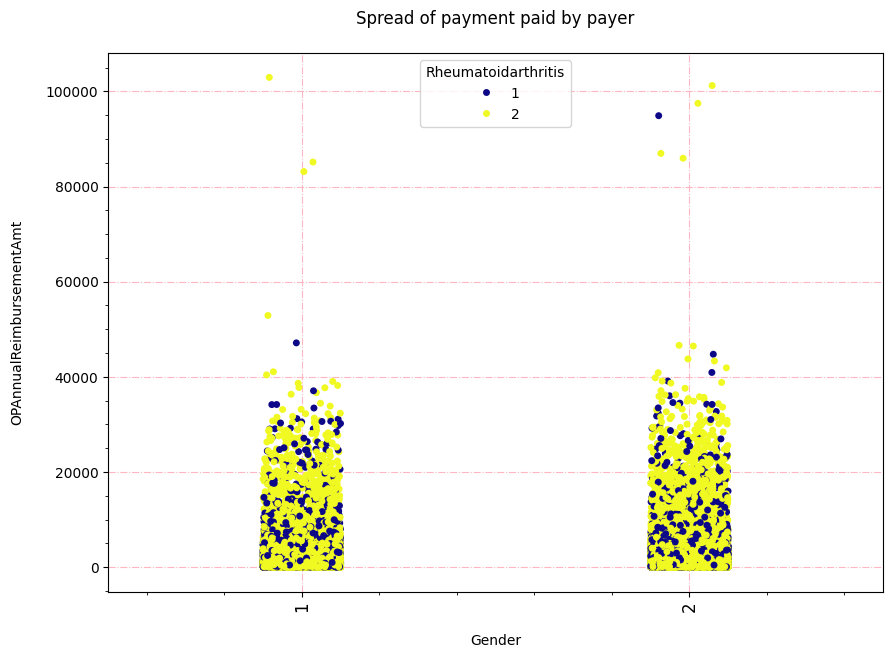

In [ ]:
plot_strip_plots(x_col='Gender', hue_col="ChronicCond_rheumatoidarthritis", y_col='OPAnnualReimbursementAmt', lgd_title="Rheumatoidarthritis")

Insights
 * From above graph shows us the complete overlapping of data points with some potential outliers(may be fraud)

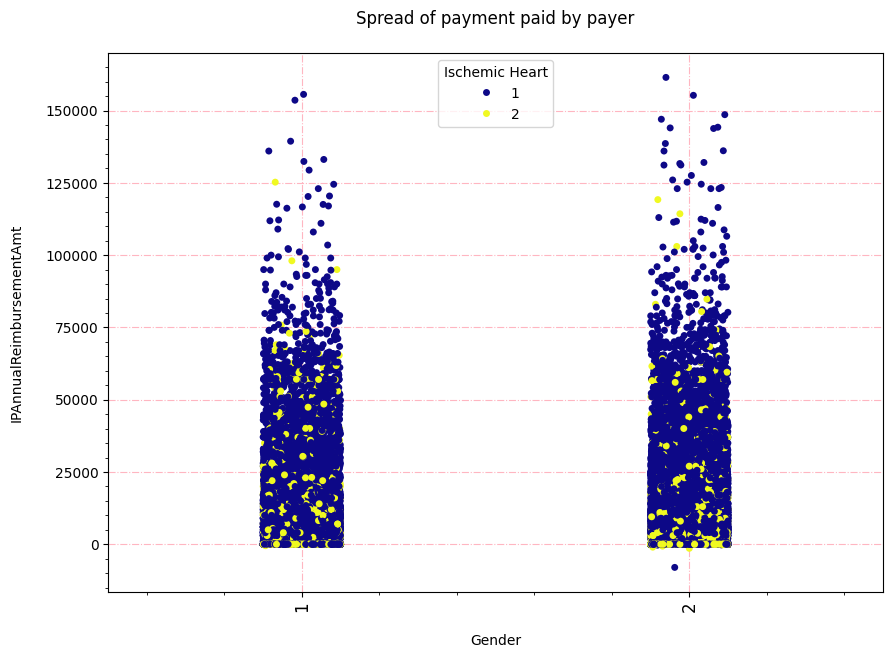

In [ ]:
plot_strip_plots(x_col='Gender', hue_col="ChronicCond_IschemicHeart", y_col='IPAnnualReimbursementAmt', lgd_title="Ischemic Heart")

Insights:
* above graph shows us the complete overlapping of data points with some potential outliers specifically for patients with Chronic Heart Desiase(may be fraud).
* Here, another thing taht I found is that few of the points lying in the negative range(this is quite strange may be error).

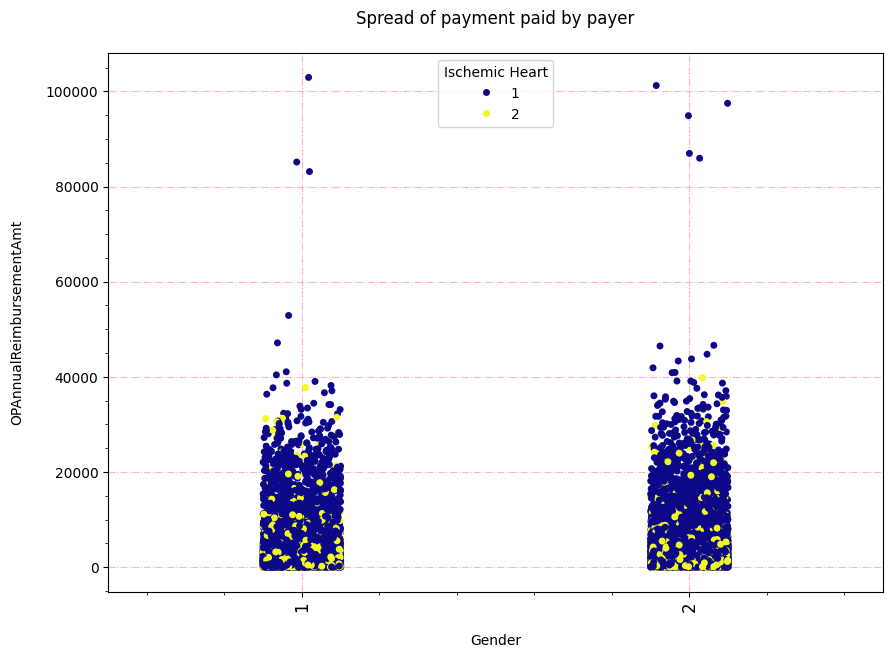

In [ ]:
plot_strip_plots(x_col='Gender', hue_col="ChronicCond_IschemicHeart", y_col='OPAnnualReimbursementAmt', lgd_title="Ischemic Heart")

Insights:
* from above graph shows us the complete overlapping of data points with some potential outliers specifically for patients with Chronic Heart Desiase(may be fraud)

21. Lets know the spread of Annual IP and OP expenditures through out the AGE and its assciated features for males and females.

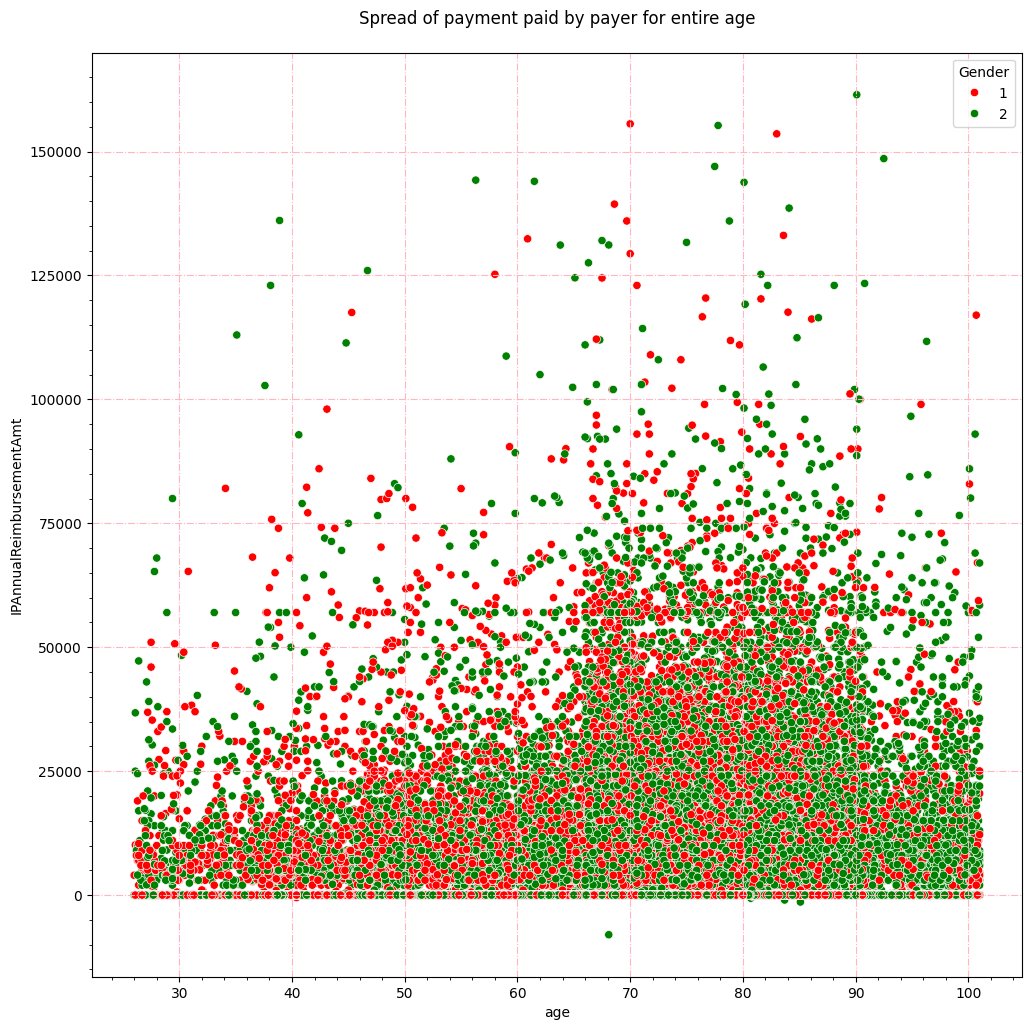

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df_train_bin, x='age', y='IPAnnualReimbursementAmt', hue='Gender', palette=['red', 'green'])
plt.grid(which='major', linestyle="-.", color='lightpink')
plt.minorticks_on()
plt.title("Spread of payment paid by payer for entire age\n")
plt.show()

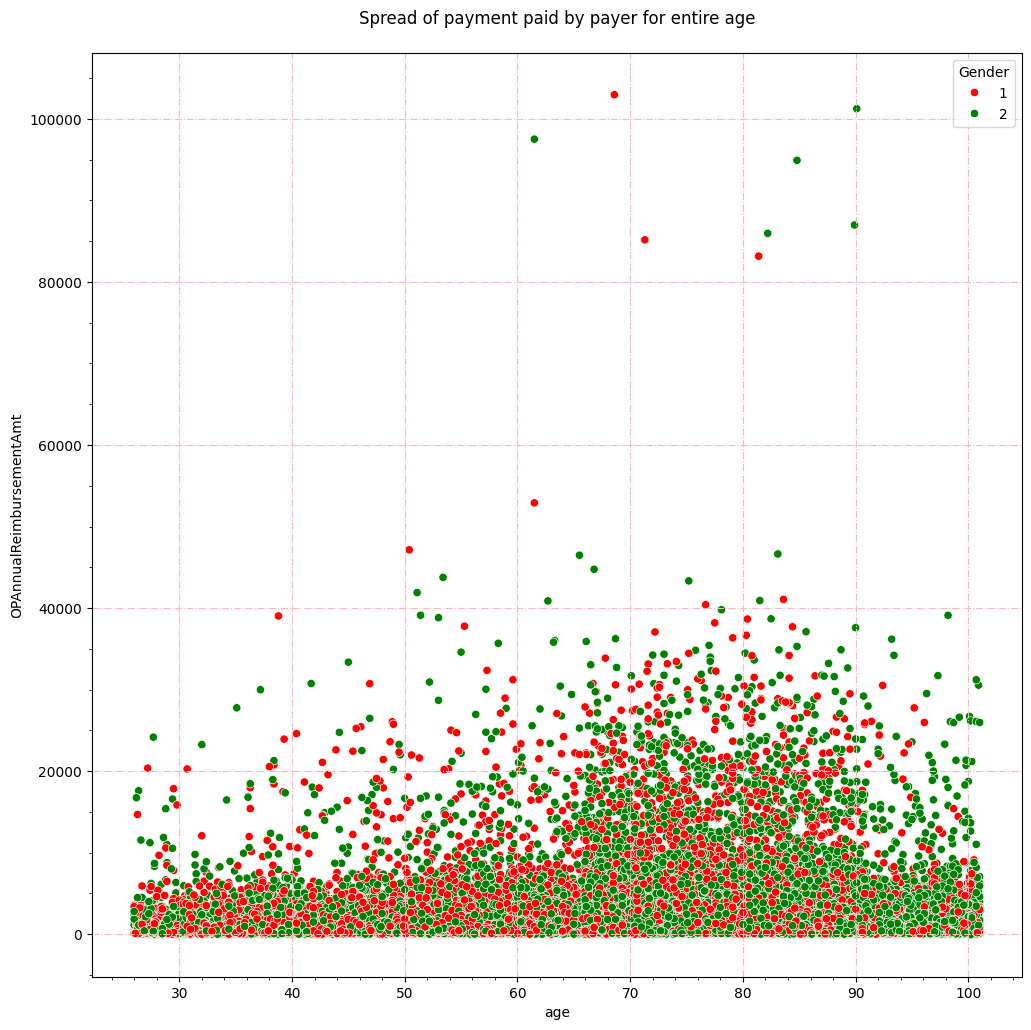

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df_train_bin, x='age', y='OPAnnualReimbursementAmt', hue='Gender', palette=['red', 'green'])
plt.grid(which='major', linestyle="-.", color='lightpink')
plt.minorticks_on()
plt.title("Spread of payment paid by payer for entire age\n")
plt.show()

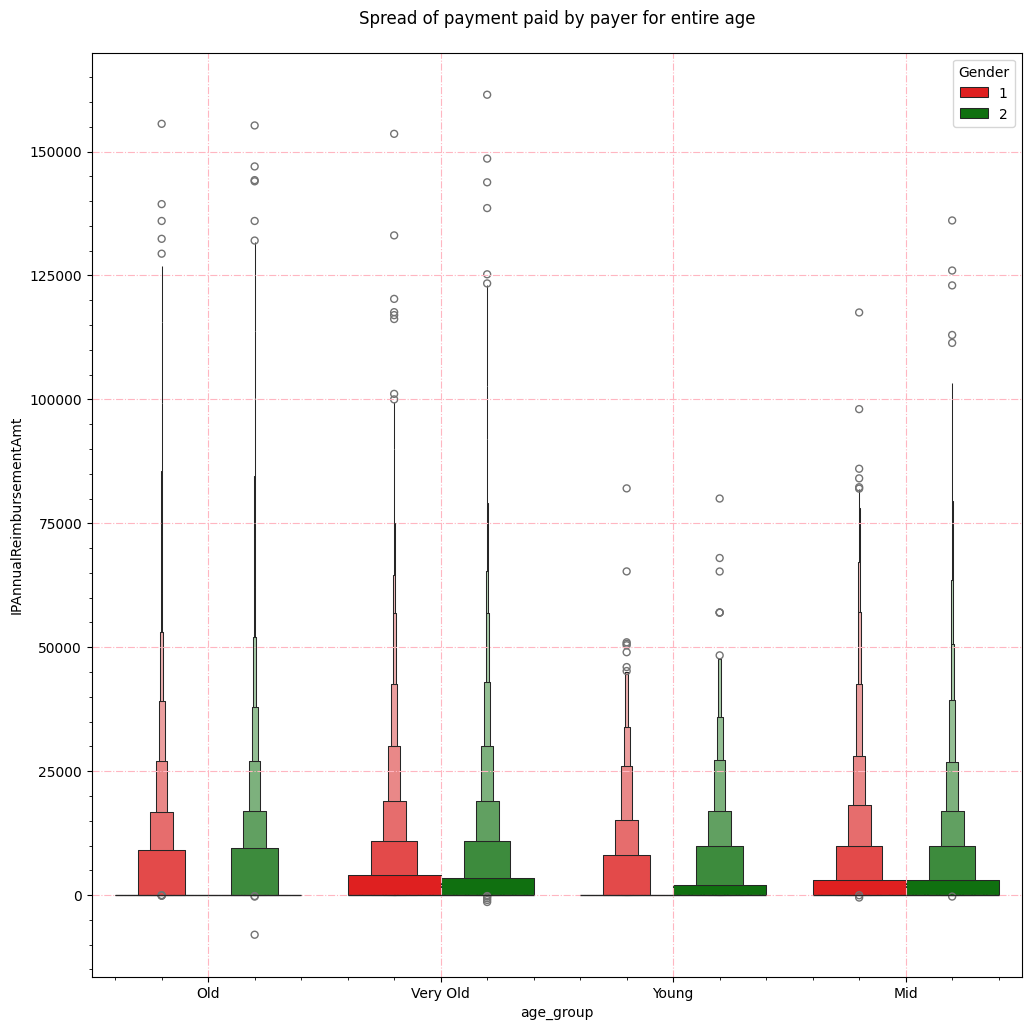

In [ ]:
plt.figure(figsize=(12,12))
sns.boxenplot(data=df_train_bin, x='age_group', y='IPAnnualReimbursementAmt', hue='Gender', palette=['red', 'green'])
plt.grid(which='major', linestyle="-.", color='lightpink')
plt.minorticks_on()
plt.title("Spread of payment paid by payer for entire age\n")
plt.show()

Insights:
*  From graph shows us there is no such difference in the amounts across different AGE Groups.

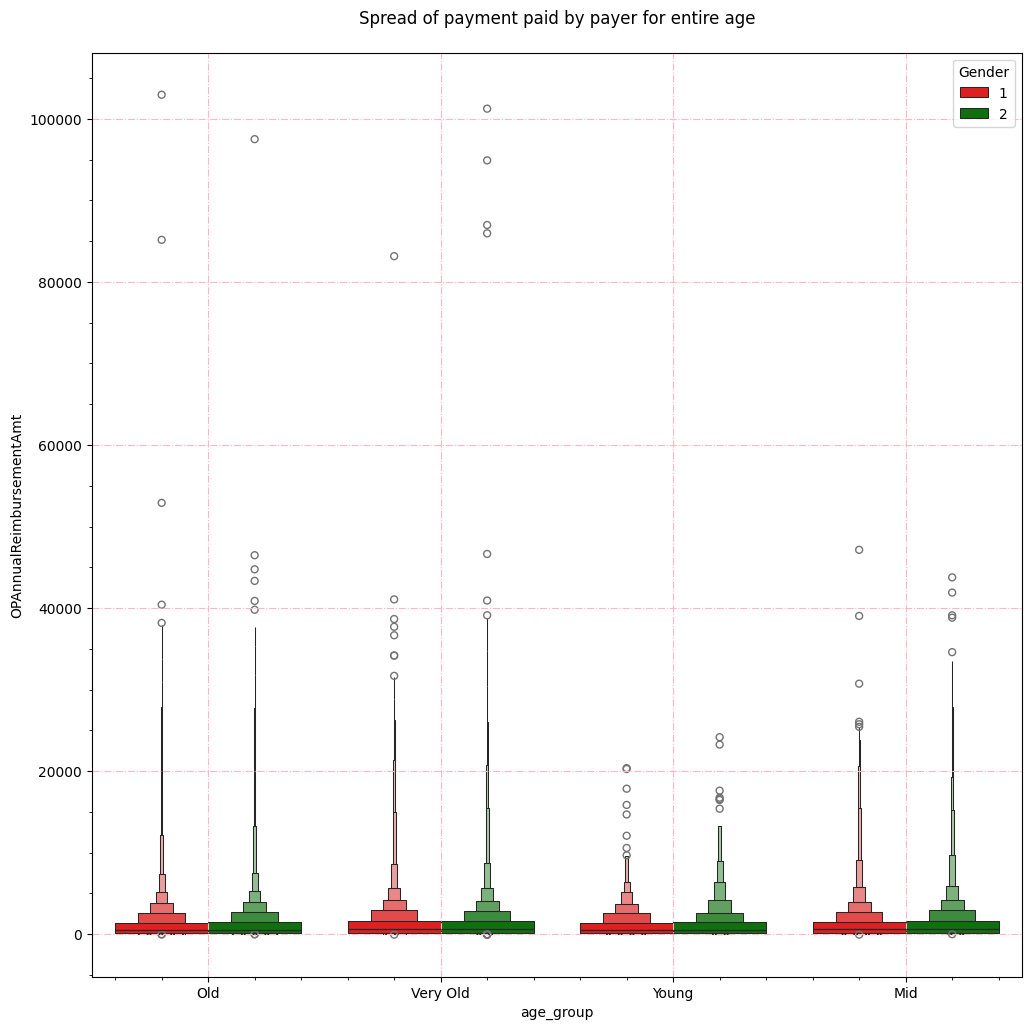

In [ ]:
plt.figure(figsize=(12,12))
sns.boxenplot(data=df_train_bin, x='age_group', y='OPAnnualReimbursementAmt', hue='Gender', palette=['red', 'green'])
plt.grid(which='major', linestyle="-.", color='lightpink')
plt.minorticks_on()
plt.title("Spread of payment paid by payer for entire age\n")
plt.show()

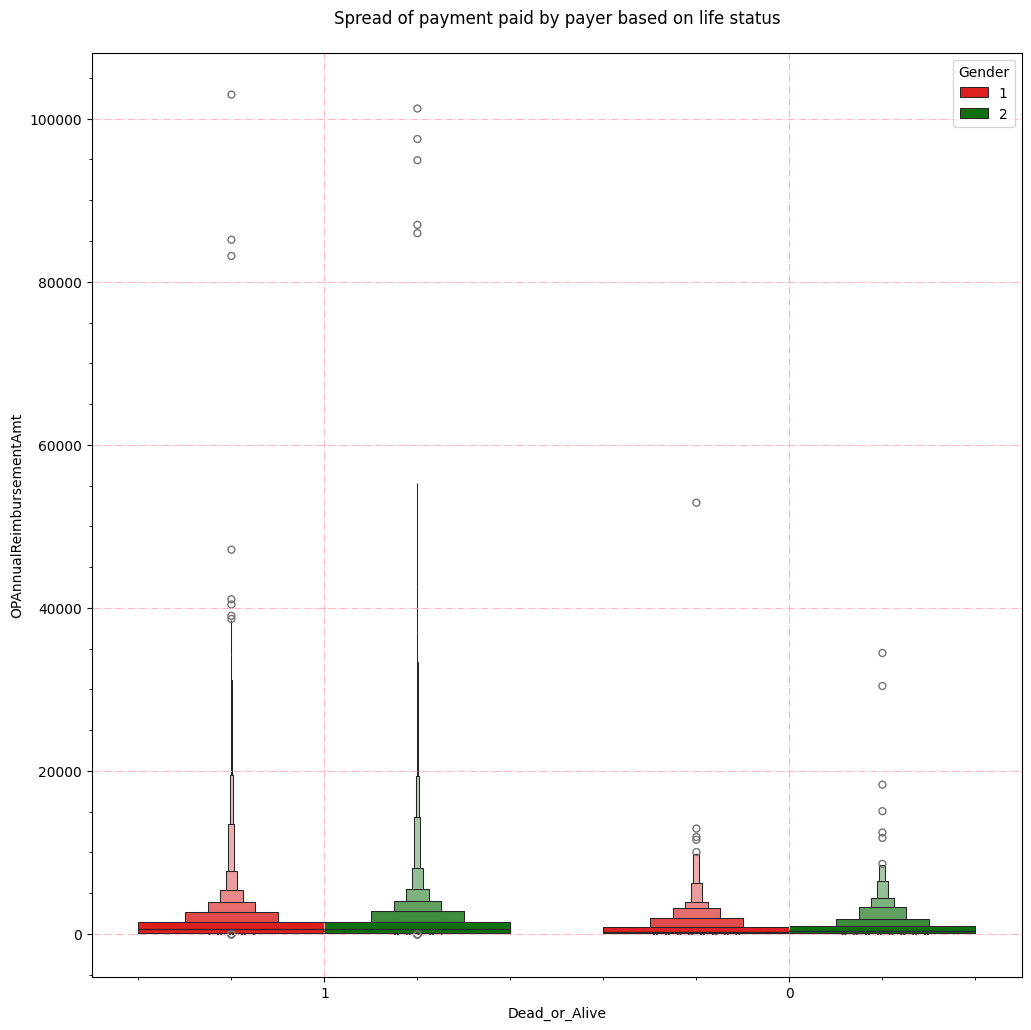

In [ ]:
plt.figure(figsize=(12,12))
sns.boxenplot(data=df_train_bin, x='Dead_or_Alive', y='OPAnnualReimbursementAmt', hue='Gender', palette=['red', 'green'])
plt.grid(which='major', linestyle="-.", color='lightpink')
plt.minorticks_on()
plt.title("Spread of payment paid by payer based on life status\n")
plt.show()

In [ ]:
df_train_bin.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Pat_Age_yr', 'Pat_Age_month', 'Dead_or_Alive',
       'age', 'age_group'],
      dtype='object')

Removing NoOf Months_partACov, NoOfMonths_PartBCov and DOD.

In [ ]:
df_train_bin.drop(columns=['NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'DOD'], inplace=True)

In [ ]:
df_train_bin.shape

(138556, 27)

In [ ]:
df_train_bin.to_csv('df_train_bene.csv', index=False)

IP and OP Data EDA

In [ ]:
df_train_inpatient.shape

(40474, 30)

In [ ]:
df_train_outpatient.shape

(517737, 27)

In [ ]:
df_train_inpatient.dtypes


BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
dtype: object

**Number of patients who either are in-patients or out-patients**

In [ ]:
ip_bene_uniq=set(df_train_inpatient['BeneID'])
op_bene_uniq=set(df_train_outpatient['BeneID'])

In [ ]:
len(op_bene_uniq), len(ip_bene_uniq)

(133980, 31289)

In [ ]:
Only_inpatient=ip_bene_uniq.intersection(op_bene_uniq)
len(Only_inpatient)

26713

In [ ]:
Only_outpatient=op_bene_uniq.difference(ip_bene_uniq)
len(Only_outpatient)

107267

In [ ]:
total_patients_counts=(len(Only_inpatient)+ len(Only_outpatient))


In [ ]:
total_patients_counts

133980

In [ ]:
len(Only_inpatient)

26713

In [ ]:
per_of_inpatient=len(Only_inpatient)/total_patients_counts*100
print(f'Percentage of only inpatients:',per_of_inpatient)
per_of_outpatient=len(Only_outpatient)/total_patients_counts*100
print(f'Percentage of only oupt patients:',per_of_outpatient)


Percentage of only inpatients: 19.938050455291833
Percentage of only oupt patients: 80.06194954470817


Insights:
* 80% patient get medicate without admission

Deeper in IN-Patients Data

In [ ]:
df_test_inpatient.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1  BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   
2  BENE11026  CLM78930   2009-12-09  2009-12-13  PRV53758   
3  BENE11031  CLM56810   2009-06-23  2009-07-06  PRV55825   
4  BENE11085  CLM34625   2009-01-20  2009-01-31  PRV52338   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    9000          PHY317786          PHY427017   
1                   14000          PHY314656          PHY426644   
2                    2000          PHY349495                NaN   
3                   16000          PHY429538          PHY371893   
4                   19000          PHY397161                NaN   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-09-09  ...               5990                 570   
1            NaN  2008-12-25  ...               4549               29570   
2            NaN  2009-12-09  ...              78650                7813   
3            NaN  2009-06-23  ...               4254               41400   
4            NaN  2009-01-20  ...              V6109                7242   

  ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0              41071                4280             4443.0   
1              34831                 NaN             5551.0   
2               4254                 NaN                NaN   
3               5849               41401             8152.0   
4                NaN                 NaN                NaN   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0             5849.0                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3             3320.0                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 30 columns]

In [ ]:
df_test_inpatient.isnull().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

we can seen that majority of ClmOricedure and Clm Diagnosis column have null values.

Added column that indicating whether beneficiries get admitted or not

In [ ]:
df_train_inpatient['Admitted?']= 1

Added

In [ ]:
df_train_inpatient['ClaimStartDt']=pd.to_datetime(df_train_inpatient['ClaimStartDt'], format='%Y-%m-%d')
df_train_inpatient['ClaimEndDt']=pd.to_datetime(df_train_inpatient['ClaimEndDt'], format='%Y-%m-%d')

Adding clearence days

In [ ]:
df_train_inpatient['Claim_duration']=(df_train_inpatient['ClaimEndDt'] - df_train_inpatient['ClaimStartDt']).dt.days

In [ ]:
df_train_inpatient['Claim_duration'].describe()

count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: Claim_duration, dtype: float64

Insights
* From the above plot, we can decude that the majority of the claims filed for less than 7 days.

In [ ]:
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(df_train_inpatient["Claim_duration"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 1.0
Percentile --> 20.0 and its value is --> 2.0
Percentile --> 25.0 and its value is --> 2.0
Percentile --> 30.0 and its value is --> 3.0
Percentile --> 40.0 and its value is --> 3.0
Percentile --> 50.0 and its value is --> 4.0
Percentile --> 60.0 and its value is --> 5.0
Percentile --> 70.0 and its value is --> 6.0
Percentile --> 75.0 and its value is --> 7.0
Percentile --> 80.0 and its value is --> 8.0
Percentile --> 90.0 and its value is --> 12.0
Percentile --> 91.0 and its value is --> 13.0
Percentile --> 92.0 and its value is --> 14.0
Percentile --> 93.0 and its value is --> 14.0
Percentile --> 94.0 and its value is --> 15.0
Percentile --> 95.0 and its value is --> 17.0
Percentile --> 96.0 and its value is --> 18.0
Percentile --> 97.0 and its value is --> 21.0
Percentile --> 98.0 and its value is --> 25.0
Percentile --> 99.0 and its value is --> 32.0
Percentile --> 99.9 and its value is --> 35.0
Percentile --> 99.99 and its value is --> 35

Insights
* From the results, we can say that 90% of the claims are filed for just 12 days.

Finding relationship b/w Amount of Insurance Claim Reimbursed v/s Claim Clearance Days?

In [ ]:
unq_claim_duration_days = df_train_inpatient['Claim_duration'].unique()
unq_claim_duration_days

array([ 6,  2,  3,  8, 17,  5,  4,  7,  1, 11, 35,  9, 15, 12, 24, 23, 14,
        0, 10, 13, 18, 19, 28, 16, 21, 26, 22, 32, 27, 20, 31, 25, 34, 30,
       29, 33, 36])

In [ ]:
tot_claims_filed_for_specific_days = pd.DataFrame(df_train_inpatient.groupby(['Claim_duration'])['BeneID'].count())
tot_claims_filed_for_specific_days

BeneID
Claim_duration        
0                  605
1                 4599
2                 6119
3                 6899
4                 4993
5                 3579
6                 2714
7                 2210
8                 1612
9                 1154
10                 916
11                 728
12                 582
13                 518
14                 462
15                 388
16                 303
17                 285
18                 212
19                 174
20                 146
21                 148
22                 121
23                 103
24                  80
25                  67
26                  69
27                  77
28                  71
29                  42
30                  36
31                  24
32                  40
33                  37
34                  28
35                 331
36                   2

In [ ]:
tot_insc_amount_for_claim_durations = pd.DataFrame(df_train_inpatient.groupby(['Claim_duration'])['InscClaimAmtReimbursed'].sum())
tot_insc_amount_for_claim_durations

InscClaimAmtReimbursed
Claim_duration                        
0                              3925000
1                             33356000
2                             43987610
3                             56477460
4                             43932690
5                             33962440
6                             29057610
7                             25537200
8                             20637600
9                             15083360
10                            13411460
11                            11063700
12                             9337000
13                             8402600
14                             7707700
15                             6868900
16                             5236800
17                             4915400
18                             4238000
19                             3273900
20                             2205300
21                             2596600
22                             2319700
23                             1815000
24                             1148000
25                             1214000
26                             1171000
27                             1485490
28                             1185000
29                              757000
30                              826000
31                              603000
32                              909000
33                              894000
34                              567500
35                             8157000
36                               31000

In [ ]:
claim_clearance_amts = pd.merge(left=tot_claims_filed_for_specific_days, right=tot_insc_amount_for_claim_durations,
                                how='inner',
                                left_on=tot_claims_filed_for_specific_days.index,
                                right_on=tot_insc_amount_for_claim_durations.index)

claim_clearance_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']
claim_clearance_amts.head()

Claim_durations_in_days  Total_claims  All_Claims_Total_Amount
0                        0           605                  3925000
1                        1          4599                 33356000
2                        2          6119                 43987610
3                        3          6899                 56477460
4                        4          4993                 43932690

In [ ]:
claim_clearance_amts['Avg_Claim_Insc_Amount'] = np.round(claim_clearance_amts['All_Claims_Total_Amount']/claim_clearance_amts['Total_claims'],2)

In [ ]:
claim_clearance_amts.head()

Claim_durations_in_days  Total_claims  All_Claims_Total_Amount  \
0                        0           605                  3925000   
1                        1          4599                 33356000   
2                        2          6119                 43987610   
3                        3          6899                 56477460   
4                        4          4993                 43932690   

   Avg_Claim_Insc_Amount  
0                6487.60  
1                7252.88  
2                7188.69  
3                8186.33  
4                8798.86

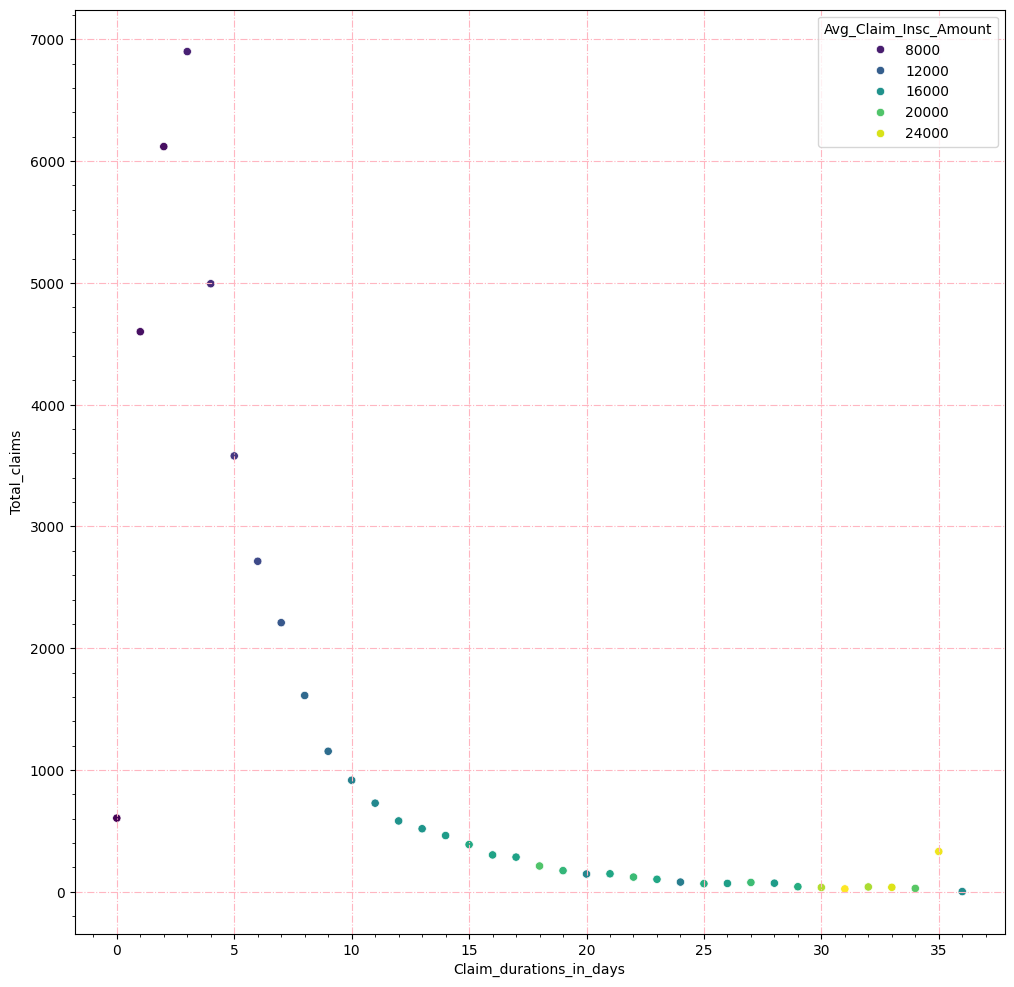

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Total_claims', hue='Avg_Claim_Insc_Amount', palette='viridis')
plt.grid(which='major', linestyle="-.", color='lightpink')
plt.minorticks_on()

Insights:
* The above graph tells us that the most number of claims are filed for 3 days. And, there are very less number of claims for duration greater than 15.
* And, there are around 600 claims for which the duration is 0 that means Claim Start Date and End Date is same.
* However, we can witness a litter spike for 35 days of duration for claims.

Text(0.5, 1.0, 'Treds of Avg Re-empbursement Amount for Different Claim Durations')

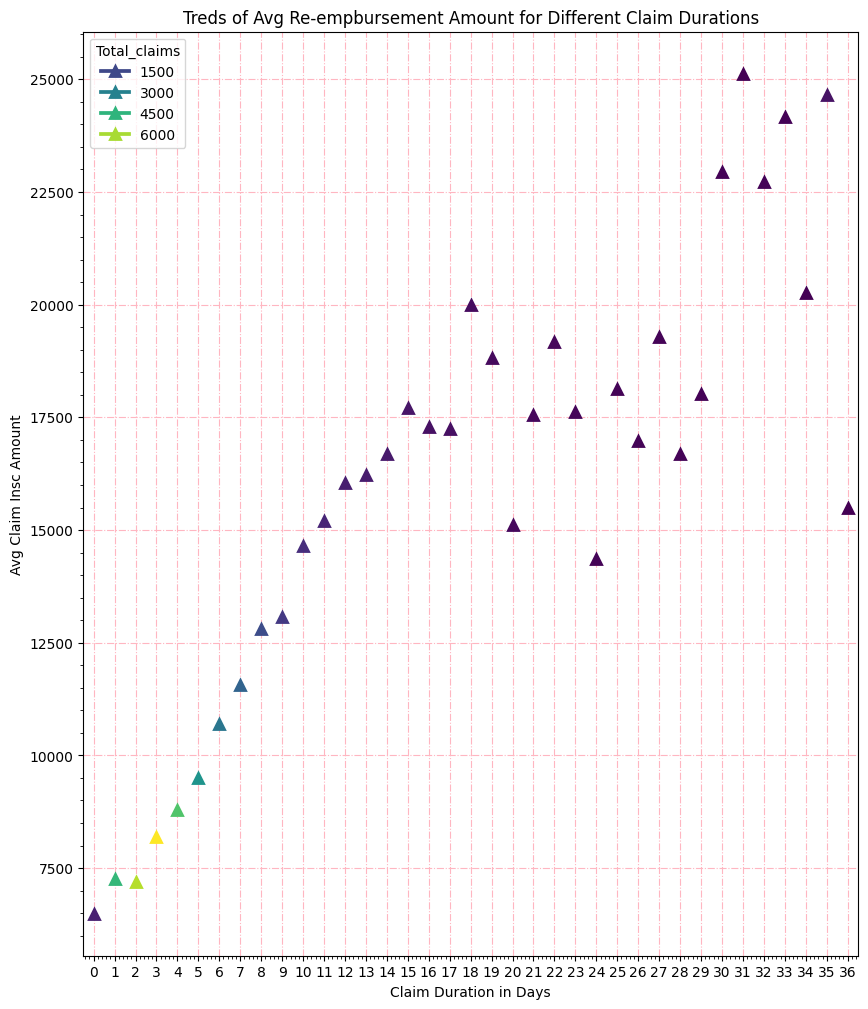

In [ ]:
plt.figure(figsize=(10,12))
sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', hue='Total_claims', palette='viridis', markers='^',linestyles='-')
plt.grid(which='major', linestyle="-.", color='lightpink')
plt.minorticks_on()
plt.xticks
plt.xlabel('Claim Duration in Days')
plt.ylabel('Avg Claim Insc Amount')
plt.title('Treds of Avg Re-empbursement Amount for Different Claim Durations')

**Q.** What is the relationship b/w Claimed and Admitted Durations with Re-imbursed Amount?

In [ ]:
# Convert to datetime first
df_train_inpatient['AdmissionDt'] = pd.to_datetime(df_train_inpatient['AdmissionDt'])
df_train_inpatient['DischargeDt'] = pd.to_datetime(df_train_inpatient['DischargeDt'])

# Now calculate the difference
df_train_inpatient['admitted_days'] = (df_train_inpatient['DischargeDt'] - df_train_inpatient['AdmissionDt']).dt.days

In [ ]:
claims_with_diff_admitted_and_claimed_dur = df_train_inpatient[~(df_train_inpatient['Claim_duration'] == df_train_inpatient['admitted_days'])]
claims_with_diff_admitted_and_claimed_dur

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
35      BENE11093  CLM82202   2009-01-03 2009-01-12  PRV51842   
2163    BENE18587  CLM37486   2009-02-10 2009-02-11  PRV52020   
3864    BENE24807  CLM82212   2008-12-31 2009-01-11  PRV54111   
4422    BENE26849  CLM70032   2009-10-02 2009-10-07  PRV56647   
5400    BENE30503  CLM67400   2009-09-12 2009-09-14  PRV54228   
5647    BENE31388  CLM40738   2009-03-07 2009-03-08  PRV51490   
5869    BENE32209  CLM58624   2009-07-10 2009-07-17  PRV51249   
7752    BENE39346  CLM82211   2009-02-18 2009-02-26  PRV54065   
7828    BENE39685  CLM47198   2009-04-20 2009-04-22  PRV53705   
7869    BENE39802  CLM73187   2009-11-01 2009-11-05  PRV52100   
9051    BENE44335  CLM76442   2009-11-26 2009-11-27  PRV56259   
9094    BENE44545  CLM82209   2009-01-18 2009-01-27  PRV52843   
9215    BENE45010  CLM32686   2009-01-11 2009-01-23  PRV56778   
9974    BENE47786  CLM82208   2009-05-27 2009-06-04  PRV52828   
11103   BENE51932  CLM44148   2009-03-28 2009-03-29  PRV51282   
11570   BENE53771  CLM75777   2009-11-14 2009-11-17  PRV52152   
12418   BENE56734  CLM59678   2009-07-16 2009-07-17  PRV54772   
12763   BENE58160  CLM41061   2009-03-18 2009-04-08  PRV51501   
13660   BENE61350  CLM67680   2009-09-13 2009-09-20  PRV52279   
13974   BENE62437  CLM65892   2009-08-31 2009-09-02  PRV53959   
16043   BENE69958  CLM64322   2009-08-19 2009-08-24  PRV56583   
17023   BENE73568  CLM31660   2009-01-16 2009-02-03  PRV52821   
17060   BENE73681  CLM82213   2009-02-10 2009-02-21  PRV54354   
17581   BENE75606  CLM31548   2009-01-26 2009-02-02  PRV57166   
18267   BENE78133  CLM82210   2009-01-02 2009-01-05  PRV53461   
18270   BENE78138  CLM72416   2009-10-21 2009-10-22  PRV52469   
21298   BENE88968  CLM82205   2009-02-23 2009-02-28  PRV52045   
22977   BENE95119  CLM64760   2009-08-22 2009-08-24  PRV54258   
24250  BENE100010  CLM47033   2009-04-24 2009-05-01  PRV55916   
25600  BENE104845  CLM36134   2009-02-26 2009-02-27  PRV53706   
26395  BENE107828  CLM82216   2009-01-01 2009-01-22  PRV55018   
27053  BENE110116  CLM82217   2009-02-09 2009-03-17  PRV56268   
27400  BENE111377  CLM36986   2009-02-15 2009-02-20  PRV52019   
27576  BENE112054  CLM45867   2009-04-07 2009-04-16  PRV51119   
28093  BENE114124  CLM52014   2009-05-22 2009-06-06  PRV57399   
28246  BENE114653  CLM44227   2009-04-21 2009-04-30  PRV56449   
28355  BENE115024  CLM75876   2009-11-17 2009-11-19  PRV51497   
28398  BENE115181  CLM42782   2009-03-18 2009-03-19  PRV53710   
28753  BENE116436  CLM82206   2008-12-26 2009-01-04  PRV52178   
29157  BENE117863  CLM39485   2009-03-02 2009-03-09  PRV52266   
29584  BENE119457  CLM82220   2009-02-20 2009-03-03  PRV57547   
29727  BENE119908  CLM82218   2009-01-03 2009-01-29  PRV57191   
31734  BENE127103  CLM60996   2009-08-19 2009-08-28  PRV53226   
32874  BENE131263  CLM82201   2009-01-17 2009-01-25  PRV51021   
34668  BENE138446  CLM82214   2009-01-08 2009-01-12  PRV54955   
35222  BENE140512  CLM76096   2009-11-19 2009-12-06  PRV56268   
39612  BENE156020  CLM82204   2008-12-01 2009-01-06  PRV52019   
39683  BENE156315  CLM46335   2009-04-10 2009-04-11  PRV51037   
39821  BENE156866  CLM82219   2009-01-21 2009-01-28  PRV57409   

       InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
35                      20000          PHY341192          PHY355416   
2163                     3000          PHY359519                NaN   
3864                    13000          PHY360669          PHY408812   
4422                    12000          PHY332134                NaN   
5400                     3000          PHY364179                NaN   
5647                    16000          PHY325912          PHY325912   
5869                     6000          PHY326642          PHY383790   
7752                    19000          PHY337531          PHY341176   
7828                      600          PHY416391          PHY356670   
7869                     3000          PHY366670  

In [ ]:
claims_with_diff_admitted_and_claimed_dur['InscClaimAmtReimbursed'].sum()

np.int64(671400)

Insights:
* The above table tells us that there are 49 claims whose Claimed Duration and Admitted Duration are different.

* And, for these 49 claims the total re-imbursed amount is around 0.67 Million. So, doesn't look like an issue here as the admitted days can be greater than claimed duration based upon the plan bought by the beneficiary.

In [ ]:
claims_with_diff_admitted_and_claimed_dur[claims_with_diff_admitted_and_claimed_dur['Claim_duration']  > \
                                          claims_with_diff_admitted_and_claimed_dur['admitted_days']]

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
35      BENE11093  CLM82202   2009-01-03 2009-01-12  PRV51842   
3864    BENE24807  CLM82212   2008-12-31 2009-01-11  PRV54111   
7752    BENE39346  CLM82211   2009-02-18 2009-02-26  PRV54065   
9094    BENE44545  CLM82209   2009-01-18 2009-01-27  PRV52843   
9974    BENE47786  CLM82208   2009-05-27 2009-06-04  PRV52828   
17060   BENE73681  CLM82213   2009-02-10 2009-02-21  PRV54354   
18267   BENE78133  CLM82210   2009-01-02 2009-01-05  PRV53461   
21298   BENE88968  CLM82205   2009-02-23 2009-02-28  PRV52045   
26395  BENE107828  CLM82216   2009-01-01 2009-01-22  PRV55018   
27053  BENE110116  CLM82217   2009-02-09 2009-03-17  PRV56268   
28753  BENE116436  CLM82206   2008-12-26 2009-01-04  PRV52178   
29584  BENE119457  CLM82220   2009-02-20 2009-03-03  PRV57547   
29727  BENE119908  CLM82218   2009-01-03 2009-01-29  PRV57191   
32874  BENE131263  CLM82201   2009-01-17 2009-01-25  PRV51021   
34668  BENE138446  CLM82214   2009-01-08 2009-01-12  PRV54955   
39612  BENE156020  CLM82204   2008-12-01 2009-01-06  PRV52019   
39821  BENE156866  CLM82219   2009-01-21 2009-01-28  PRV57409   

       InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
35                      20000          PHY341192          PHY355416   
3864                    13000          PHY360669          PHY408812   
7752                    19000          PHY337531          PHY341176   
9094                    14000          PHY365072                NaN   
9974                    14000          PHY391167                NaN   
17060                   11000          PHY397703                NaN   
18267                   20000          PHY331754          PHY426843   
21298                   24000          PHY339550          PHY359571   
26395                   19000          PHY364322          PHY320450   
27053                   20000          PHY400645          PHY408610   
28753                   14000          PHY329415          PHY393569   
29584                   16000          PHY327725                NaN   
29727                   16000          PHY329192          PHY346614   
32874                   12000          PHY424284                NaN   
34668                   11000          PHY352488          PHY352488   
39612                   11000          PHY393952          PHY348831   
39821                   20000          PHY415120          PHY423087   

      OtherPhysician AdmissionDt  ... ClmDiagnosisCode_10  ClmProcedureCode_1  \
35               NaN  2009-01-03  ...               42732              3950.0   
3864             NaN  2008-12-31  ...                 NaN              5369.0   
7752             NaN  2009-02-18  ...               27801              3712.0   
9094             NaN  2009-01-18  ...                 NaN                 NaN   
9974             NaN  2009-05-27  ...                 NaN                 NaN   
17060      PHY390453  2009-02-10  ...                 NaN                 NaN   
18267            NaN  2009-01-02  ...                 NaN               387.0   
21298            NaN  2009-02-23  ...                 NaN                54.0   
26395            NaN  2009-01-01  ...                 486              5123.0   
27053            NaN  2009-02-09  ...                 NaN              3950.0   
28753            NaN  2008-12-26  ...                 NaN              6561.0   
29584            NaN  2009-02-20  ...                 NaN                 NaN   
29727            NaN  2009-01-03  ...                 NaN              8622.0   
32874            NaN  2009-01-17  ...                 NaN                 NaN   
34668            NaN  2009-01-08  ...                 NaN              8154.0   
39612      PHY416093  2008-12-01  ...                 NaN              7868.0   
39821            NaN  2009-01-21  ...                 NaN               540.0   

      ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4  \
35                2762.0            

In [ ]:
claims_with_diff_admitted_and_claimed_dur[claims_with_diff_admitted_and_claimed_dur['Claim_duration']  > \
                                          claims_with_diff_admitted_and_claimed_dur['admitted_days']]['InscClaimAmtReimbursed'].sum()

np.int64(274000)

Insights:
* The above table tells us that 17 claims out of 49 have Claimed Duration greater than the Admitted Duration.

Finding relationship b/w DeductibleAmtPaid and Re-imbursed Amount?

In [ ]:
no_of_claim_with_no_copay = df_train_inpatient[df_train_inpatient['DeductibleAmtPaid'].isna()].shape[0]
no_of_claim_with_no_copay

899

In [ ]:
no_of_claim_with_copay = df_train_inpatient[~df_train_inpatient['DeductibleAmtPaid'].isna()].shape[0]
no_of_claim_with_copay

39575

In [ ]:
percent_of_no_copay_claims = round((no_of_claim_with_no_copay / (no_of_claim_with_copay + no_of_claim_with_no_copay)) * 100,1)
print("### Percentage of claims with no co-payment or deductible --> {}% ###".format(percent_of_no_copay_claims))

### Percentage of claims with no co-payment or deductible --> 2.2% ###


In [ ]:
re_imbursed_amt_for_no_copay = df_train_inpatient[df_train_inpatient['DeductibleAmtPaid'].isna()]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_for_no_copay

np.int64(10690000)

In [ ]:
re_imbursed_amt_with_some_copay = df_train_inpatient[~df_train_inpatient['DeductibleAmtPaid'].isna()]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_with_some_copay

np.int64(397607020)

In [ ]:
# Here, updating the NULL values of DeductibleAmtPaid feature as 0
df_train_inpatient['DeductibleAmtPaid'].fillna(value=0.0, inplace=True)

/tmp/ipython-input-807409133.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_inpatient['DeductibleAmtPaid'].fillna(value=0.0, inplace=True)


 Find the relationship of Providers with Total number of claims filed & Re-imbursed Amount?

In [ ]:
Uniqu_provider=df_train_inpatient['Provider'].unique()
len(Uniqu_provider)

2092

In [ ]:
provider_tot_claims_filed = pd.DataFrame(df_train_inpatient.groupby(['Provider'])['ClaimID'].count())
provider_tot_reimbursed_amt = pd.DataFrame(df_train_inpatient.groupby(['Provider'])['InscClaimAmtReimbursed'].sum())

In [ ]:
prv_tot_filed_claims_and_tot_reimb_amt = pd.merge(left=provider_tot_claims_filed, right=provider_tot_reimbursed_amt, how='inner',
                                                  left_on=provider_tot_claims_filed.index, right_on=provider_tot_reimbursed_amt.index)

In [ ]:
provider_tot_claims_filed = pd.DataFrame(df_train_inpatient.groupby(['Provider'])['ClaimID'].count())
provider_tot_reimbursed_amt = pd.DataFrame(df_train_inpatient.groupby(['Provider'])['InscClaimAmtReimbursed'].sum())

prv_tot_filed_claims_and_tot_reimb_amt = pd.merge(left=provider_tot_claims_filed, right=provider_tot_reimbursed_amt, how='inner',
                                                  left_on=provider_tot_claims_filed.index, right_on=provider_tot_reimbursed_amt.index)

prv_tot_filed_claims_and_tot_reimb_amt.columns = ['ProviderID', 'Tot_Claims_Filed', 'Tot_Re_Imbursed_Amt']
prv_tot_filed_claims_and_tot_reimb_amt.reset_index(drop=True,inplace=True)
prv_tot_filed_claims_and_tot_reimb_amt['Percentage_out_of_tot_reimb_amt'] = round((prv_tot_filed_claims_and_tot_reimb_amt['Tot_Re_Imbursed_Amt'] / df_train_inpatient['InscClaimAmtReimbursed'].sum()) * 100, 3)

In [ ]:
provider_max_reimbursed_amt = pd.DataFrame(df_train_inpatient.groupby(['Provider'])['InscClaimAmtReimbursed'].max())
provider_max_reimbursed_amt.rename(columns={"InscClaimAmtReimbursed": "Max_Re_Imbursed_Amt"}, inplace=True)

In [ ]:

prv_tot_filed_claims_tot_max_reimb_amt = pd.merge(left=prv_tot_filed_claims_and_tot_reimb_amt,
                                                  right=provider_max_reimbursed_amt, how='inner',
                                                  left_on=prv_tot_filed_claims_and_tot_reimb_amt['ProviderID'],
                                                  right_on=provider_max_reimbursed_amt.index)

In [ ]:

prv_tot_filed_claims_tot_max_reimb_amt.drop(['key_0'], axis=1, inplace=True)
prv_tot_filed_claims_tot_max_reimb_amt['Diff_in_Tot_and_Max'] = prv_tot_filed_claims_tot_max_reimb_amt['Tot_Re_Imbursed_Amt'] - \
prv_tot_filed_claims_tot_max_reimb_amt['Max_Re_Imbursed_Amt']

prv_tot_filed_claims_tot_max_reimb_amt.head()

ProviderID  Tot_Claims_Filed  Tot_Re_Imbursed_Amt  \
0   PRV51001                 5                97000   
1   PRV51003                62               573000   
2   PRV51007                 3                19000   
3   PRV51008                 2                25000   
4   PRV51011                 1                 5000   

   Percentage_out_of_tot_reimb_amt  Max_Re_Imbursed_Amt  Diff_in_Tot_and_Max  
0                            0.024                42000                55000  
1                            0.140                57000               516000  
2                            0.005                10000                 9000  
3                            0.006                21000                 4000  
4                            0.001                 5000                    0

In [ ]:
prv_tot_filed_claims_tot_max_reimb_amt.sort_values(by=['Diff_in_Tot_and_Max','Max_Re_Imbursed_Amt','Percentage_out_of_tot_reimb_amt'],
                                                   axis=0, inplace=True,
                                                   ascending=[True, False, False])

In [ ]:
prv_tot_filed_claims_tot_max_reimb_amt.head(60)

ProviderID  Tot_Claims_Filed  Tot_Re_Imbursed_Amt  \
574    PRV52518                 1                57000   
578    PRV52537                 1                57000   
1767   PRV56664                 1                57000   
1883   PRV57080                 1                57000   
2012   PRV57399                 1                57000   
1970   PRV57290                 2                55000   
305    PRV51681                 1                51000   
637    PRV52804                 1                36000   
286    PRV51626                 1                35000   
11     PRV51035                 1                29000   
1294   PRV55067                 1                29000   
2047   PRV57545                 1                28000   
548    PRV52458                 1                27000   
84     PRV51232                 1                26000   
1805   PRV56750                 1                25000   
293    PRV51635                 1                24000   
98     PRV51248                 1                23000   
902    PRV53757                 1                23000   
1652   PRV56286                 1                23000   
73     PRV51166                 1                22000   
369    PRV51947                 1                22000   
837    PRV53431                 1                21000   
56     PRV51136                 1                20000   
1763   PRV56658                 1                20000   
89     PRV51237                 1                19000   
854    PRV53471                 1                19000   
417    PRV52088                 1                18000   
1661   PRV56341                 1                18000   
822    PRV53398                 1                17000   
663    PRV52850                 1                16000   
836    PRV53429                 1                16000   
1127   PRV54590                 1                16000   
256    PRV51583                 2                15000   
735    PRV53110                 1                15000   
817    PRV53389                 1                15000   
858    PRV53509                 1                15000   
1905   PRV57110                 1                15000   
272    PRV51607                 1                14000   
460    PRV52162                 1                14000   
577    PRV52536                 1                14000   
797    PRV53305                 1                14000   
830    PRV53416                 1                14000   
862    PRV53515                 1                14000   
1468   PRV55688                 1                14000   
313    PRV51806                 1                13000   
655    PRV52841                 1                13000   
686    PRV52912                 1                13000   
964    PRV53989                 1                13000   
1009   PRV54155                 1                13000   
1089   PRV54414                 1                13000   
1200   PRV54830                 1                13000   
1216   PRV54883                 1                13000   
1256   PRV54963                 1                13000   
1329   PRV55163                 1                13000   
1650   PRV56276                 1                13000   
88     PRV51236                 1                12000   
166    PRV51404                 1                12000   
255    PRV51582                 1                12000   
1098   PRV54498                 1                12000   
1195   PRV54820                 1                12000   

      Percentage_out_of_tot_reimb_amt  Max_Re_Imbursed_Amt  \
574                             0.014                57000   
578                             0.014                57000   
1767                            0.014                57000   
1883                            0.014                57000   
2012                            0.014                57000   
1970                            0.013                55000   
305                             

# Critical point:
* The above table showing us the Provider Ids who only filed 1 or 2 claims and got the entire amount re-imbursed.
This, can be a potential sign of fraudulent because many small-small hospitals in rural area who don't have much facilities or equipments made fraud for benefits. Similar recently happened : refer here https://www.justice.gov/opa/pr/two-individuals-convicted-14-billion-health-care-fraud-scheme-involving-rural-hospitals


In [ ]:
tot_re_imb_amt_for_prv_with_5orless_claims = prv_tot_filed_claims_tot_max_reimb_amt[prv_tot_filed_claims_tot_max_reimb_amt['Tot_Claims_Filed'] < 5] \
                                            ['Tot_Re_Imbursed_Amt'].sum()

pp_re_imb_amt_for_prv_with_5orless_claims = round((tot_re_imb_amt_for_prv_with_5orless_claims / df_train_inpatient['InscClaimAmtReimbursed'].sum()) * 100,2)
print("### Total Re-imbursed Amount for Providers with less than 5 filed claims is --> {} (17 Million). ###\n\
### And, this is {}% of Total Re-imbursed Claim Amount (408 Million). ###".format(tot_re_imb_amt_for_prv_with_5orless_claims,
                                                                    pp_re_imb_amt_for_prv_with_5orless_claims))

### Total Re-imbursed Amount for Providers with less than 5 filed claims is --> 17012550 (17 Million). ###
### And, this is 4.17% of Total Re-imbursed Claim Amount (408 Million). ###


OUT Patients DATA

In [ ]:
df_train_outpatient.shape

(517737, 27)

In [ ]:
df_train_outpatient.isnull().sum()/df_train_outpatient.shape[0]*100

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.637345
dtype: float64

Insight:
* From the above plot, we can say that the majority of the ProcedureCodes are having NULLS.

* ClmDiagnosisCode_9 & ClmDiagnosisCode_10 are very rare among Patients.

In [ ]:
df_train_outpatient['Admitted?'] = 0

Added claims_ clearance days

In [ ]:
df_train_outpatient['ClaimStartDt']=pd.to_datetime(df_train_outpatient['ClaimStartDt'], format='%Y-%m-%d')
df_train_outpatient['ClaimEndDt']=pd.to_datetime(df_train_outpatient['ClaimEndDt'], format='%Y-%m-%d')

In [ ]:
df_train_outpatient['Claim_duration']=(df_train_outpatient['ClaimEndDt'] - df_train_outpatient['ClaimStartDt']).dt.days

In [ ]:
df_train_outpatient['Claim_duration'].describe()

count    517737.000000
mean          1.420532
std           4.707387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: Claim_duration, dtype: float64

Insights:
* From the above plot, we can decude that the majority of the claims filed for less than or equals to 2 days.

Percentile values

In [ ]:
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(df_train_outpatient["Claim_duration"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 0.0
Percentile --> 20.0 and its value is --> 0.0
Percentile --> 25.0 and its value is --> 0.0
Percentile --> 30.0 and its value is --> 0.0
Percentile --> 40.0 and its value is --> 0.0
Percentile --> 50.0 and its value is --> 0.0
Percentile --> 60.0 and its value is --> 0.0
Percentile --> 70.0 and its value is --> 0.0
Percentile --> 75.0 and its value is --> 0.0
Percentile --> 80.0 and its value is --> 0.0
Percentile --> 90.0 and its value is --> 2.0
Percentile --> 91.0 and its value is --> 3.0
Percentile --> 92.0 and its value is --> 6.0
Percentile --> 93.0 and its value is --> 9.0
Percentile --> 94.0 and its value is --> 14.0
Percentile --> 95.0 and its value is --> 17.0
Percentile --> 96.0 and its value is --> 20.0
Percentile --> 97.0 and its value is --> 20.0
Percentile --> 98.0 and its value is --> 20.0
Percentile --> 99.0 and its value is --> 20.0
Percentile --> 99.9 and its value is --> 20.0
Percentile --> 99.99 and its value is --> 20.0
P

Insight:
* From the results, we can say that 90% of the claims are filed for 2 days.


Finding the relationship b/w Claim Duration and Re-imbursed Amount?

/tmp/ipython-input-2485442273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_train_outpatient['Claim_duration'], y=df_train_outpatient['InscClaimAmtReimbursed'], palette='plasma')


Text(0.5, 1.0, 'Various reimbursement amounts for diff claims duration')

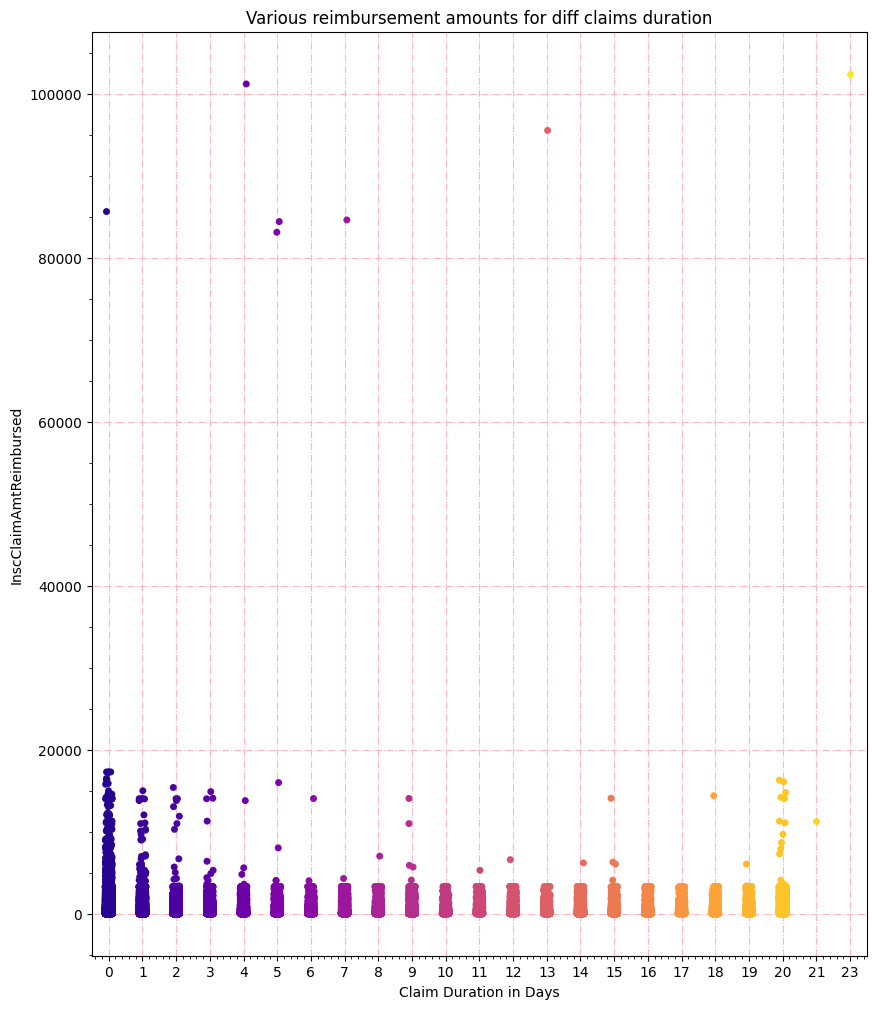

In [ ]:
plt.figure(figsize=(10,12))
sns.stripplot(x=df_train_outpatient['Claim_duration'], y=df_train_outpatient['InscClaimAmtReimbursed'], palette='plasma')
plt.grid(which='major', linestyle="-.", color='lightpink')
plt.minorticks_on()
plt.xlabel('Claim Duration in Days')
plt.ylabel('InscClaimAmtReimbursed')
plt.title('Various reimbursement amounts for diff claims duration')

insights:
* From the above plot, we can decude that the majority of the claims filed have re-imbursed amount less than 20,000. And, very few have more than 1,00,000.

In [ ]:
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(df_train_outpatient["InscClaimAmtReimbursed"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 10.0
Percentile --> 20.0 and its value is --> 30.0
Percentile --> 25.0 and its value is --> 40.0
Percentile --> 30.0 and its value is --> 40.0
Percentile --> 40.0 and its value is --> 60.0
Percentile --> 50.0 and its value is --> 80.0
Percentile --> 60.0 and its value is --> 100.0
Percentile --> 70.0 and its value is --> 200.0
Percentile --> 75.0 and its value is --> 200.0
Percentile --> 80.0 and its value is --> 300.0
Percentile --> 90.0 and its value is --> 700.0
Percentile --> 91.0 and its value is --> 800.0
Percentile --> 92.0 and its value is --> 900.0
Percentile --> 93.0 and its value is --> 1000.0
Percentile --> 94.0 and its value is --> 1200.0
Percentile --> 95.0 and its value is --> 1500.0
Percentile --> 96.0 and its value is --> 1800.0
Percentile --> 97.0 and its value is --> 2100.0
Percentile --> 98.0 and its value is --> 2500.0
Percentile --> 99.0 and its value is --> 3300.0
Percentile --> 99.9 and its value is --> 3500.0
Percentile 

Insights:
* 99.9% claims have and its value is --> 3500.0

Finding the relationship b/w Claim Duration and Co-Payment?

/tmp/ipython-input-131316619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_train_outpatient['Claim_duration'], y=df_train_outpatient['DeductibleAmtPaid'], palette='plasma')


Text(0.5, 1.0, 'Various Deductible amounts for diff claims duration')

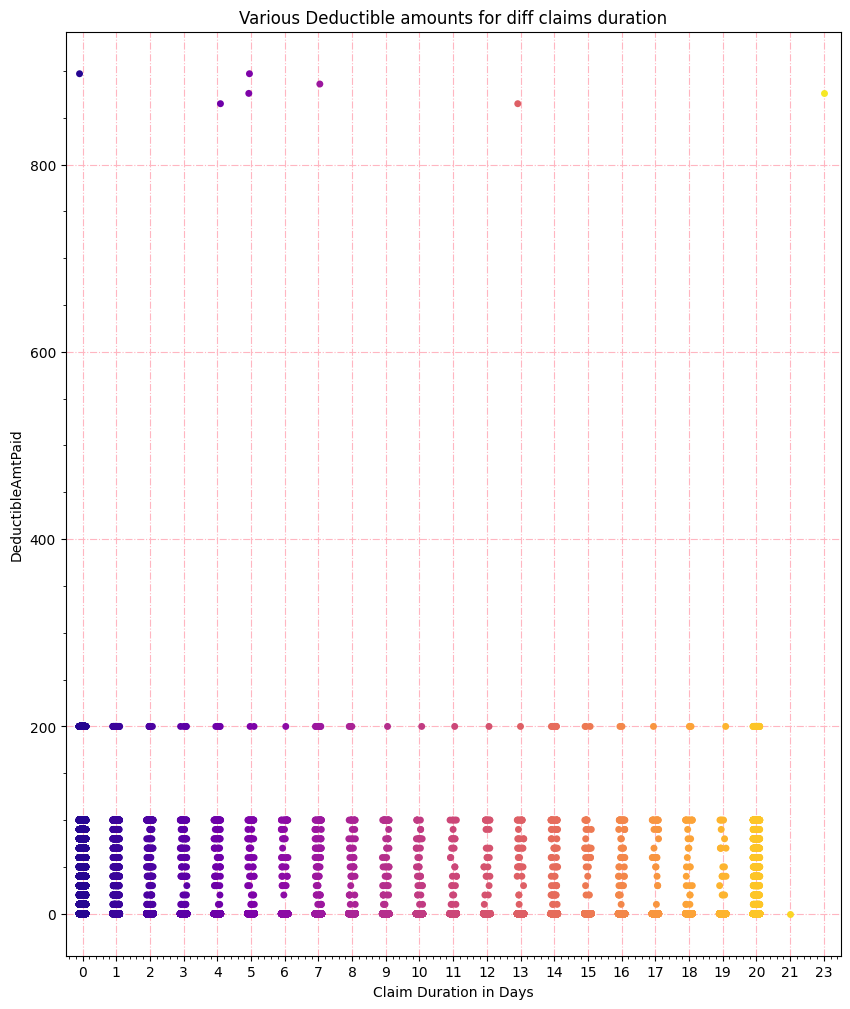

In [ ]:
plt.figure(figsize=(10,12))
sns.stripplot(x=df_train_outpatient['Claim_duration'], y=df_train_outpatient['DeductibleAmtPaid'], palette='plasma')
plt.grid(which='major', linestyle="-.", color='lightpink')
plt.minorticks_on()
plt.xlabel('Claim Duration in Days')
plt.ylabel('DeductibleAmtPaid')
plt.title('Various Deductible amounts for diff claims duration')
#

Insights:
* From the above plot, we can decude that the trend of co-payment is similar across the various durations, however, there are few co-payment which are very high or more than 800.

In [ ]:
df_train_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Admitted?', 'Claim_duration'],
      dtype='object')

In [ ]:
tot_claims_filed_for_specific_days = pd.DataFrame(df_train_outpatient.groupby(['Claim_duration'])['ClaimID'].count())
tot_claims_filed_for_specific_days

ClaimID
Claim_duration         
0                453348
1                 11960
2                  4366
3                  2597
4                  2238
5                  1511
6                  1306
7                  2564
8                  1189
9                  1378
10                  982
11                  953
12                  903
13                  947
14                 2735
15                  975
16                 1136
17                  808
18                  800
19                  727
20                24312
21                    1
23                    1

In [ ]:
tot_insc_amount_for_claim_durations = pd.DataFrame(df_train_outpatient.groupby(['Claim_duration'])['InscClaimAmtReimbursed'].sum())
tot_insc_amount_for_claim_durations

InscClaimAmtReimbursed
Claim_duration                        
0                            105624910
1                              5381060
2                              2227230
3                              1272800
4                              1270910
5                               976870
6                               571400
7                              1280020
8                               463190
9                               686930
10                              385090
11                              475220
12                              518670
13                              436950
14                             1183090
15                              370550
16                              558680
17                              299910
18                              426380
19                              357230
20                            23365230
21                               11300
23                              102500

In [ ]:
claim_clearance_amts = pd.merge(left=tot_claims_filed_for_specific_days, right=tot_insc_amount_for_claim_durations,
                                how='inner',
                                left_on=tot_claims_filed_for_specific_days.index,
                                right_on=tot_insc_amount_for_claim_durations.index)

claim_clearance_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']
claim_clearance_amts.head()

Claim_durations_in_days  Total_claims  All_Claims_Total_Amount
0                        0        453348                105624910
1                        1         11960                  5381060
2                        2          4366                  2227230
3                        3          2597                  1272800
4                        4          2238                  1270910

In [ ]:
claim_clearance_amts['Avg_Claim_Insc_Amount'] = np.round(claim_clearance_amts['All_Claims_Total_Amount']/claim_clearance_amts['Total_claims'],2)

In [ ]:
claim_clearance_amts.head()

Claim_durations_in_days  Total_claims  All_Claims_Total_Amount  \
0                        0        453348                105624910   
1                        1         11960                  5381060   
2                        2          4366                  2227230   
3                        3          2597                  1272800   
4                        4          2238                  1270910   

   Avg_Claim_Insc_Amount  
0                 232.99  
1                 449.92  
2                 510.13  
3                 490.10  
4                 567.88

Finding the relationship b/w DeductibleAmtPaid and Re-imbursed Amount?

In [ ]:
no_of_claim_with_no_copay = df_train_outpatient[df_train_outpatient['DeductibleAmtPaid'] == 0].shape[0]
no_of_claim_with_no_copay

496701

In [ ]:
no_of_claim_with_copay = df_train_outpatient[df_train_outpatient['DeductibleAmtPaid'] != 0].shape[0]
no_of_claim_with_copay

21036

In [ ]:
percent_of_no_copay_claims = round((no_of_claim_with_no_copay / (no_of_claim_with_copay + no_of_claim_with_no_copay)) * 100,1)
print("### Percentage of claims with no co-payment or deductible --> {}% ###".format(percent_of_no_copay_claims))

### Percentage of claims with no co-payment or deductible --> 95.9% ###


In [ ]:
re_imbursed_amt_for_no_copay = df_train_outpatient[df_train_outpatient['DeductibleAmtPaid'] == 0]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_for_no_copay

np.int64(142391850)

In [ ]:
re_imbursed_amt_with_some_copay = df_train_outpatient[df_train_outpatient['DeductibleAmtPaid'] != 0]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_with_some_copay

np.int64(5854270)

In [ ]:
tot_sum_of_claims_with_copay = re_imbursed_amt_with_some_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)
tot_sum_of_claims_with_no_copay = re_imbursed_amt_for_no_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)

In [ ]:
percent_of_tot_sum_no_copay_claims_amt = round(tot_sum_of_claims_with_no_copay * 100,1)
print("### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> {}% ###".\
      format(percent_of_tot_sum_no_copay_claims_amt))

### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> 96.1% ###


Insights:
What is the relationship of Providers with Total number of claims filed & Re-imbursed Amount?

Finding the relationship of Providers with Total number of claims filed & Re-imbursed Amount?

In [ ]:
no_of_claim_with_no_copay = df_train_outpatient[df_train_outpatient['DeductibleAmtPaid'] == 0].shape[0]
no_of_claim_with_no_copay

496701

In [ ]:
no_of_claim_with_copay = df_train_outpatient[df_train_outpatient['DeductibleAmtPaid'] != 0].shape[0]
no_of_claim_with_copay

21036

In [ ]:
percent_of_no_copay_claims = round((no_of_claim_with_no_copay / (no_of_claim_with_copay + no_of_claim_with_no_copay)) * 100,1)
print("### Percentage of claims with no co-payment or deductible --> {}% ###".format(percent_of_no_copay_claims))

### Percentage of claims with no co-payment or deductible --> 95.9% ###


In [ ]:
re_imbursed_amt_for_no_copay = df_train_outpatient[df_train_outpatient['DeductibleAmtPaid'] == 0]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_for_no_copay

np.int64(142391850)

In [ ]:
re_imbursed_amt_with_some_copay = df_train_outpatient[df_train_outpatient['DeductibleAmtPaid'] != 0]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_with_some_copay

np.int64(5854270)

In [ ]:
tot_sum_of_claims_with_copay = re_imbursed_amt_with_some_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)
tot_sum_of_claims_with_no_copay = re_imbursed_amt_for_no_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)

In [ ]:
percent_of_tot_sum_no_copay_claims_amt = round(tot_sum_of_claims_with_no_copay * 100,1)
print("### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> {}% ###".\
      format(percent_of_tot_sum_no_copay_claims_amt))

### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> 96.1% ###


Finding the relationship of Providers with Total number of claims filed & Re-imbursed Amount?

In [ ]:
# How many unique providers are there in the dataset?
print("We have {} unique number of Providers in the in-patient dataset.".format(df_train_outpatient['Provider'].nunique()))

We have 5012 unique number of Providers in the in-patient dataset.


In [ ]:
prv_tot_filed_claims_tot_max_reimb_amt.sort_values(by=['Diff_in_Tot_and_Max','Max_Re_Imbursed_Amt','Percentage_out_of_tot_reimb_amt'],
                                                   axis=0, inplace=True,
                                                   ascending=[True, False, False])

In [ ]:
prv_tot_filed_claims_tot_max_reimb_amt.head(60)


ProviderID  Tot_Claims_Filed  Tot_Re_Imbursed_Amt  \
574    PRV52518                 1                57000   
578    PRV52537                 1                57000   
1767   PRV56664                 1                57000   
1883   PRV57080                 1                57000   
2012   PRV57399                 1                57000   
1970   PRV57290                 2                55000   
305    PRV51681                 1                51000   
637    PRV52804                 1                36000   
286    PRV51626                 1                35000   
11     PRV51035                 1                29000   
1294   PRV55067                 1                29000   
2047   PRV57545                 1                28000   
548    PRV52458                 1                27000   
84     PRV51232                 1                26000   
1805   PRV56750                 1                25000   
293    PRV51635                 1                24000   
98     PRV51248                 1                23000   
902    PRV53757                 1                23000   
1652   PRV56286                 1                23000   
73     PRV51166                 1                22000   
369    PRV51947                 1                22000   
837    PRV53431                 1                21000   
56     PRV51136                 1                20000   
1763   PRV56658                 1                20000   
89     PRV51237                 1                19000   
854    PRV53471                 1                19000   
417    PRV52088                 1                18000   
1661   PRV56341                 1                18000   
822    PRV53398                 1                17000   
663    PRV52850                 1                16000   
836    PRV53429                 1                16000   
1127   PRV54590                 1                16000   
256    PRV51583                 2                15000   
735    PRV53110                 1                15000   
817    PRV53389                 1                15000   
858    PRV53509                 1                15000   
1905   PRV57110                 1                15000   
272    PRV51607                 1                14000   
460    PRV52162                 1                14000   
577    PRV52536                 1                14000   
797    PRV53305                 1                14000   
830    PRV53416                 1                14000   
862    PRV53515                 1                14000   
1468   PRV55688                 1                14000   
313    PRV51806                 1                13000   
655    PRV52841                 1                13000   
686    PRV52912                 1                13000   
964    PRV53989                 1                13000   
1009   PRV54155                 1                13000   
1089   PRV54414                 1                13000   
1200   PRV54830                 1                13000   
1216   PRV54883                 1                13000   
1256   PRV54963                 1                13000   
1329   PRV55163                 1                13000   
1650   PRV56276                 1                13000   
88     PRV51236                 1                12000   
166    PRV51404                 1                12000   
255    PRV51582                 1                12000   
1098   PRV54498                 1                12000   
1195   PRV54820                 1                12000   

      Percentage_out_of_tot_reimb_amt  Max_Re_Imbursed_Amt  \
574                             0.014                57000   
578                             0.014                57000   
1767                            0.014                57000   
1883                            0.014                57000   
2012                            0.014                57000   
1970                            0.013                55000   
305                             

Insights:
* The above table showing us the Provider Ids who only filed 1 or 2 claims and got the entire amount re-imbursed.
This, can be a potential sign of fraudulent because many small-small hospitals in rural area who don't have much facilities or equipments made fraud for benefits. Similar recently happened : refer here https://www.justice.gov/opa/pr/two-individuals-convicted-14-billion-health-care-fraud-scheme-involving-rural-hospitals

EDA od Target Label data

In [ ]:
df_train.head()

Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

In [ ]:
df_train['PotentialFraud'].value_counts()/df_train.shape[0]*100

PotentialFraud
No     90.64695
Yes     9.35305
Name: count, dtype: float64

From the above plot, we can say that 90% of the providers are not frausters and only 9% of them are involved in frauds.

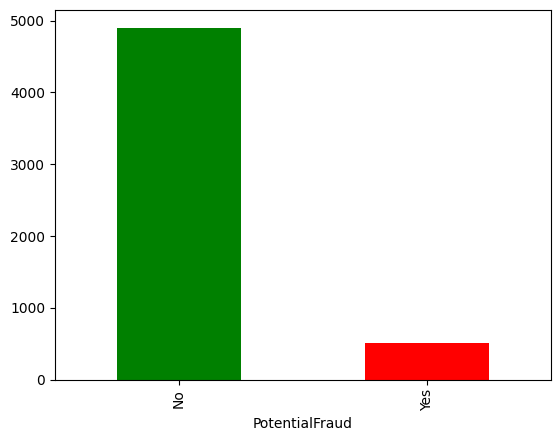

In [ ]:
fig=df_train['PotentialFraud'].value_counts().plot(kind='bar', color=['green','red'])

In [ ]:
df_train_inpatient.head()

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12 2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31 2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17 2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14 2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13 2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_10  ClmProcedureCode_1  \
0            NaN  2009-04-12  ...                 NaN                 NaN   
1            NaN  2009-08-31  ...                 NaN              7092.0   
2      PHY324689  2009-09-17  ...                 NaN                 NaN   
3      PHY349768  2009-02-14  ...                 NaN               331.0   
4            NaN  2009-08-13  ...                 NaN              3893.0   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6 Admitted? Claim_duration admitted_days  
0                NaN         1              6             6  
1                NaN         1              2             2  
2                NaN         1              3             3  
3                NaN         1              8             8  
4                NaN         1             17            17  

[5 rows x 33 columns]

In [ ]:
df_train_outpatient.head()

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11 2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12 2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27 2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06 2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22 2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmProcedureCode_1  \
0            NaN              78943  ...                NaN   
1            NaN               6115  ...                NaN   
2            NaN               2723  ...                NaN   
3            NaN              71988  ...                NaN   
4            NaN              82382  ...                NaN   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6 DeductibleAmtPaid ClmAdmitDiagnosisCode Admitted?  \
0                NaN                 0                 56409         0   
1                NaN                 0                 79380         0   
2                NaN                 0                   NaN         0   
3                NaN                 0                   NaN         0   
4                NaN                 0                 71947         0   

   Claim_duration  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 29 columns]

Common columns between in and Out patients

In [ ]:
comon_columns=df_train_inpatient.columns.intersection(df_train_outpatient.columns)
len(comon_columns)

29

In [ ]:
common_columns=list(comon_columns)
common_columns

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'Admitted?',
 'Claim_duration']

In [ ]:
# Merging the IP and OP datasets on the basis of common columns
train_ip_op_df = pd.merge(left=df_train_inpatient,
                          right=df_train_outpatient,
                          on=common_columns,
                          how='outer')
train_ip_op_df.shape

(558211, 33)

In [ ]:
train_ip_op_df.head()

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE100000  CLM126832   2009-01-08 2009-01-08  PRV57172   
1  BENE100000  CLM351838   2009-05-10 2009-05-10  PRV57172   
2  BENE100001  CLM229075   2009-03-05 2009-03-05  PRV55158   
3  BENE100001  CLM258631   2009-03-21 2009-03-21  PRV54966   
4  BENE100001  CLM332544   2009-04-30 2009-05-02  PRV54890   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      50          PHY383401                NaN   
1                      70          PHY370909                NaN   
2                      70          PHY383478                NaN   
3                      70          PHY347511                NaN   
4                      90          PHY343317          PHY408367   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_10  ClmProcedureCode_1  \
0            NaN         NaT  ...                 NaN                 NaN   
1      PHY363377         NaT  ...                 NaN                 NaN   
2            NaN         NaT  ...                 NaN                 NaN   
3            NaN         NaT  ...                 NaN                 NaN   
4      PHY408367         NaT  ...                 NaN                 NaN   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6 Admitted? Claim_duration admitted_days  
0                NaN         0              0           NaN  
1                NaN         0              0           NaN  
2                NaN         0              0           NaN  
3                NaN         0              0           NaN  
4                NaN         0              2           NaN  

[5 rows x 33 columns]

Merging IP-OP data sets with BENE date

In [ ]:
# joing data IP-OP datasets
train_ip_op_bene_df = pd.merge(left=train_ip_op_df,
                               right=df_train_bin,
                               on='BeneID',
                               how='inner')
train_ip_op_bene_df.shape

(558211, 59)

# Merging IP_OP_BENE data with target data (provider level)

In [ ]:
train_iobp_df = pd.merge(left=train_ip_op_bene_df,
                         right=df_train,
                         on='Provider',
                         how='inner')
train_iobp_df.shape

(558211, 60)

In [ ]:
#unique claim numbers
train_iobp_df['ClaimID'].nunique()

558211

Assumption:
* One provider may have been involved in more than one claim. So, does all the claims filed by a potentially fraud provider are all frauds?

- This cannot holds True for all the providers because if one provider has filed say 50 claims then we can't say that all the claims for that provider are fraudulent.
    - There may exists a pattern that out of 50 claims a provider files 1 or 2 fraudulent claims.


In [ ]:
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=df_train, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

Provider  ClaimID PotentialFraud
0     PRV51001       25             No
1     PRV51003      132            Yes
2     PRV51004      149             No
3     PRV51005     1165            Yes
4     PRV51007       72             No
...        ...      ...            ...
5405  PRV57759       28             No
5406  PRV57760       22             No
5407  PRV57761       82             No
5408  PRV57762        1             No
5409  PRV57763      118             No

[5410 rows x 3 columns]

* As shown in the above table PRV51005 has file 865 claims so after joining the data all these be marked as fraud.

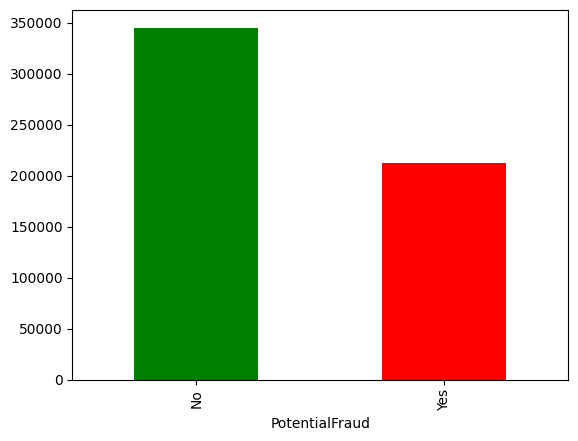

In [ ]:
fig=train_iobp_df['PotentialFraud'].value_counts().plot(kind='bar', color=['green','red'])


Insights:
* The above plot shows us that, 62% of claims are Non-Fraud and 32% of them are Fraudulent.
By looking at the percentages we may say that there is a class-imbalance problem but after looking at the number of records it doesn't seem to be a severe class-imbalance problem.
So, I'll try some class balancing techniques only after training a baseline model w/o any synthetic or class weighting techniques.

#Feature Engineering

adding new feature: Is_alive?
* Is Alive? = No if DOD in NaN else Yes

In [ ]:
train_iobp_df['DOB'] = pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d", errors='raise')


In [ ]:
train_iobp_df.Dead_or_Alive.value_counts()

Dead_or_Alive
1    554080
0      4131
Name: count, dtype: int64

In [ ]:
train_iobp_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Admitted?', 'Claim_duration', 'admitted_days',
       'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Dia

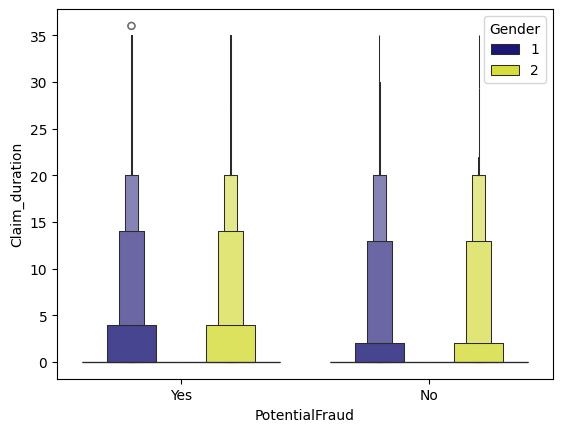

In [ ]:
fig= sns.boxenplot(data=train_iobp_df, x='PotentialFraud', y='Claim_duration', hue='Gender', palette='plasma')

Insights:
* There is no imbalance on gender in Potential fraud

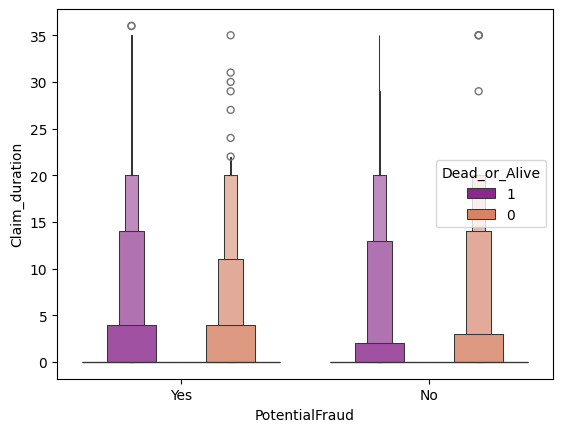

In [ ]:
fig=sns.boxenplot(data=train_iobp_df, x='PotentialFraud', y='Claim_duration', hue='Dead_or_Alive', palette='plasma')

Insights:
* The above plot cleaarly indicate that there is not relation b/w  beneficireas alive/dead in PotentialFraud.
* Other hand claim_duaration might not usefull in featuring being fraud case.

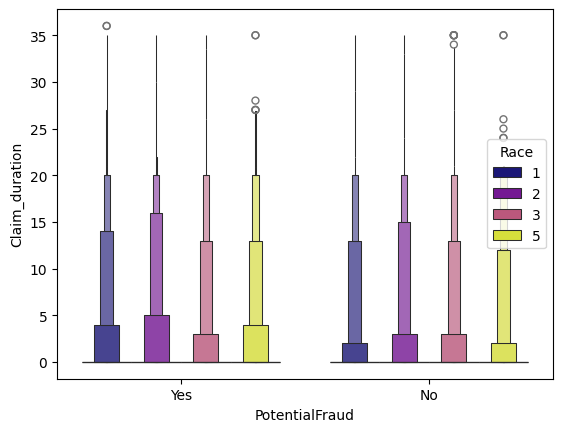

In [ ]:
fig=sns.boxenplot(data=train_iobp_df, x='PotentialFraud', y='Claim_duration', hue='Race', palette='plasma')

Insight
* There is no relation on fraud and human race

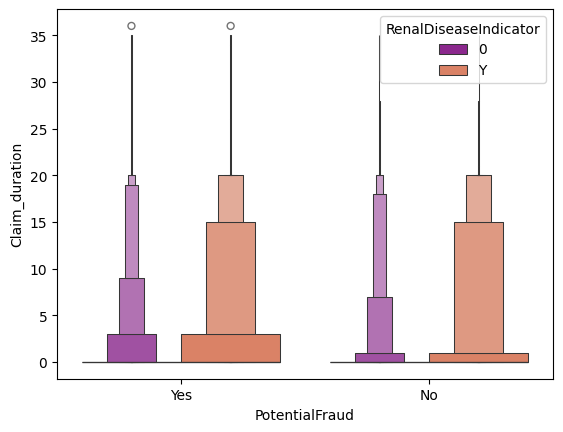

In [ ]:
fig=sns.boxenplot(data=train_iobp_df, x='PotentialFraud', y='Claim_duration', hue='RenalDiseaseIndicator', palette='plasma')

adding new feature: Admitted_Duration

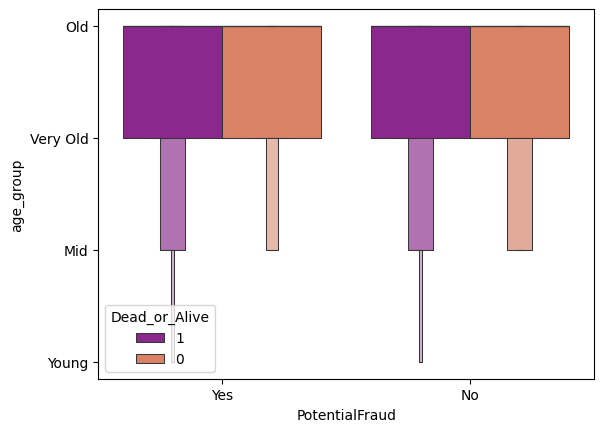

In [ ]:
fig=sns.boxenplot(data=train_iobp_df, x='PotentialFraud', y='age_group', hue='Dead_or_Alive', palette='plasma')

Insights:
* Reason of inverted graph means older people have higher in no. then the younger, still no relation on fraud.

Relationship b/w InscClaimAmtReimbursed and Potentially Fraud for RenalDiseaseIndicator

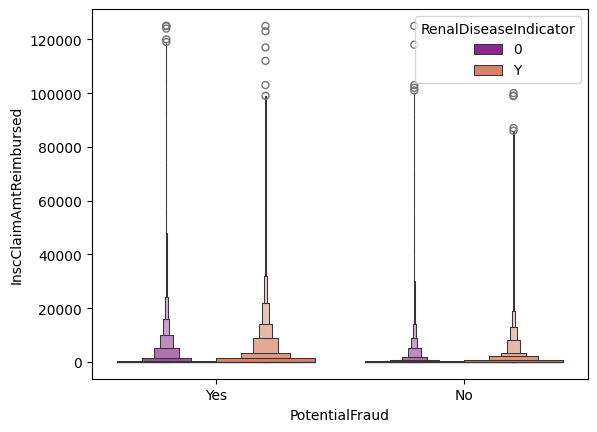

In [ ]:
fig=sns.boxenplot(data=train_iobp_df, x='PotentialFraud', y='InscClaimAmtReimbursed', hue='RenalDiseaseIndicator', palette='plasma')

The above plot clearly shows us that there is no difference in the distribution of Claim Re-Imb Amount of patients with or w/o RKD for Potentially Fraud and Non-Fraud Providers.

#Why do we have IP Annual Re-Imb Amount as 0 for Admitted Patients?


In [ ]:
print(pd.DataFrame(train_iobp_df[(train_iobp_df['IPAnnualReimbursementAmt'] == 0)]['Admitted?'].value_counts()))

            count
Admitted?        
0          371263
1             413


So, we have 413 claims where Patients were admitted to the hospital but the allocated IP Annual Re-Imb Amt is 0

In [ ]:
print(pd.DataFrame(train_iobp_df[(train_iobp_df['IPAnnualReimbursementAmt'] == 0) & (train_iobp_df['Admitted?'] == 1)]\
                   ['PotentialFraud'].value_counts()))

                count
PotentialFraud       
Yes               249
No                164


Insights:
* So, out 413 claims 60% of them means 249 are fraudulent whereas 164 are non-fraudulent.
* Thus, we can say that if the IP Annual Amount is 0 and patient was admitted to the hospital then chances of being fraudulent are high.

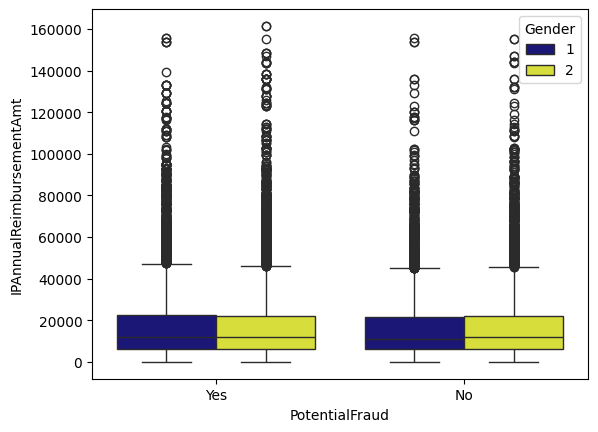

In [ ]:
fig=sns.boxplot(data=train_iobp_df[train_iobp_df['Admitted?'] == 1], x='PotentialFraud', y='IPAnnualReimbursementAmt', hue='Gender', palette='plasma')

* The above plot clearly shows us that there is no difference in the distribution of Annual IP Re-Imb Amount of males and females for Potentially Fraud and Non-Fraud Providers.
* Therefore, we can say that Annual IP Re-Imb Amount might not be useful in segregating the Fraud cases.

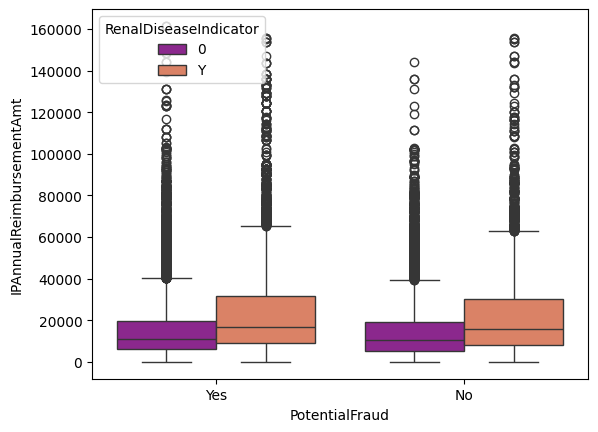

In [ ]:
fig=sns.boxplot(data=train_iobp_df[train_iobp_df['Admitted?'] == 1], x='PotentialFraud', y='IPAnnualReimbursementAmt', hue='RenalDiseaseIndicator', palette='plasma')

/tmp/ipython-input-1057993356.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxenplot(data=train_iobp_df[train_iobp_df['Admitted?'] == 0], y='PotentialFraud', x='OPAnnualReimbursementAmt',


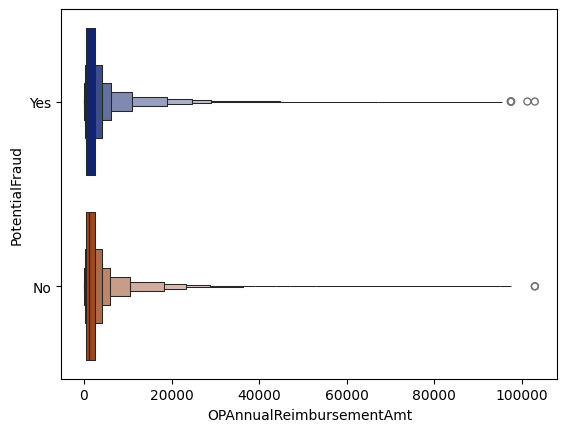

In [ ]:
    fig = sns.boxenplot(data=train_iobp_df[train_iobp_df['Admitted?'] == 0], y='PotentialFraud', x='OPAnnualReimbursementAmt',
                         palette='dark', orient='h')

* The above plot clearly shows us that there is no difference in the distribution of Annual OP Re-Imb Amount for Potentially Fraud and Non-Fraud Providers.
* And, it looks like a Pareto Distribution.

#Q
* Why do we have OP Annual Re-Imb Amount as 0 for Admitted Patients?


In [ ]:
print(pd.DataFrame(train_iobp_df[(train_iobp_df['OPAnnualReimbursementAmt'] == 0)]['Admitted?'].value_counts()))

           count
Admitted?       
1           3909
0           1009


So, we have 1009 claims where Patients were not admitted to the hospital but the allocated OP Annual Re-Imb Amt is 0.

In [ ]:
print(pd.DataFrame(train_iobp_df[(train_iobp_df['OPAnnualReimbursementAmt'] == 0) & (train_iobp_df['Admitted?'] == 0)]\
                   ['PotentialFraud'].value_counts()))

                count
PotentialFraud       
No                617
Yes               392


So, out 1009 claims 38% of them means 392 are fraudulent whereas 62% or 617 are non-fraudulent.

Adding new Feature: total no. od false claims filed by a provider

Logic: count (all claims subitted by provider)-count(all non-fraud claims submitted by a provider)

**if a provider was FRAUD then all the claims associated to it will be marked as FRAUD which I believe is wrong and doesn't provide any useful information.**

Adding New Feature :: Total Number of claims or cases seen by Attending Physician

In [ ]:
# Total unique number of Attended Physicians
print("Unique number of Attending Physicians present in the dataset are --> {}".format(train_iobp_df['AttendingPhysician'].nunique()))

Unique number of Attending Physicians present in the dataset are --> 82063


In [ ]:
train_iobp_df['Att_Phy_tot_claims'] = train_iobp_df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Att_Phy_tot_claims'].describe()

count    556703.000000
mean        138.634829
std         293.669039
min           1.000000
25%           7.000000
50%          33.000000
75%         116.000000
max        2534.000000
Name: Att_Phy_tot_claims, dtype: float64

<Axes: xlabel='Att_Phy_tot_claims', ylabel='Density'>

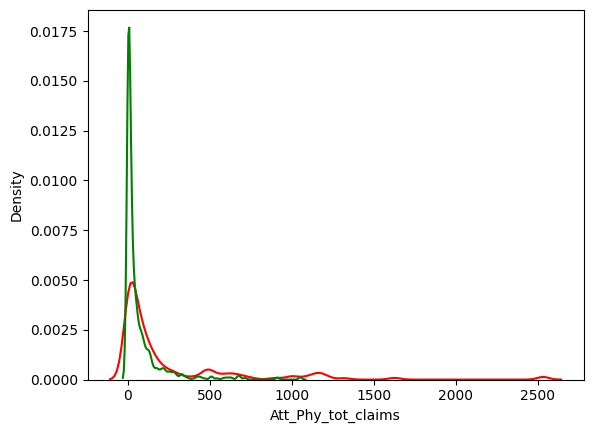

In [ ]:
sns.kdeplot(data=train_iobp_df[train_iobp_df['PotentialFraud']=='Yes']['Att_Phy_tot_claims'], color='red')
sns.kdeplot(data=train_iobp_df[train_iobp_df['PotentialFraud']=='No']['Att_Phy_tot_claims'], color='green')

/tmp/ipython-input-2188531627.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Att_Phy_tot_claims', palette='prism_r', orient='h')


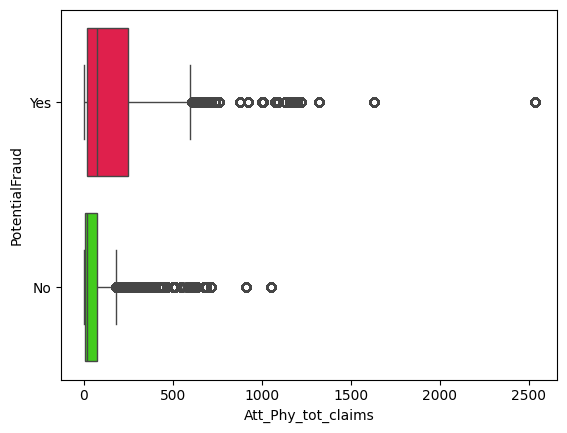

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Att_Phy_tot_claims', palette='prism_r', orient='h')

Insights:
* The above KDE and Box plots suggests that the newly added feature Att_Phy_tot_claims may be useful in segregating the potentially fraud and non-fraudulent cases.
* For example, we can say that if total claims filed by a Attending Physician is greater than 500 then chances of being fraudulent are high.

**Adding New Feature :: Total Number of claims or cases seen by Opearting Physician**

In [ ]:
# Total unique number of Operating Physicians
print("Unique number of Operating Physicians present in the dataset are --> {}".format(train_iobp_df['OperatingPhysician'].nunique()))

Unique number of Operating Physicians present in the dataset are --> 35315


In [ ]:
train_iobp_df['Opr_Phy_tot_claims'] = train_iobp_df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Opr_Phy_tot_claims'].describe()

count    114447.000000
mean         27.204811
std          52.687759
min           1.000000
25%           2.000000
50%           8.000000
75%          25.000000
max         424.000000
Name: Opr_Phy_tot_claims, dtype: float64

<Axes: xlabel='Opr_Phy_tot_claims', ylabel='Density'>

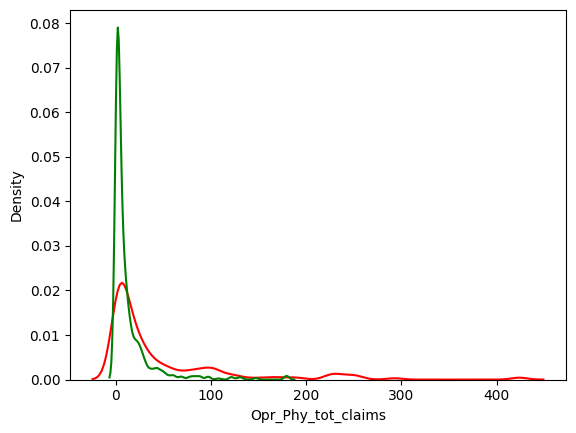

In [ ]:
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Opr_Phy_tot_claims'],color='red')
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Opr_Phy_tot_claims'],color='green')

/tmp/ipython-input-35757916.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Opr_Phy_tot_claims', palette='prism_r', orient='h')


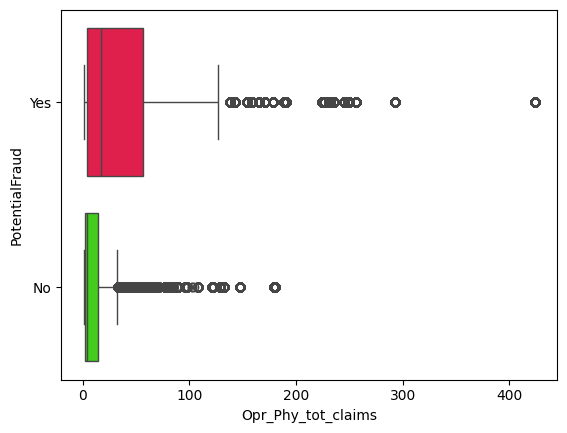

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Opr_Phy_tot_claims', palette='prism_r', orient='h')

Insights:
* The above KDE and Box plots suggests that the newly added feature Opr_Phy_tot_claims may be useful in segregating the potentially fraud and non-fraudulent cases.
* Results are very similar to Att_Phy_tot_claims.
For example, we can say that if total claims filed by a Operating Physician are greater than 100 then chances of being fraudulent are high.

**Adding New Feature :: Total Number of claims or cases seen by Other Physician**

In [ ]:
# Total unique number of Other Physicians
print("Unique number of Other Physicians present in the dataset are --> {}".format(train_iobp_df['OtherPhysician'].nunique()))

Unique number of Other Physicians present in the dataset are --> 46457


In [ ]:
train_iobp_df['Oth_Phy_tot_claims'] = train_iobp_df.groupby(['OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df['Oth_Phy_tot_claims'].describe()

count    199736.000000
mean         90.207914
std         208.017235
min           1.000000
25%           3.000000
50%          15.000000
75%          60.000000
max        1247.000000
Name: Oth_Phy_tot_claims, dtype: float64

<Axes: xlabel='Oth_Phy_tot_claims', ylabel='Density'>

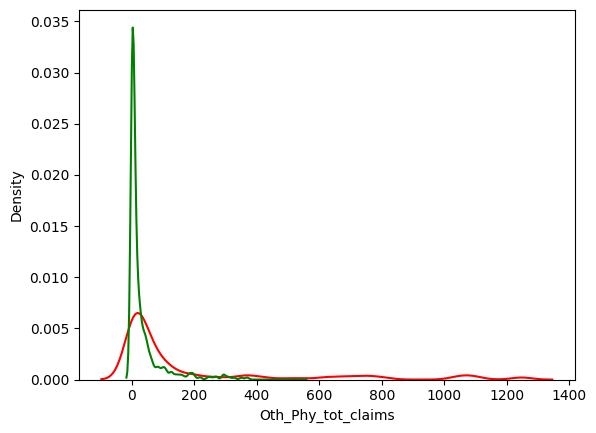

In [ ]:
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Oth_Phy_tot_claims'],color='red')
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Oth_Phy_tot_claims'],color='green')

/tmp/ipython-input-4122091744.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Oth_Phy_tot_claims', palette='prism_r', orient='h')


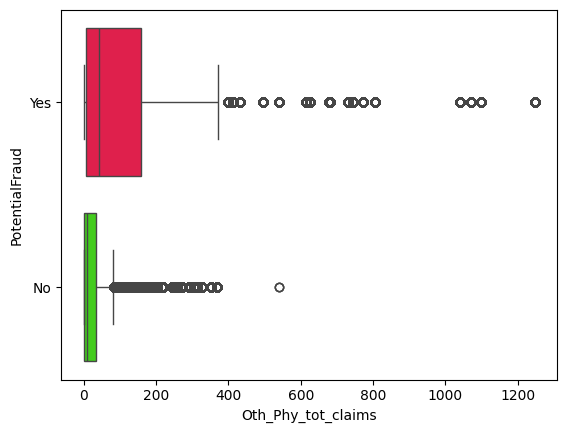

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Oth_Phy_tot_claims', palette='prism_r', orient='h')

* The above KDE and Box plots suggests that the newly added feature Oth_Phy_tot_claims may be useful in segregating the potentially fraud and non-fraudulent cases.
* Results are very similar to Att_Phy_tot_claims.
For example, we can say that if total claims filed by a Other Physician are greater than 100 then chances of being fraudulent are high.

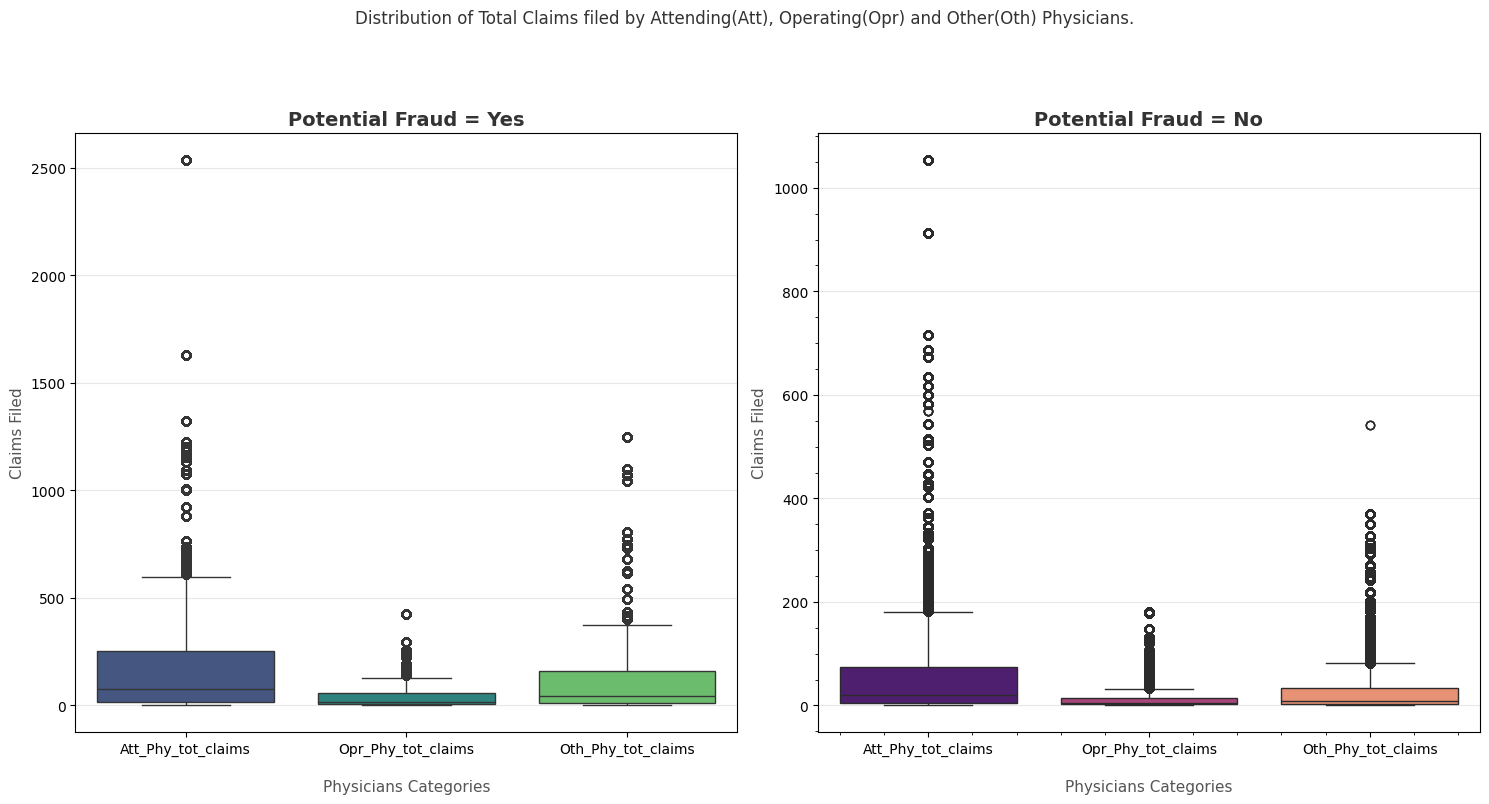

In [ ]:
# Define font dictionaries for consistent styling
title_font_dict = {
    'fontsize': 14,
    'fontweight': 'bold',
    'color': '#333333'
}

label_font_dict = {
    'fontsize': 11,
    'fontweight': 'normal',
    'color': '#555555'
}

# Simultaneously viewing the plots for better understanding
with plt.style.context('default'):
    fig, (ax1, ax2) = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(15, 8),
        sharey=False
    )

    # Filter data for fraud and non-fraud cases
    fraud_data = train_iobp_df[train_iobp_df["PotentialFraud"] == 'Yes'][
        ['Att_Phy_tot_claims', 'Opr_Phy_tot_claims', 'Oth_Phy_tot_claims']
    ]
    non_fraud_data = train_iobp_df[train_iobp_df["PotentialFraud"] == 'No'][
        ['Att_Phy_tot_claims', 'Opr_Phy_tot_claims', 'Oth_Phy_tot_claims']
    ]

    # Plot for Potential Fraud = Yes
    sns.boxplot(data=fraud_data, ax=ax1, palette='viridis')
    ax1.set_title("Potential Fraud = Yes", fontdict=title_font_dict)
    ax1.set_xlabel("\nPhysicians Categories", fontdict=label_font_dict)
    ax1.set_ylabel("Claims Filed", fontdict=label_font_dict)
    ax1.grid(True, alpha=0.3, axis='y')

    # Plot for Potential Fraud = No
    sns.boxplot(data=non_fraud_data, ax=ax2, palette='magma')
    ax2.set_title("Potential Fraud = No", fontdict=title_font_dict)
    ax2.set_xlabel("\nPhysicians Categories", fontdict=label_font_dict)
    ax2.set_ylabel("Claims Filed", fontdict=label_font_dict)
    ax2.grid(True, alpha=0.3, axis='y')

    # Configure figure title and layout
    fig.suptitle(
        "Distribution of Total Claims filed by Attending(Att), Operating(Opr) and Other(Oth) Physicians.\n",
        fontdict=title_font_dict,
        y=1.00
    )

    # Enhance plot visibility
    plt.minorticks_on()
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

* The above Box plots suggests that theses newly added features may be slightly useful in segregating the potentially fraud and non-fraudulent cases.
* As we can see that the total false claims filed by physicians are slightly more than the non-false claims filed by them.

Adding combined Feature:: Att_opr_0th_Phy_Tot_claims
* It represents the total claims submitted by Attending, Operating and Other Physicians.
* LOGIC:: Att_Phy_tot_claims + Opr_Phy_tot_claims+Oth_Ohy_tot_claims

In [ ]:
train_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)

/tmp/ipython-input-3597444406.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
/tmp/ipython-input-3597444406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'] = train_iobp_df['Att_Phy_tot_claims'] + train_iobp_df['Opr_Phy_tot_claims'] + train_iobp_df['Oth_Phy_tot_claims']

In [ ]:
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'].describe()

count    558211.000000
mean        176.115666
std         379.833208
min           0.000000
25%           9.000000
50%          41.000000
75%         144.000000
max        3372.000000
Name: Att_Opr_Oth_Phy_Tot_Claims, dtype: float64

<Axes: xlabel='Att_Opr_Oth_Phy_Tot_Claims', ylabel='Density'>

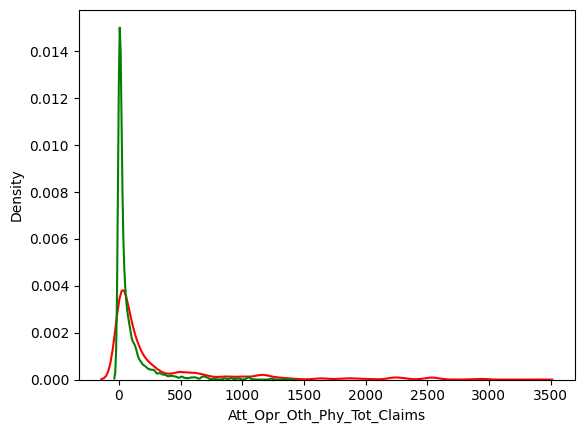

In [ ]:
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Att_Opr_Oth_Phy_Tot_Claims'],color='red')
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Att_Opr_Oth_Phy_Tot_Claims'],color='green')

/tmp/ipython-input-3330447185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Att_Opr_Oth_Phy_Tot_Claims', palette='prism_r', orient='h')


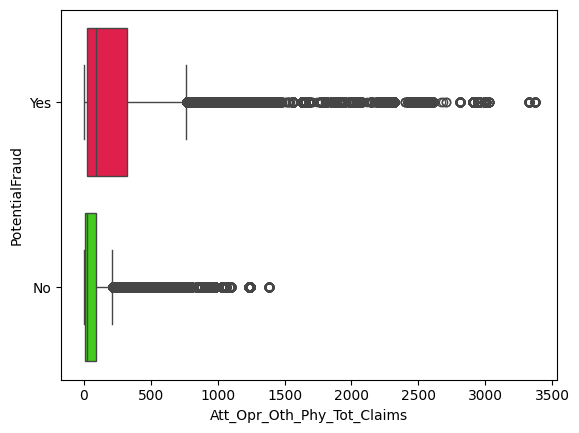

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Att_Opr_Oth_Phy_Tot_Claims', palette='prism_r', orient='h')

* The above Box plots shows us the similar results like the previous features. And, there is a slight difference in the data distributions which may be useful in segregating the potential frauds.

**Adding 3 New Features :: Prv_Tot_Att_Phy, Prv_Tot_Opr_Phy and Prv_Tot_Oth_Phy**
* These features will represent the total Attending, Operating and Other Physicians for every provider.

In [ ]:
train_iobp_df["Prv_Tot_Att_Phy"] = train_iobp_df.groupby(['Provider'])['AttendingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Opr_Phy"] = train_iobp_df.groupby(['Provider'])['OperatingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Oth_Phy"] = train_iobp_df.groupby(['Provider'])['OtherPhysician'].transform('count')

In [ ]:
# Nulls in the above features
train_iobp_df.isna().sum().tail(3)

Prv_Tot_Att_Phy    0
Prv_Tot_Opr_Phy    0
Prv_Tot_Oth_Phy    0
dtype: int64

In [ ]:
train_iobp_df["Prv_Tot_Att_Phy"].describe()

count    558211.000000
mean        820.206469
std        1271.272090
min           1.000000
25%         122.000000
50%         359.000000
75%        1013.000000
max        8207.000000
Name: Prv_Tot_Att_Phy, dtype: float64

* The average number of attending physicians for providers are 820.

In [ ]:
train_iobp_df["Prv_Tot_Opr_Phy"].describe()

count    558211.000000
mean        155.030023
std         228.266693
min           0.000000
25%          25.000000
50%          73.000000
75%         185.000000
max        1441.000000
Name: Prv_Tot_Opr_Phy, dtype: float64

* The average number of operating physicians for providers are 155.

In [ ]:
train_iobp_df["Prv_Tot_Oth_Phy"].describe()

count    558211.000000
mean        306.781194
std         497.246984
min           0.000000
25%          37.000000
50%         120.000000
75%         381.000000
max        3209.000000
Name: Prv_Tot_Oth_Phy, dtype: float64

* The average number of other physicians for providers are 306.

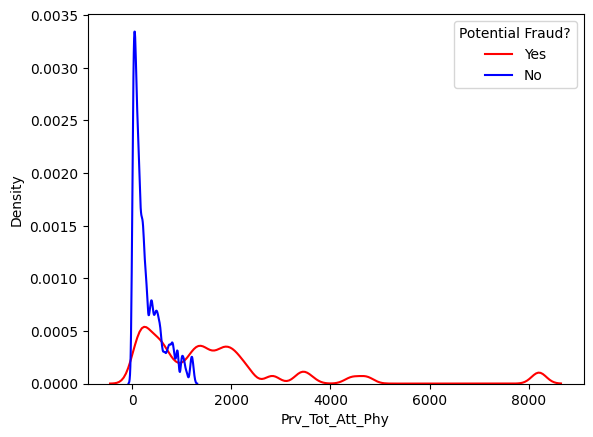

In [ ]:
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Prv_Tot_Att_Phy'],color='red')
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Prv_Tot_Att_Phy'],color='blue')
plt.legend(labels=["Yes", "No"], title="Potential Fraud?");

/tmp/ipython-input-2133724869.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Prv_Tot_Att_Phy', palette='prism_r', orient='h')


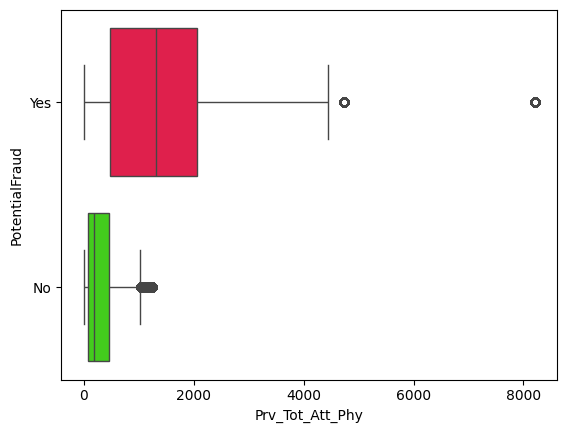

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Prv_Tot_Att_Phy', palette='prism_r', orient='h')

* The above KDE and Box plots are quite interesting as we can see that if Prv_Tot_Att_Phy is high then chances of fraud is quite high.

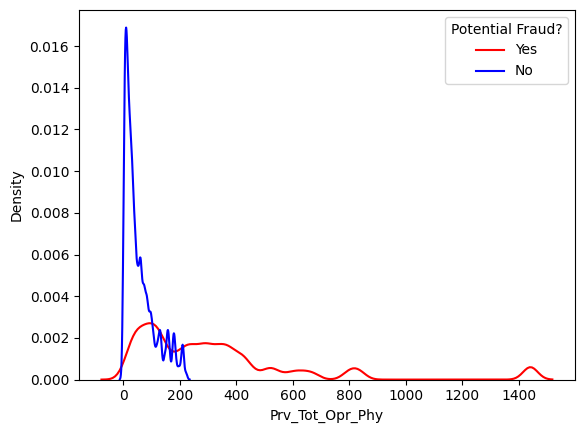

In [ ]:
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Prv_Tot_Opr_Phy'],color='red')
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Prv_Tot_Opr_Phy'],color='blue')
plt.legend(labels=["Yes", "No"], title="Potential Fraud?")

/tmp/ipython-input-2936912240.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Prv_Tot_Opr_Phy', palette='prism_r', orient='h')


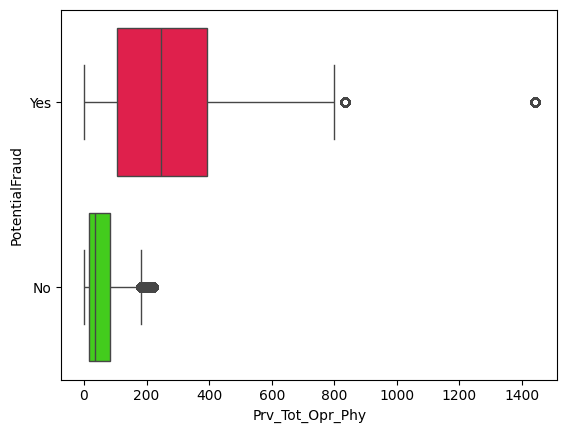

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Prv_Tot_Opr_Phy', palette='prism_r', orient='h')

* The above KDE and Box plots are quite interesting as we can see that if Prv_Tot_Opr_Phy is high then chances of fraud is quite high.

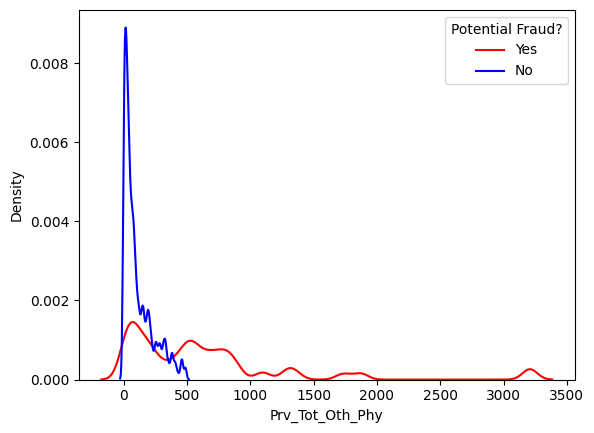

In [ ]:
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Prv_Tot_Oth_Phy'],color='red')
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Prv_Tot_Oth_Phy'],color='blue')
plt.legend(labels=["Yes", "No"], title="Potential Fraud?")

/tmp/ipython-input-1653837737.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Prv_Tot_Oth_Phy', palette='prism_r', orient='h')


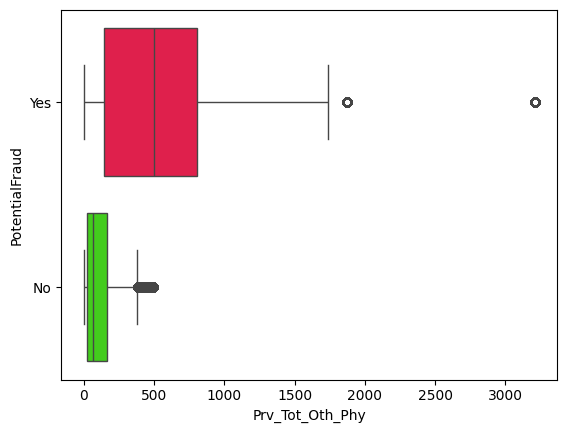

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Prv_Tot_Oth_Phy', palette='prism_r', orient='h')

* The above KDE and Box plots are quite interesting as we can see that if Prv_Tot_Oth_Phy is high then chances of fraud is quite high.

**Adding Combined Feature :: Prv_Tot_Att_Opr_Oth_Phys**
* It represents the total of all kind of physicians that a provider has interacted with.
* Logic :: Prv_Tot_Att_Phy + Prv_Tot_Opr_Phy + Prv_Tot_Oth_Phy

In [ ]:
train_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'] = train_iobp_df['Prv_Tot_Att_Phy'] + train_iobp_df['Prv_Tot_Opr_Phy'] + train_iobp_df['Prv_Tot_Oth_Phy']

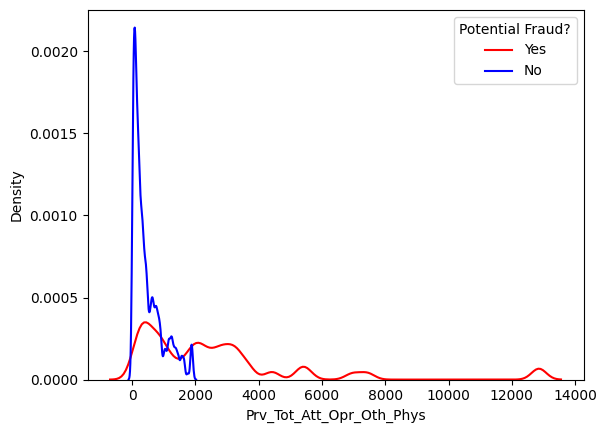

In [ ]:
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Prv_Tot_Att_Opr_Oth_Phys'],color='red')
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Prv_Tot_Att_Opr_Oth_Phys'],color='blue')
plt.legend(labels=["Yes", "No"], title="Potential Fraud?")

/tmp/ipython-input-3070924739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Prv_Tot_Att_Opr_Oth_Phys', palette='prism_r', orient='h')


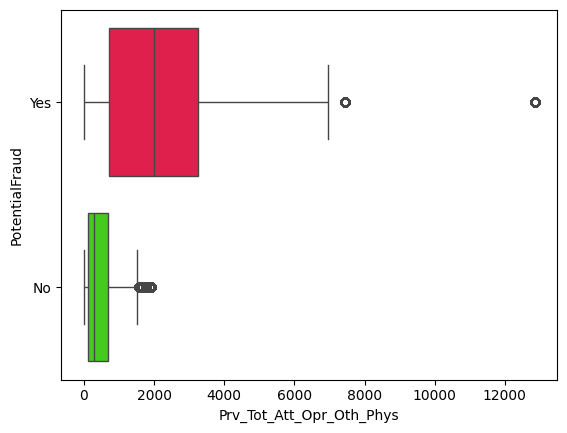

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Prv_Tot_Att_Opr_Oth_Phys', palette='prism_r', orient='h')

* The above KDE and Box plots are quite interesting as we can see that if Prv_Tot_Att_Opr_Oth_Phys is high then chances of fraud is quite high.

**Adding New Feature :: Total Unique Claim Admit Codes used by a PROVIDER**
* As there may be a pattern that if a provider has used so many Admit Diagnosis Codes then it might increases or decreases the chances of fraud.

In [ ]:
train_iobp_df['PRV_Tot_Admit_DCodes'] = train_iobp_df.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')

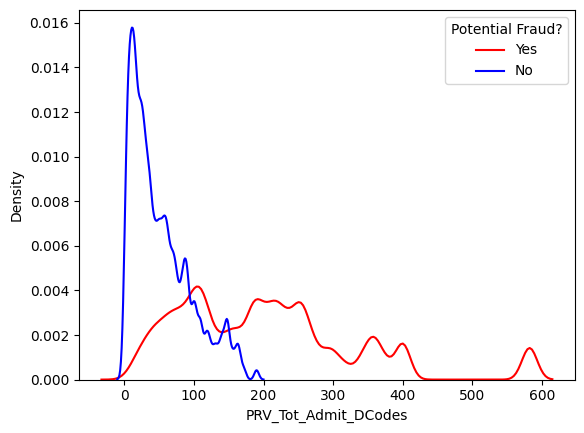

In [ ]:
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['PRV_Tot_Admit_DCodes'], color='red')
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['PRV_Tot_Admit_DCodes'], color='blue')
plt.legend(labels=["Yes", "No"], title="Potential Fraud?")

/tmp/ipython-input-2237502155.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='PRV_Tot_Admit_DCodes', palette='prism_r', orient='h')


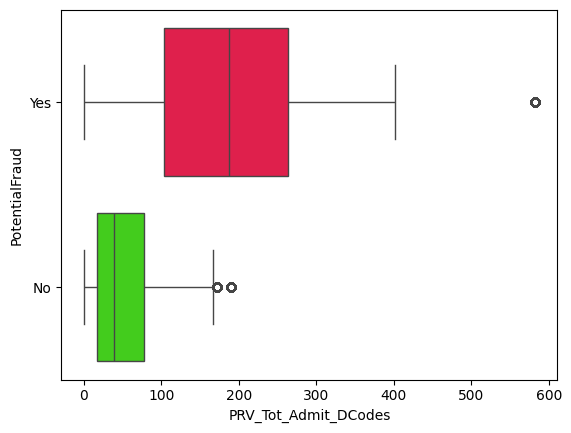

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='PRV_Tot_Admit_DCodes', palette='prism_r', orient='h')

* The above KDE and Box plots are very interesting as we can see that if PRV_Tot_Admit_DCodes is high then chances of fraud also increases.

**Adding New Feature :: Total Unique Number of Diagnosis Group Codes used by a PROVIDER**
* As there may be a pattern that if a provider has used so many Diagnosis Group Codes then it might increases or decreases the chances of fraud.

In [ ]:
train_iobp_df['PRV_Tot_DGrpCodes'] = train_iobp_df.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')

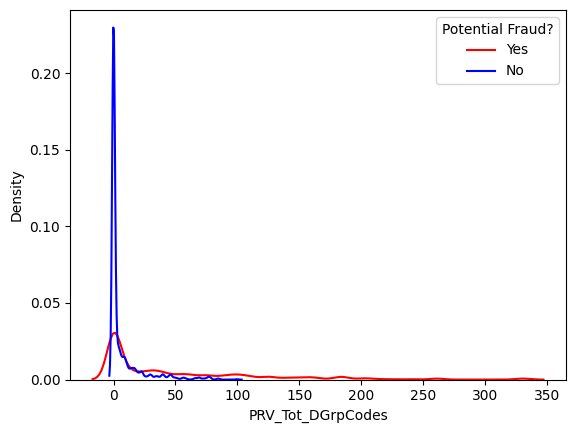

In [ ]:
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['PRV_Tot_DGrpCodes'], color='red')
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['PRV_Tot_DGrpCodes'], color='blue')
plt.legend(labels=["Yes", "No"], title="Potential Fraud?")

/tmp/ipython-input-1381188122.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='PRV_Tot_DGrpCodes', palette='prism_r', orient='h')


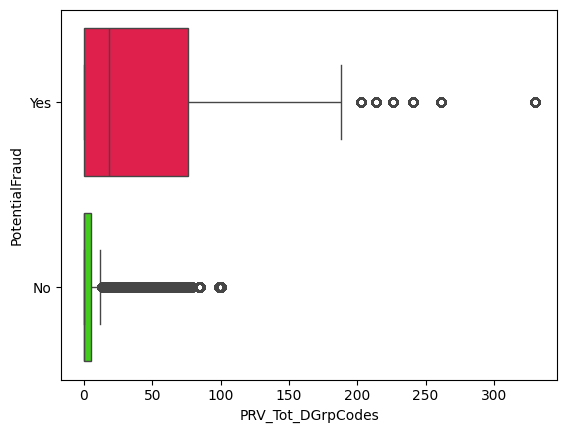

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='PRV_Tot_DGrpCodes', palette='prism_r', orient='h')

* The above KDE and Box plots suggest that if PRV_Tot_Admit_DCodes is high then it slightly increases the chances of fraud.

***NOTE :: What didn't worked?***

I also looked to add the unique number of Diagnosis Group Codes used by the 3 different class of physicians but the variation was very minimal, thus not added those features.

In [ ]:
train_iobp_df['DOB_Year'] = train_iobp_df['DOB'].dt.year


In [ ]:
train_iobp_df['PRV_Tot_Unq_DOB_Years'] = train_iobp_df.groupby(['Provider'])['DOB_Year'].transform('nunique')

In [ ]:
train_iobp_df['PRV_Tot_Unq_DOB_Years'].describe()


count    558211.000000
mean         50.615590
std          18.190988
min           1.000000
25%          38.000000
50%          54.000000
75%          67.000000
max          75.000000
Name: PRV_Tot_Unq_DOB_Years, dtype: float64

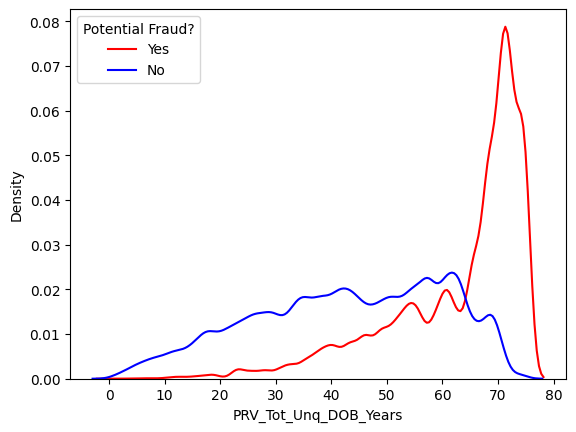

In [ ]:
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['PRV_Tot_Unq_DOB_Years'], color='red')
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['PRV_Tot_Unq_DOB_Years'], color='blue')
plt.legend(labels=["Yes", "No"], title="Potential Fraud?")

/tmp/ipython-input-342572530.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='PRV_Tot_Unq_DOB_Years', palette='prism_r', orient='h')


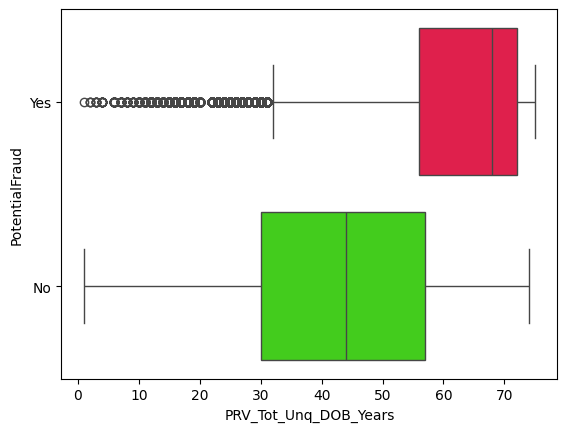

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='PRV_Tot_Unq_DOB_Years', palette='prism_r', orient='h')

* The above KDE and Box plots suggest that if PRV_Tot_Unq_DOB_Years is very high than then it increases the chances of fraud as well.
* As shown below, if PRV_Tot_Unq_DOB_Years is greater than or equals to 67 then the very high majority of cases are fraud

In [ ]:
train_iobp_df[train_iobp_df['PRV_Tot_Unq_DOB_Years'] >=67]['PotentialFraud'].value_counts()

PotentialFraud
Yes    118873
No      22203
Name: count, dtype: int64

Ad**ding New Feature :: Sum of patients age treated by a Provider**
* Reasoning :: The idea behind adding this feature is that there might be a pattern like if the sum of patients age treated by a provider is very high or low then it might influence the fraud.

In [ ]:
train_iobp_df['PRV_Bene_Age_Sum'] = train_iobp_df.groupby(['Provider'])['age_group'].transform('sum')

In [ ]:
train_iobp_df['PRV_Bene_Age_Sum'].describe()

count                                                558211
unique                                                 4604
top       Very OldVery OldOldVery OldVery OldVery OldOld...
freq                                                   8240
Name: PRV_Bene_Age_Sum, dtype: object

**Adding New Feature :: Sum of Insc Claim Re-Imb Amount for a Provider**
* The idea behind adding this feature is that there might be a pattern like if the sum of claim re-imb amount for a provider is very high or low then it might influence the fraud.

In [ ]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'] = train_iobp_df.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('sum')

In [ ]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'].describe()


count    5.582110e+05
mean     4.877429e+05
std      7.367223e+05
min      0.000000e+00
25%      6.369000e+04
50%      2.036000e+05
75%      5.969000e+05
max      5.996050e+06
Name: PRV_Insc_Clm_ReImb_Amt, dtype: float64

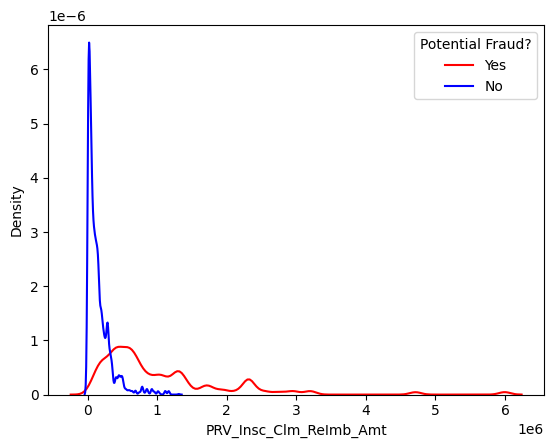

In [ ]:
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['PRV_Insc_Clm_ReImb_Amt'], color='red')
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['PRV_Insc_Clm_ReImb_Amt'], color='blue')
plt.legend(labels=["Yes", "No"], title="Potential Fraud?")

/tmp/ipython-input-1543621373.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='PRV_Insc_Clm_ReImb_Amt', palette='prism_r', orient='h')


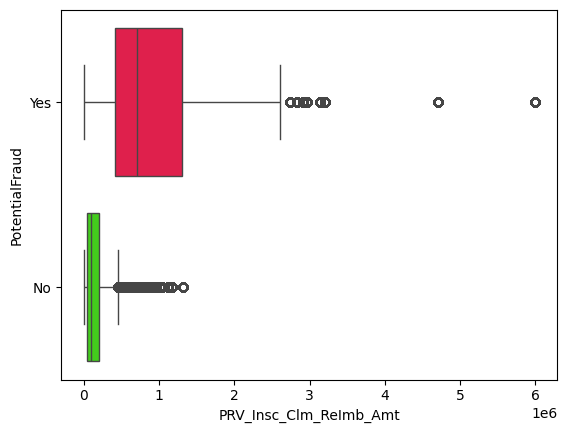

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='PRV_Insc_Clm_ReImb_Amt', palette='prism_r', orient='h')

* The above KDE and Box plots suggest that if PRV_Insc_Clm_ReImb_Amt is high then it increases the chances of fraud.

**Adding New Feature :: Total number of RKD Patients seen by a Provider**
* The idea behind adding this feature is that there might be a pattern like if the total number of RKD Patients seen by a Provider is very high or low then it might influence the fraud.

In [ ]:
train_iobp_df['RenalDiseaseIndicator'] = train_iobp_df['RenalDiseaseIndicator'].apply(lambda val: 1 if val == "Y" else 0)

In [ ]:
train_iobp_df['PRV_Tot_RKD_Patients'] = train_iobp_df.groupby(['Provider'])['RenalDiseaseIndicator'].transform('sum')

In [ ]:
train_iobp_df['PRV_Tot_RKD_Patients'].describe()

count    558211.000000
mean        157.902616
std         233.828365
min           0.000000
25%          24.000000
50%          73.000000
75%         192.000000
max        1447.000000
Name: PRV_Tot_RKD_Patients, dtype: float64

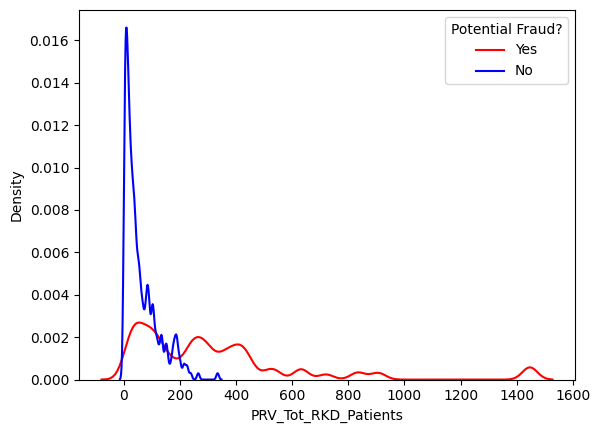

In [ ]:
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['PRV_Tot_RKD_Patients'], color='red')
sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['PRV_Tot_RKD_Patients'], color='blue')
plt.legend(labels=["Yes", "No"], title="Potential Fraud?")

/tmp/ipython-input-1722985058.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='PRV_Tot_RKD_Patients', palette='prism_r', orient='h')


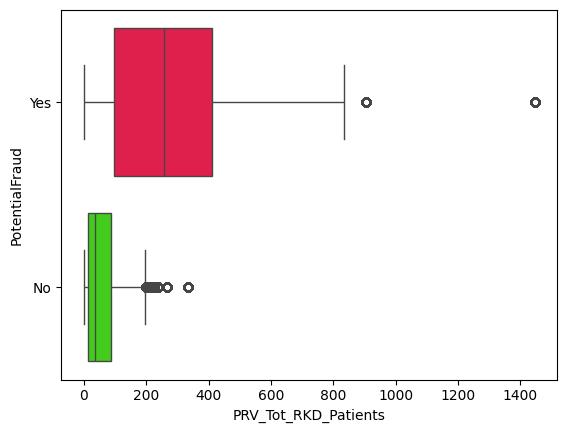

In [ ]:
fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='PRV_Tot_RKD_Patients', palette='prism_r', orient='h')

* The above KDE and Box plots suggest that if PRV_Tot_RKD_Patients is high then it increases the chances of fraud.

#Q
* Which are the Top-25 Providers with maximum number of fraudulent cases?

In [ ]:
tmp = pd.DataFrame(train_iobp_df.groupby(['Provider','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['Provider', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

Provider Fraud?  Num_of_cases   Cases  Percentage
0  PRV51001     No            25  345415        0.01
1  PRV51003    Yes           132  212796        0.06
2  PRV51004     No           149  345415        0.04
3  PRV51005    Yes          1165  212796        0.55
4  PRV51007     No            72  345415        0.02

In [ ]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

In [ ]:
tmp_only_frauds

Provider Fraud?  Num_of_cases   Cases  Percentage
0    PRV51459    Yes          8240  212796        3.87
1    PRV53797    Yes          4739  212796        2.23
2    PRV51574    Yes          4444  212796        2.09
3    PRV53918    Yes          3588  212796        1.69
4    PRV54895    Yes          3436  212796        1.61
..        ...    ...           ...     ...         ...
501  PRV52445    Yes             5  212796        0.00
502  PRV52933    Yes             8  212796        0.00
503  PRV56400    Yes             9  212796        0.00
504  PRV56918    Yes             7  212796        0.00
505  PRV57667    Yes             3  212796        0.00

[506 rows x 5 columns]

/tmp/ipython-input-2613333117.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="Provider", y="Num_of_cases", palette='Accent')


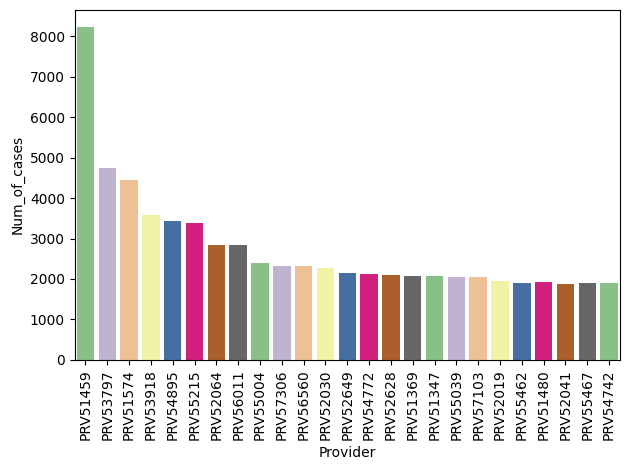

In [ ]:
fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="Provider", y="Num_of_cases", palette='Accent')
plt.xticks(rotation=90)
plt.tight_layout()

* Here, PRV51459 has the highest percentage share of fraudulent cases. The, difference b/w others providers is not that high.